# HOL2184 Db2 Warehouse

# Introduction

In this notebook we work with Db2 Warehouse for accessing, storing, and querying data. Db2 is optimized for providing fast query results for queries which are executed often, have high priority, and/or have to return results quickly.

Most of the data used by these queries is so-called "hot" data, which is accessed very frequently. Therefore, Db2 Warehouse stores the data optimized for these requirements by default column-organized, and often in a schema optimized for analysis like star or snowflake schemata. Therefore, the data originally stored in their source format in the data lake is transformed in such a format optimized for querying. We have exercises in this lab which take the source data and transform it in such an optimized format and then query these data.

But in a data lake there are not just hot data but also less frequently accessed data so-called warm data and seldomly accessed data so-called cold data. And besides data optimized for querying there is also a lot of data in a data lake which is still in its originaly format in which it had been generated in the source systems. It is important, that queries on hot data can also integrate these warm and cold data. Therefore, we will have an exercise performing this.

In another part of this hands-on lab we will integrate data on the fly from many different data sources. Therefore, we will learn in an exercise how to provide data highly optimized data from Db2 Warehouse for Data Virtualization (and any other consumers like BI tools).

# <font color='red'>If you don't see any images in the cells below, change in the edit mode first (click on the pen symbol)</font>

# Load data from Cloud Object Store via the Db2 Warehouse GUI

First, we will use GUI of Db2 Warehouse to load data stored in a csv file on Cloud Object Storage (COS) in the Public Cloud. The purpose of this cell is to describe what you have to do to achieve this. The first step is to open Db2 Warehouse. 

Select the "hamburger" menu in the upper right corner of your screen:
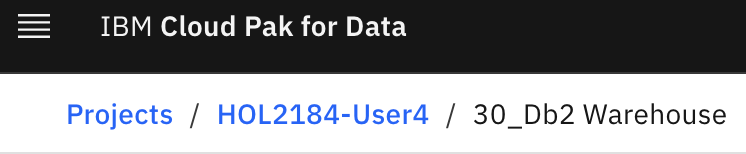

You get this menu:
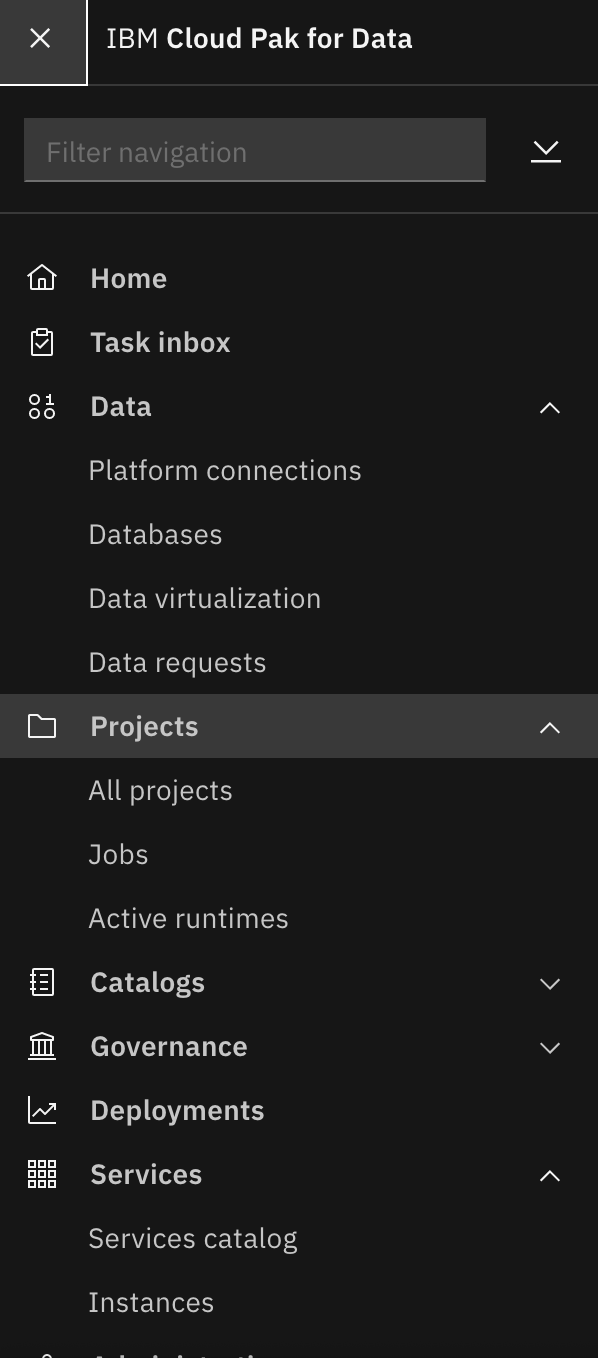

Select "Databases" and open it in a new tab:
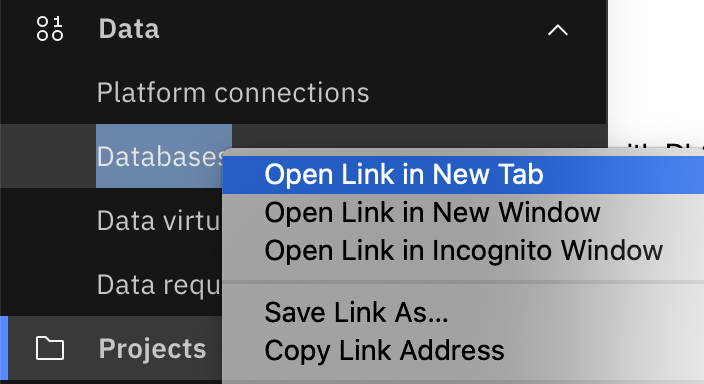

Probably several database systems will be displayed in tiles. One such tile should be Db2 Warehouse:
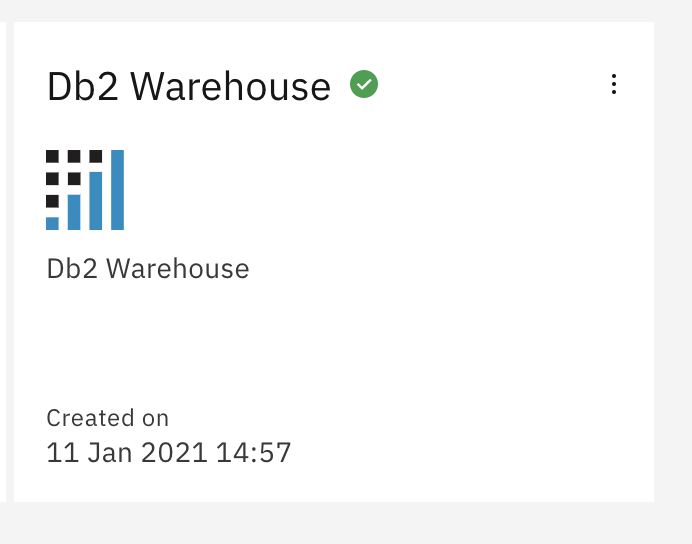

Click on the three vertically aranged dots in the upper right corner of this tile and select "open":
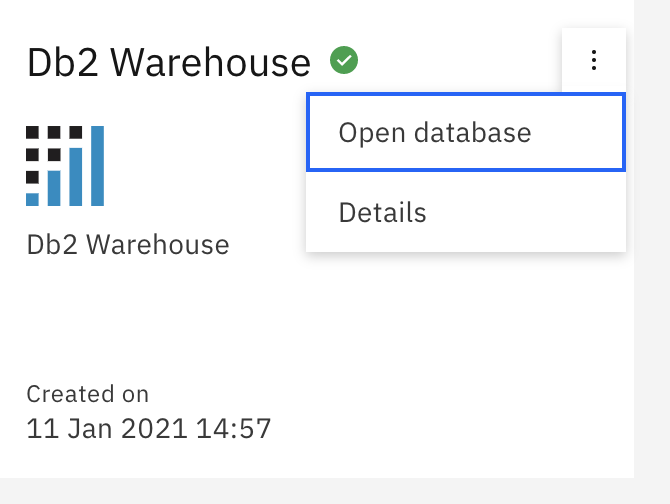

You are presented with the "Summary" screen of this Db2 warehouse instance:
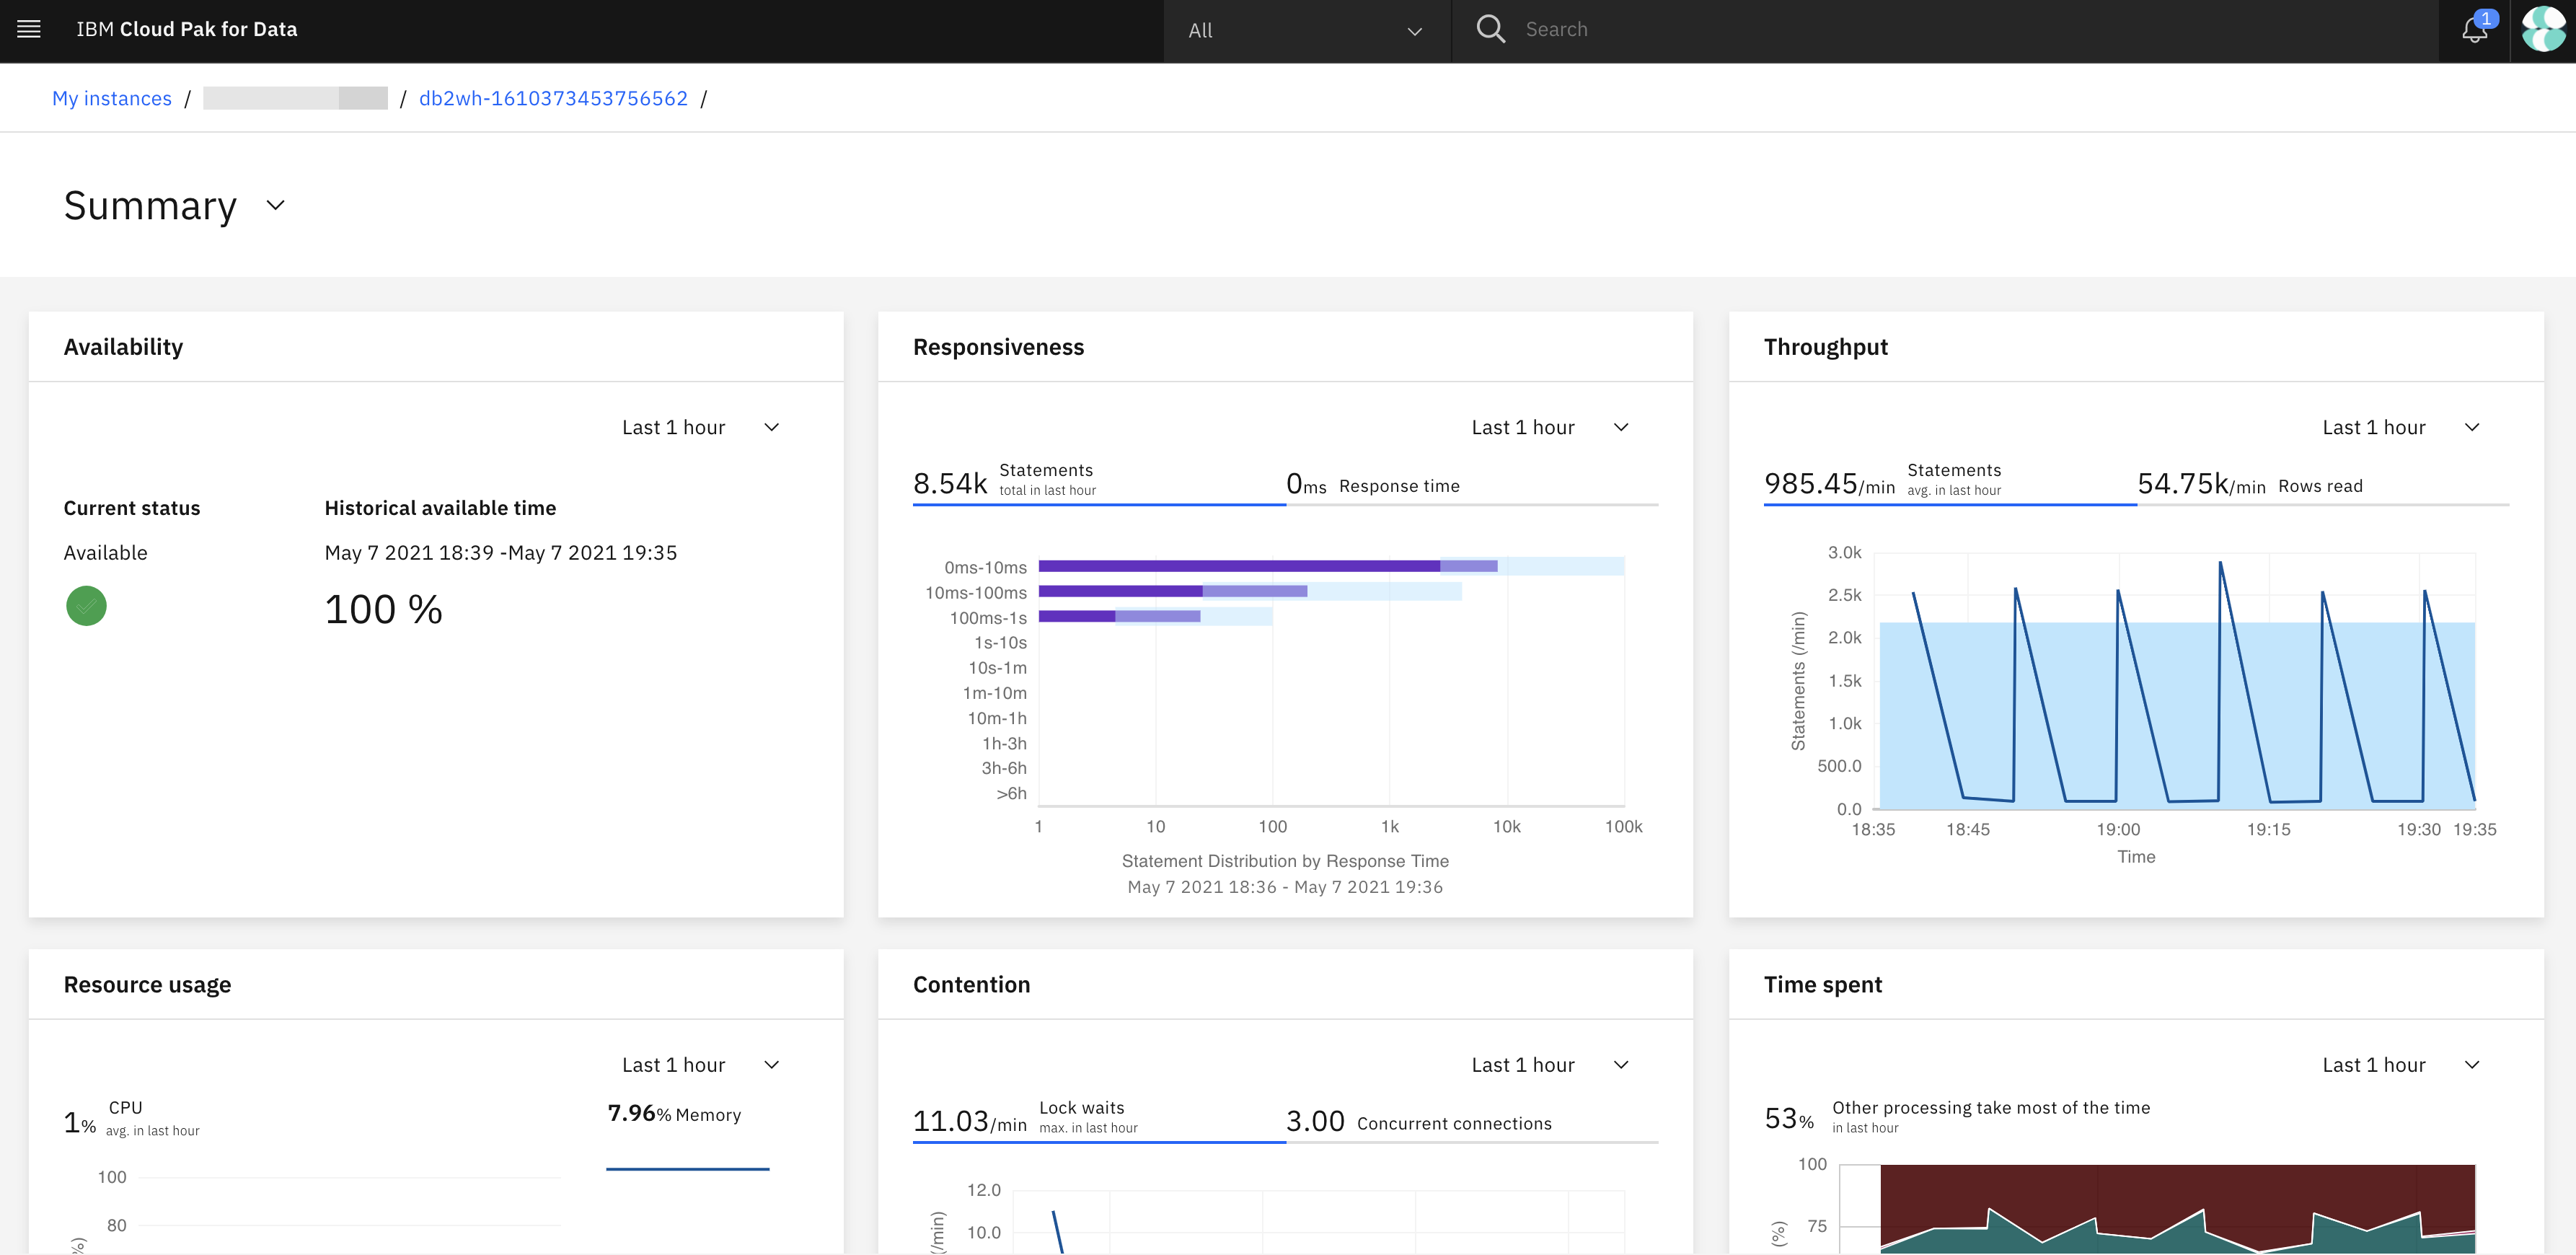

Now we are ready to start with the loading itself.

Click on "Summary", and the following menu opens:
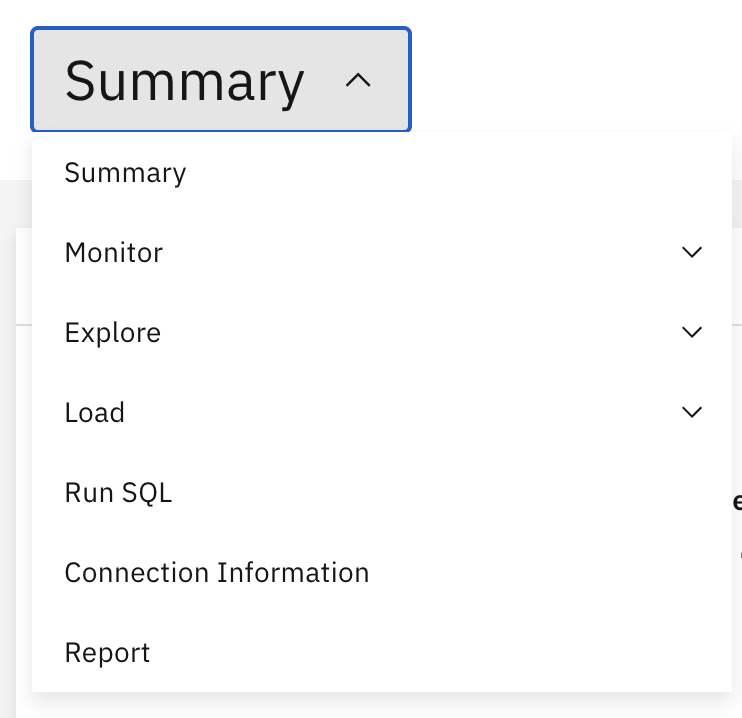

Click on "Load" and then on "Load Data":
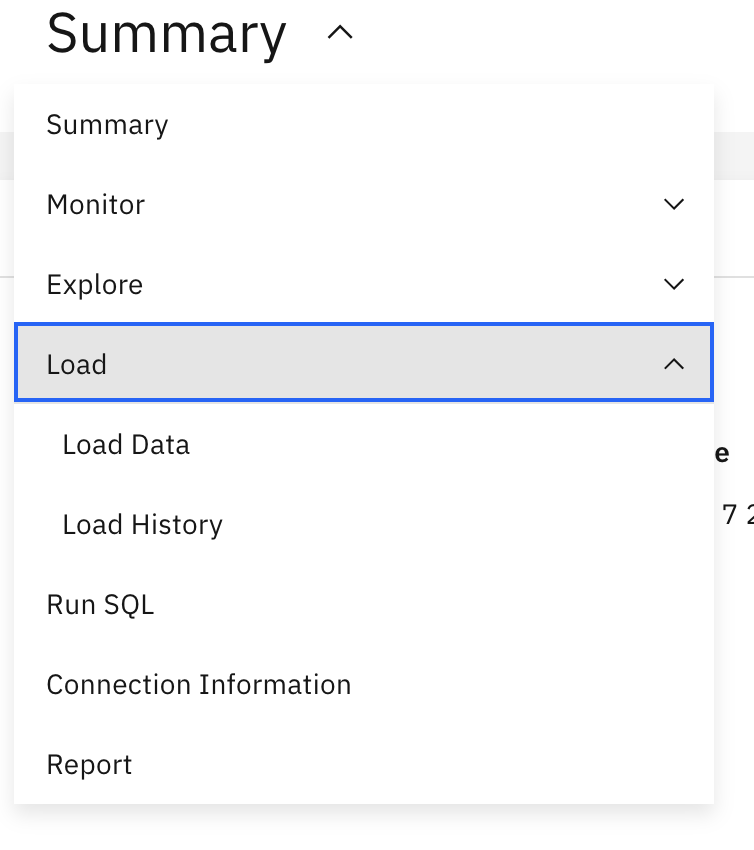

You get this screen:
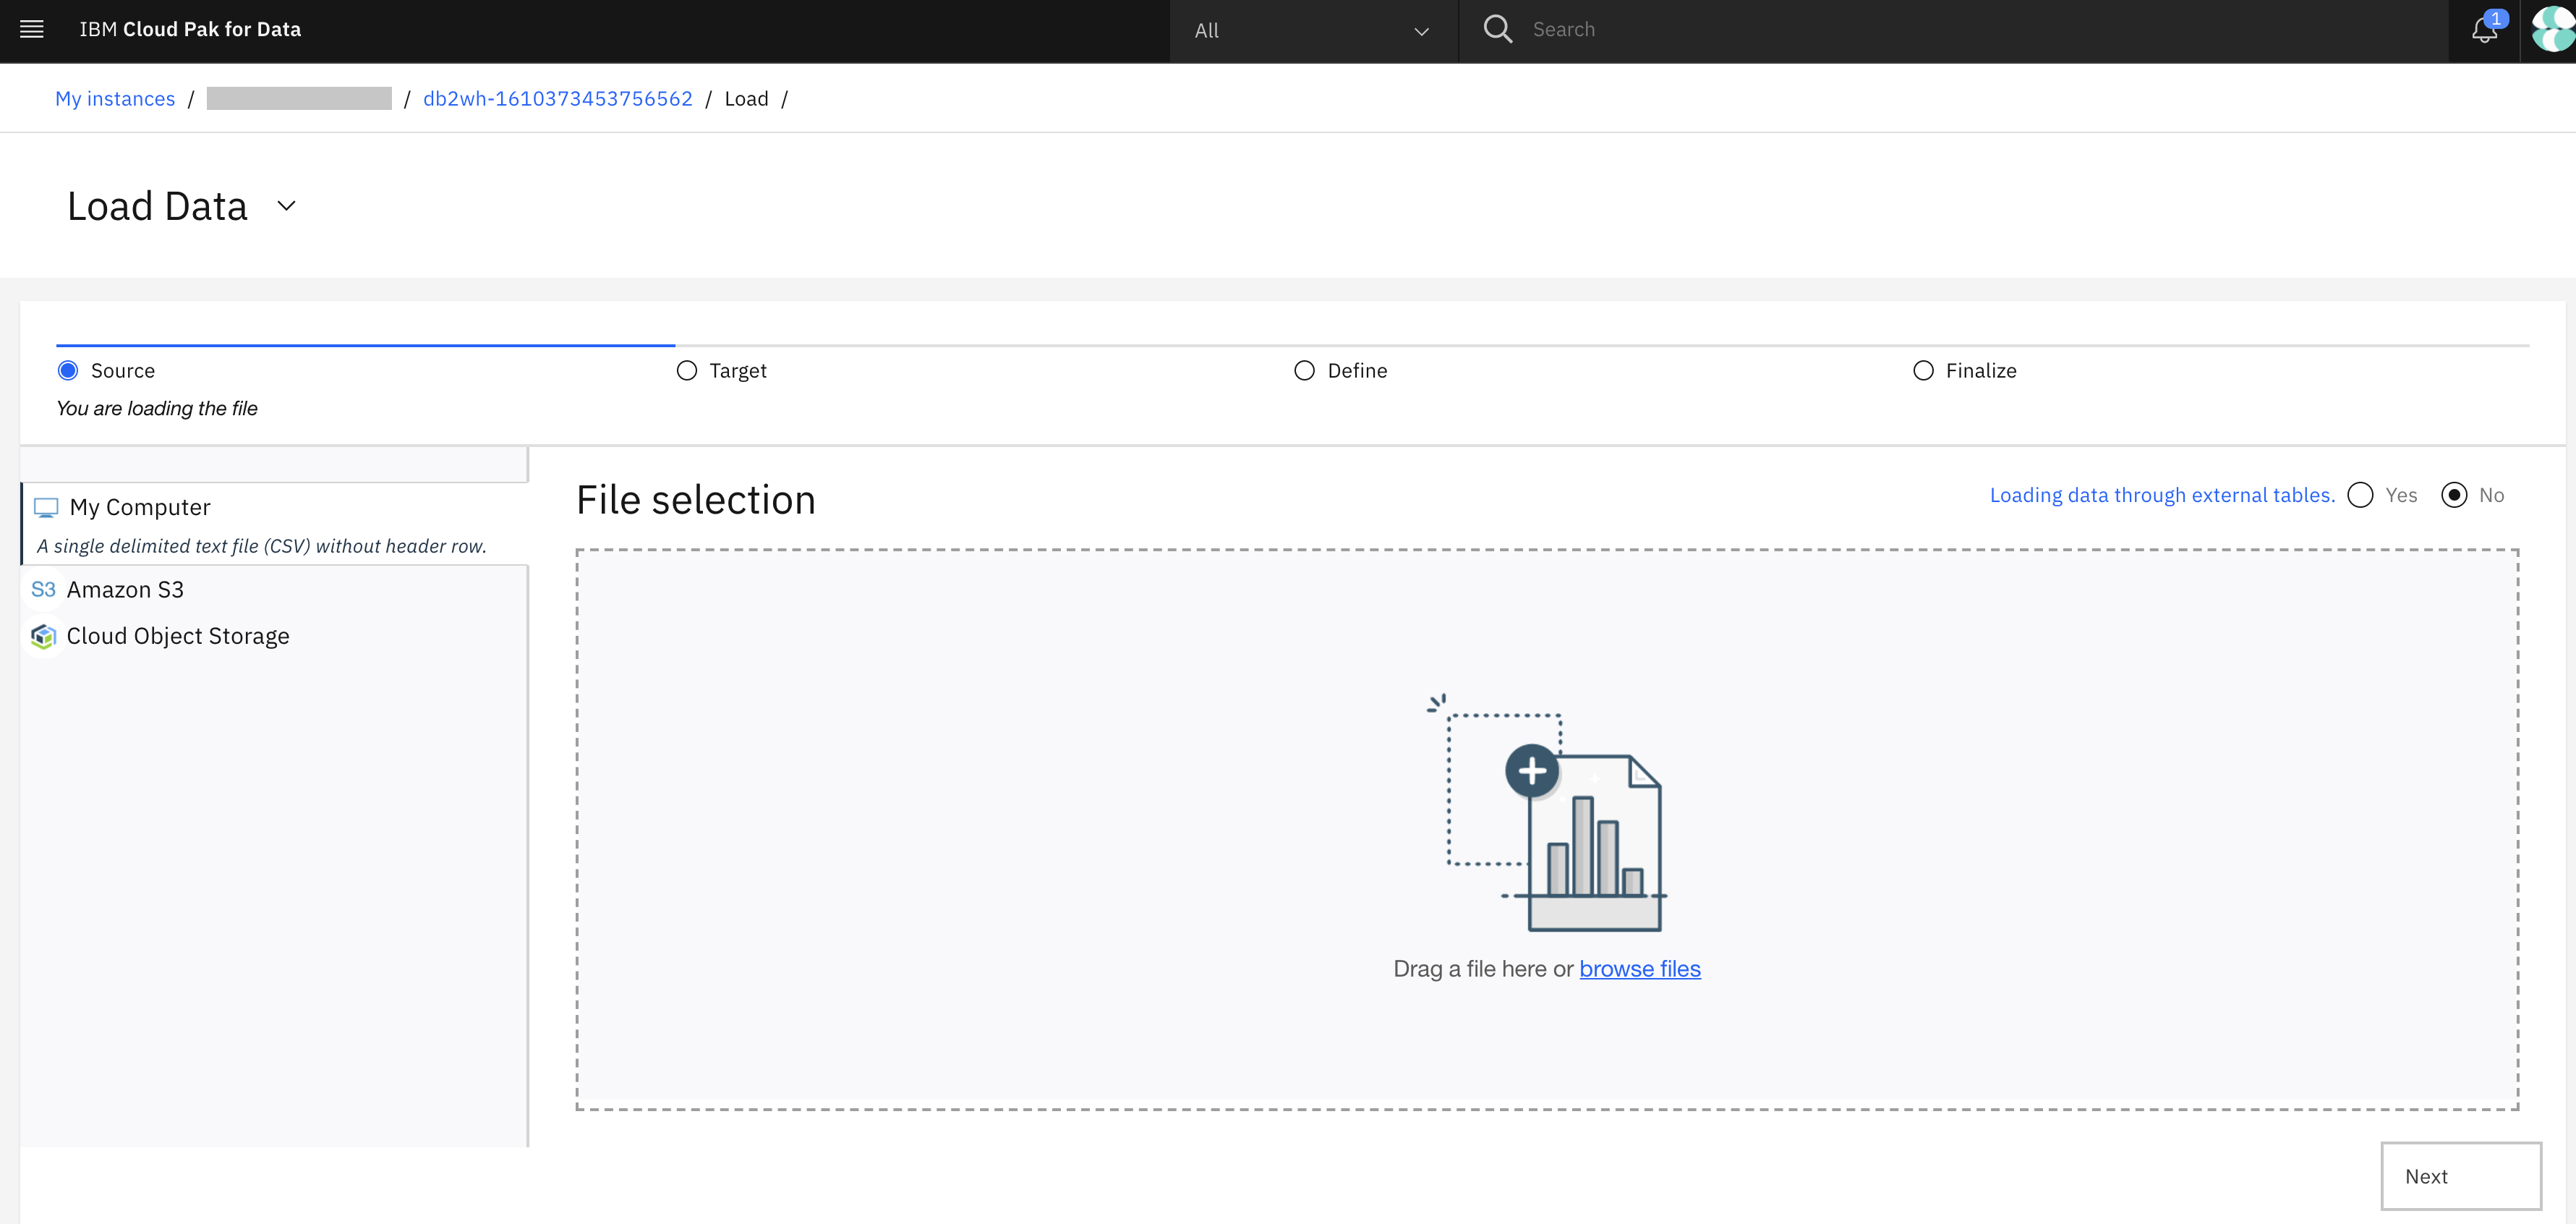

Both AWS and IBM Cloud are supported as COS sources. We will use COS on the IBM Cloud. 

Therefore let us click on the left side of your screen
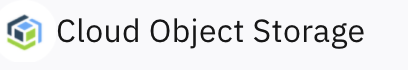

You get this screen:
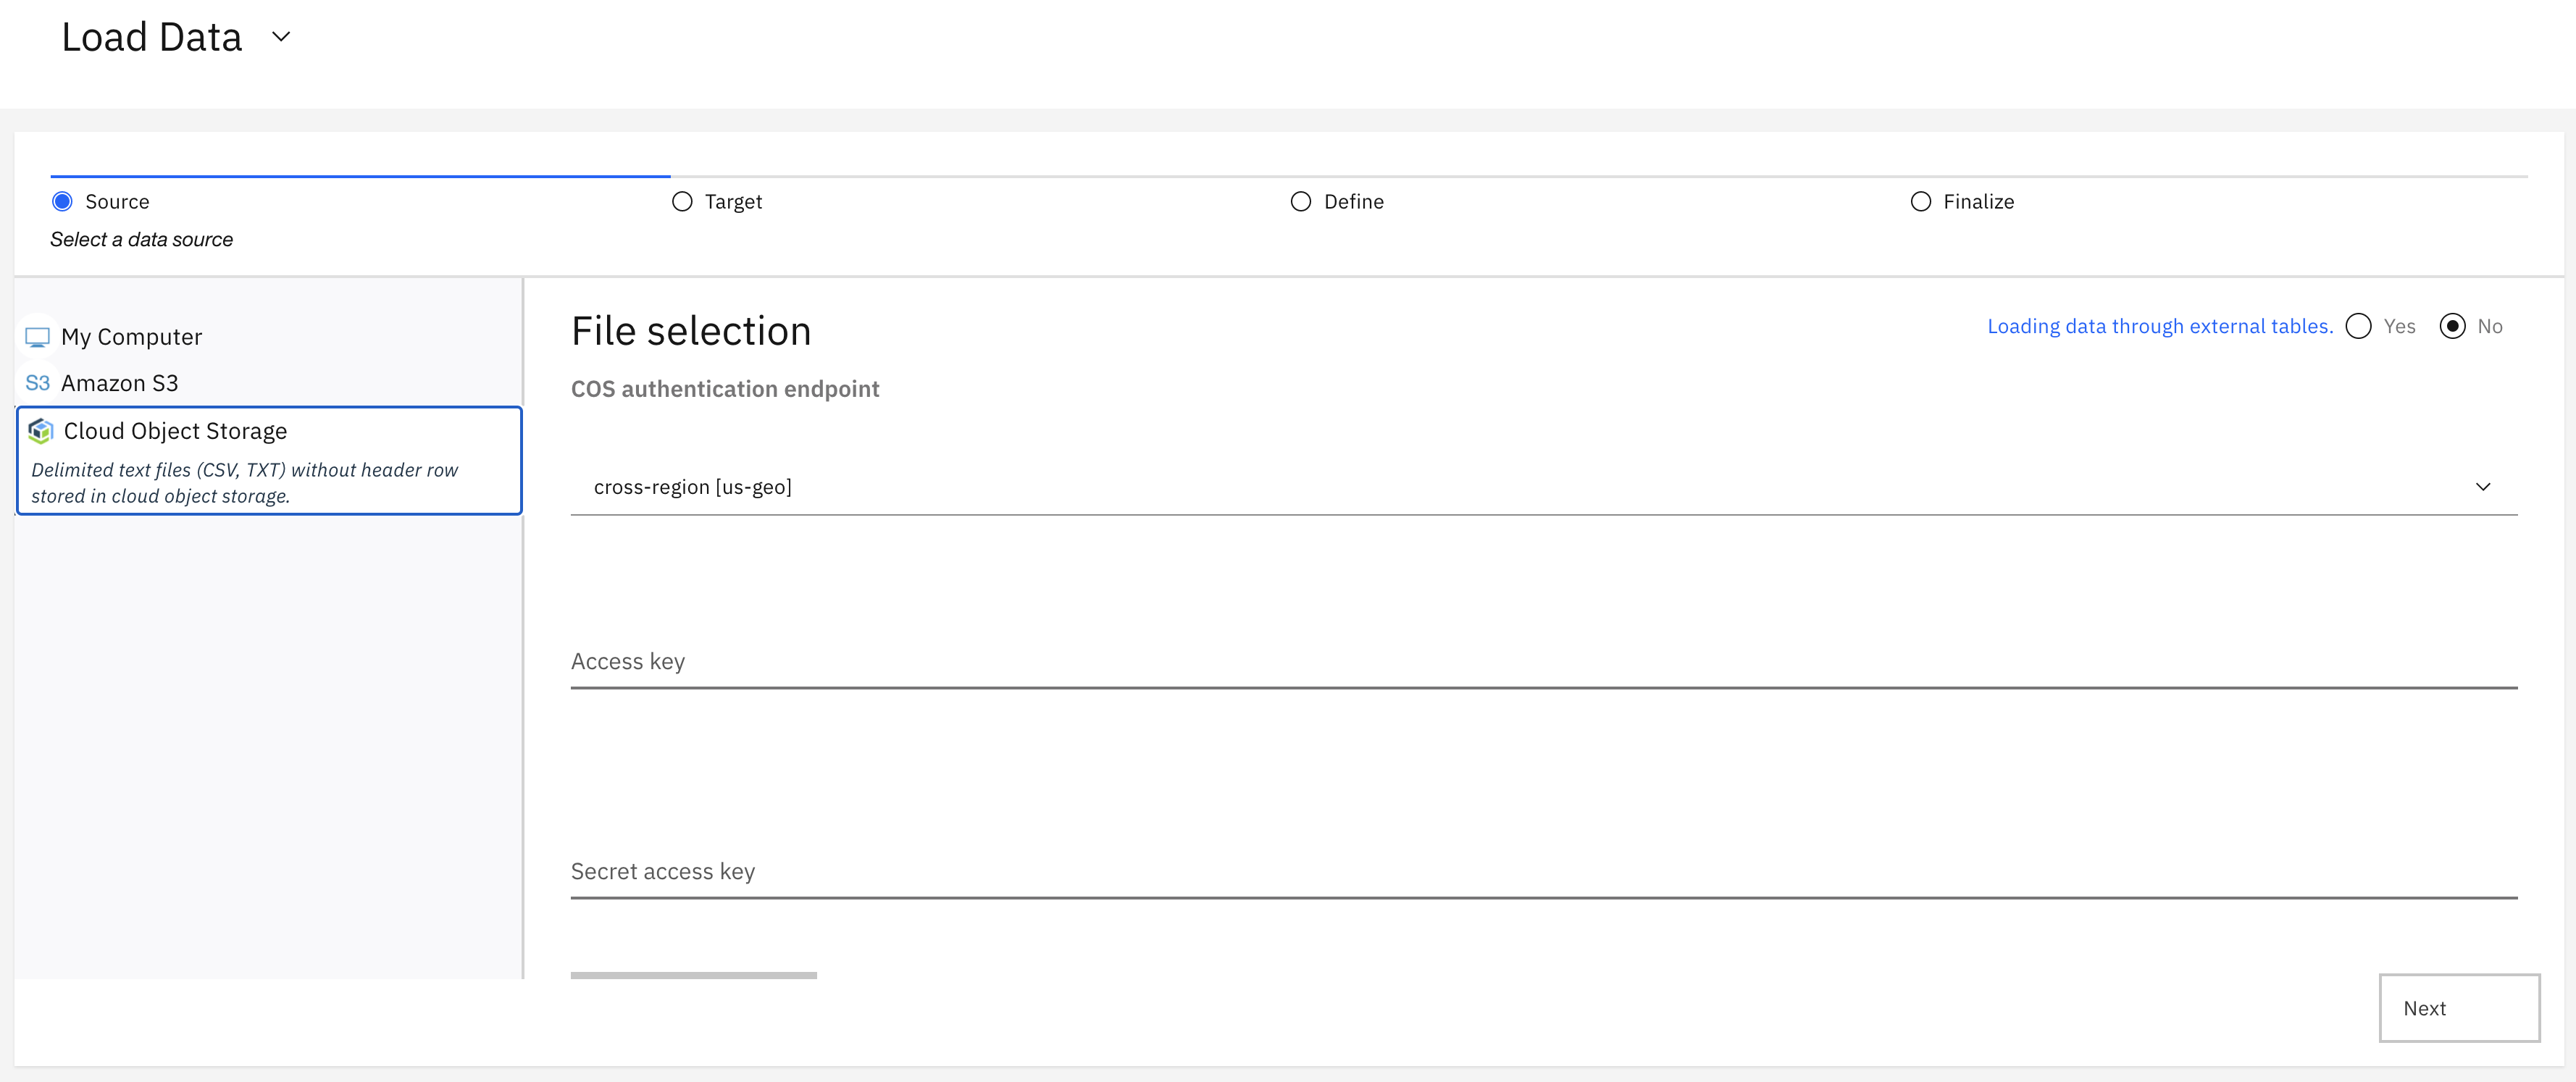

We use external tables as mechanism for loading the data (as we will later do at the SQL level).

Therefore, press the radio button "Yes" on upper right part of your screen after "Loading data through external tables":
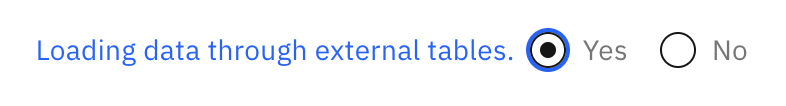

First, we enter the "COS authentication endpoint.

Scroll down to "regional eu-de" and select this.
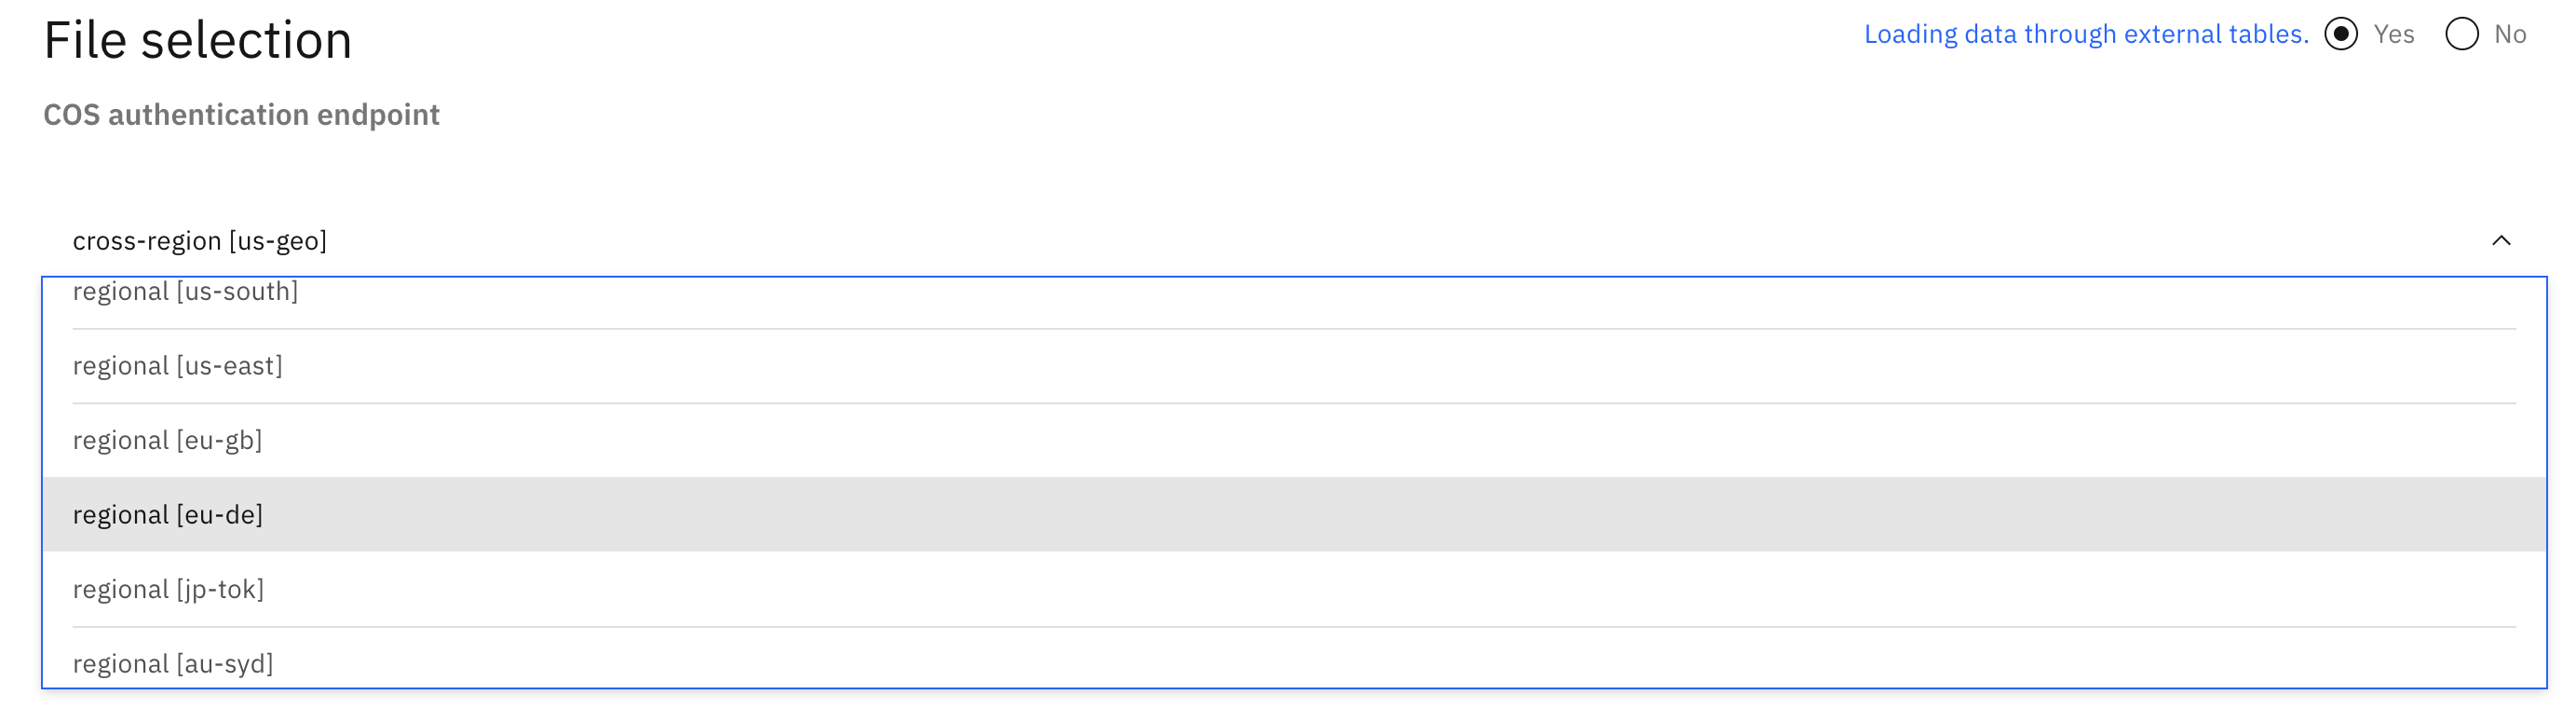

Enter the this access key 40b9127d7fb24bdfb1cc6284963c2015

Enter the this secret access key a522b8bdb9b041734995282bdeb0838b552a367a108885ef
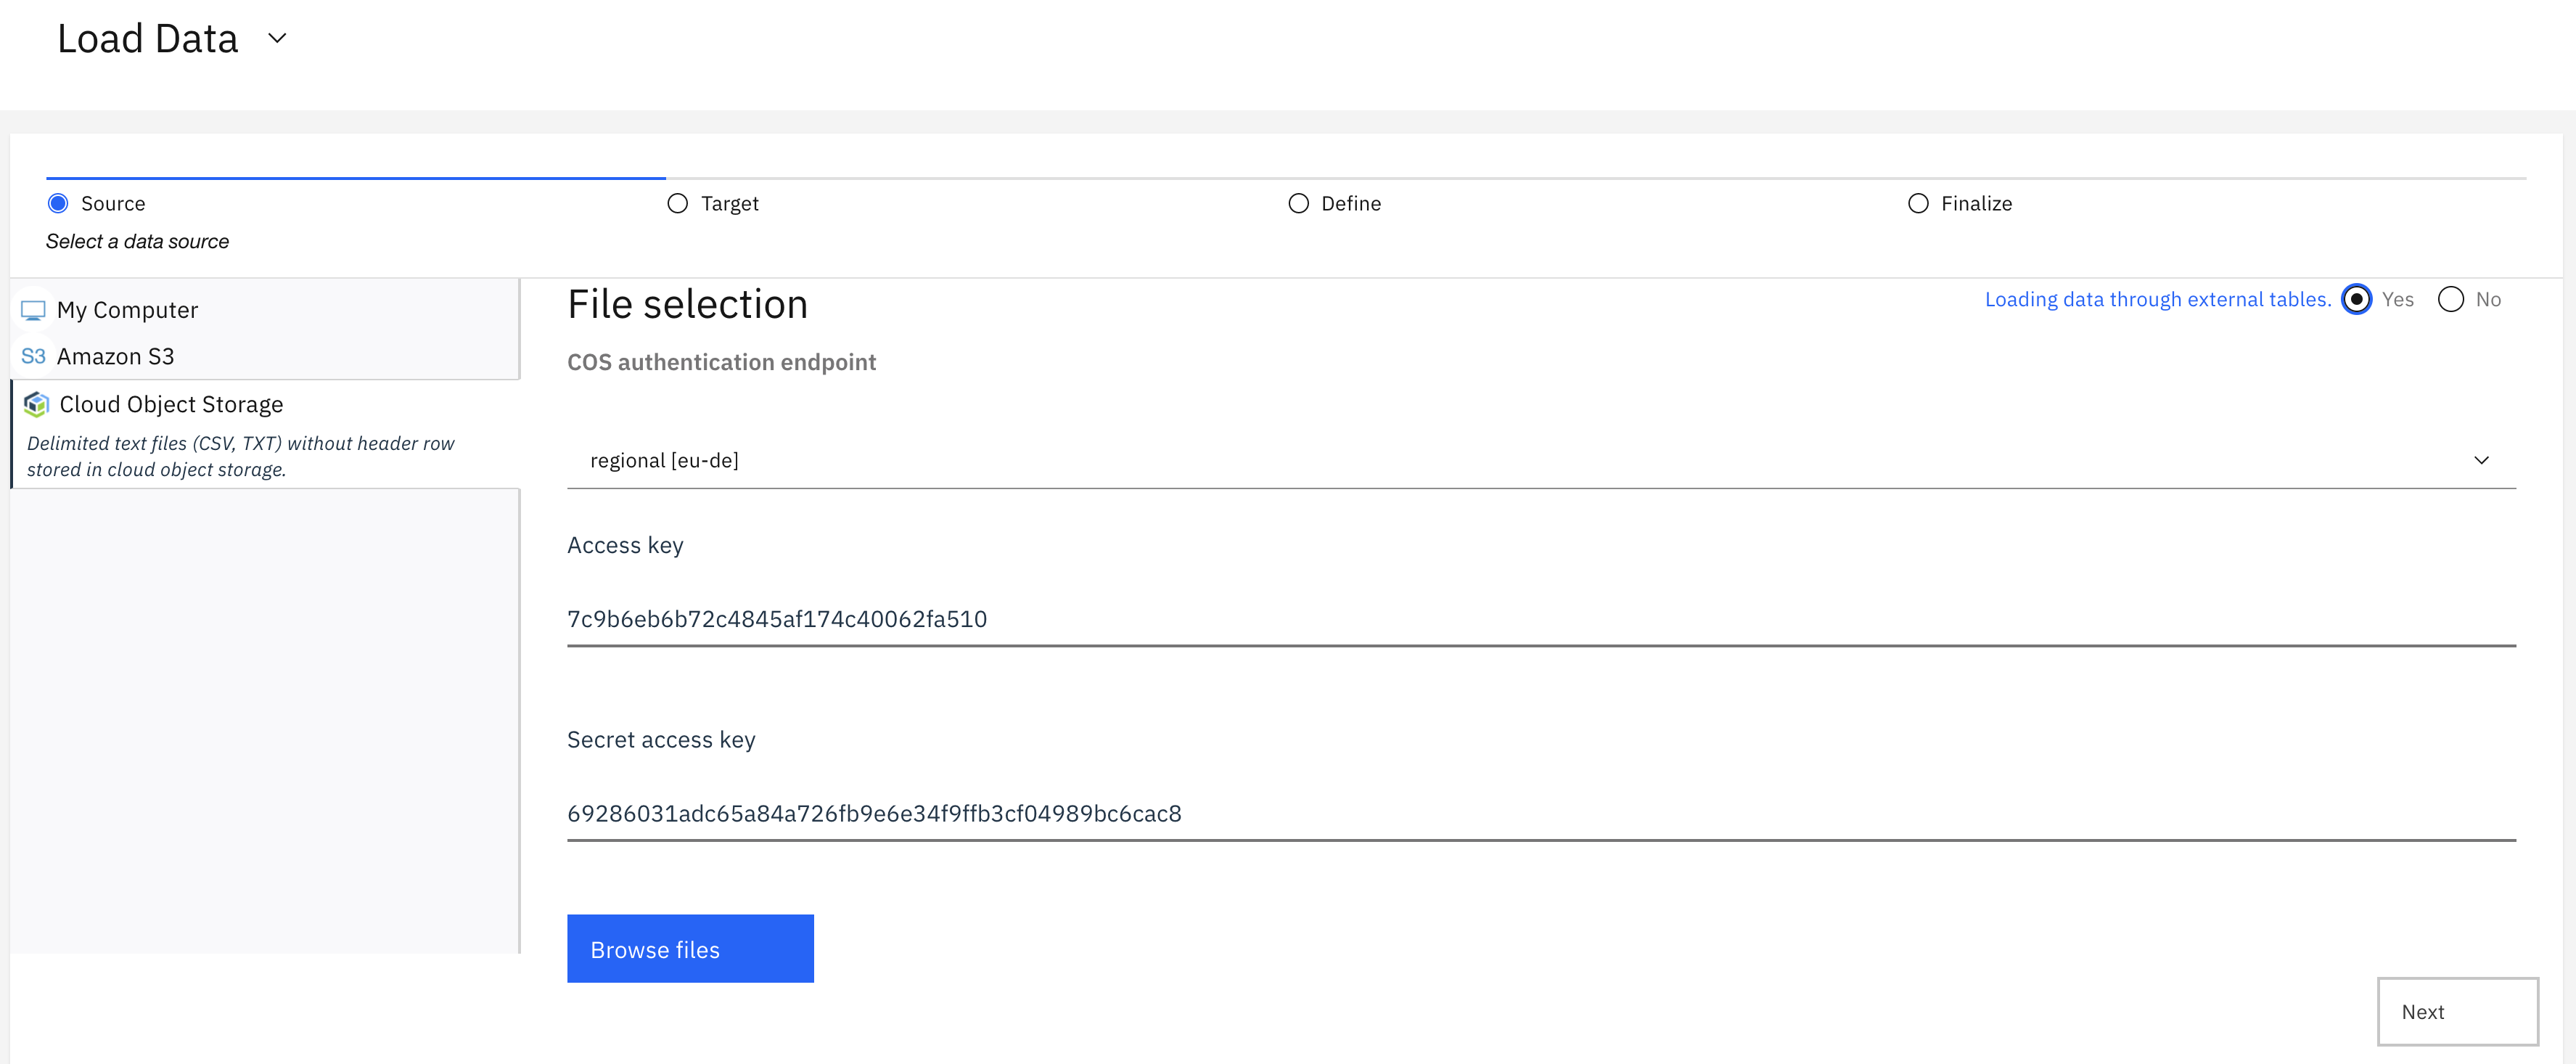

Click "Browse Files" and you should see this screen:
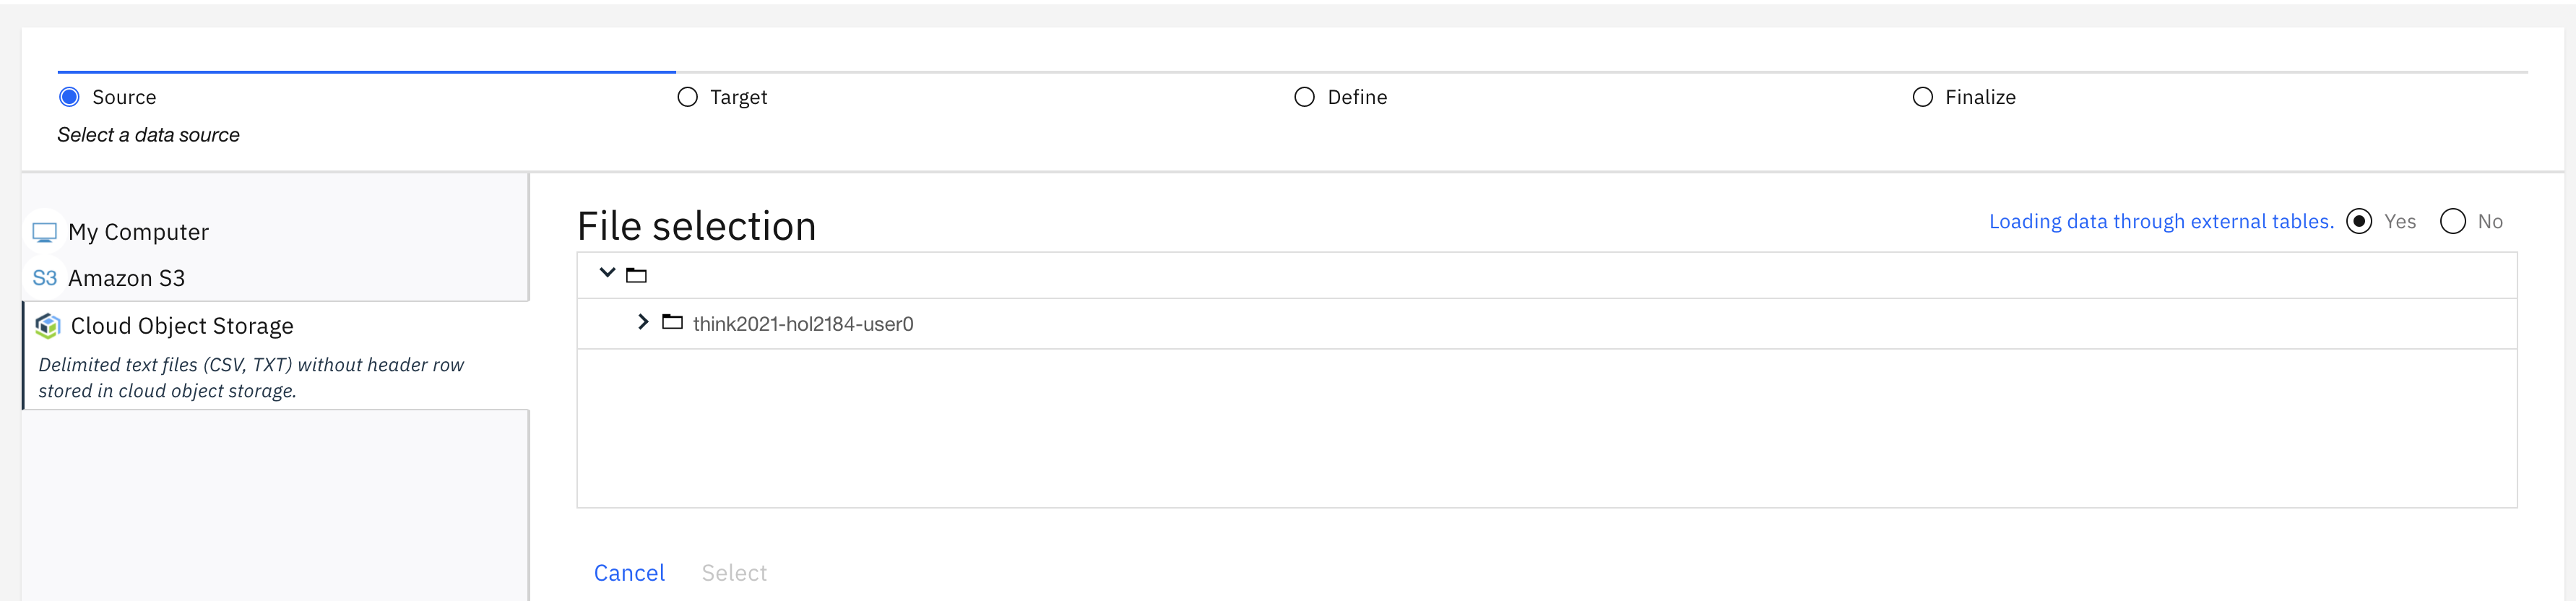

If you don't see "think2021-hol2184-user0", then press "cancel" to go back to the previous screen and check whether you entered everything as described above.

If you see "think2021-hol2184-user0" click on it to expand it. You should see all the files shown on this screen:
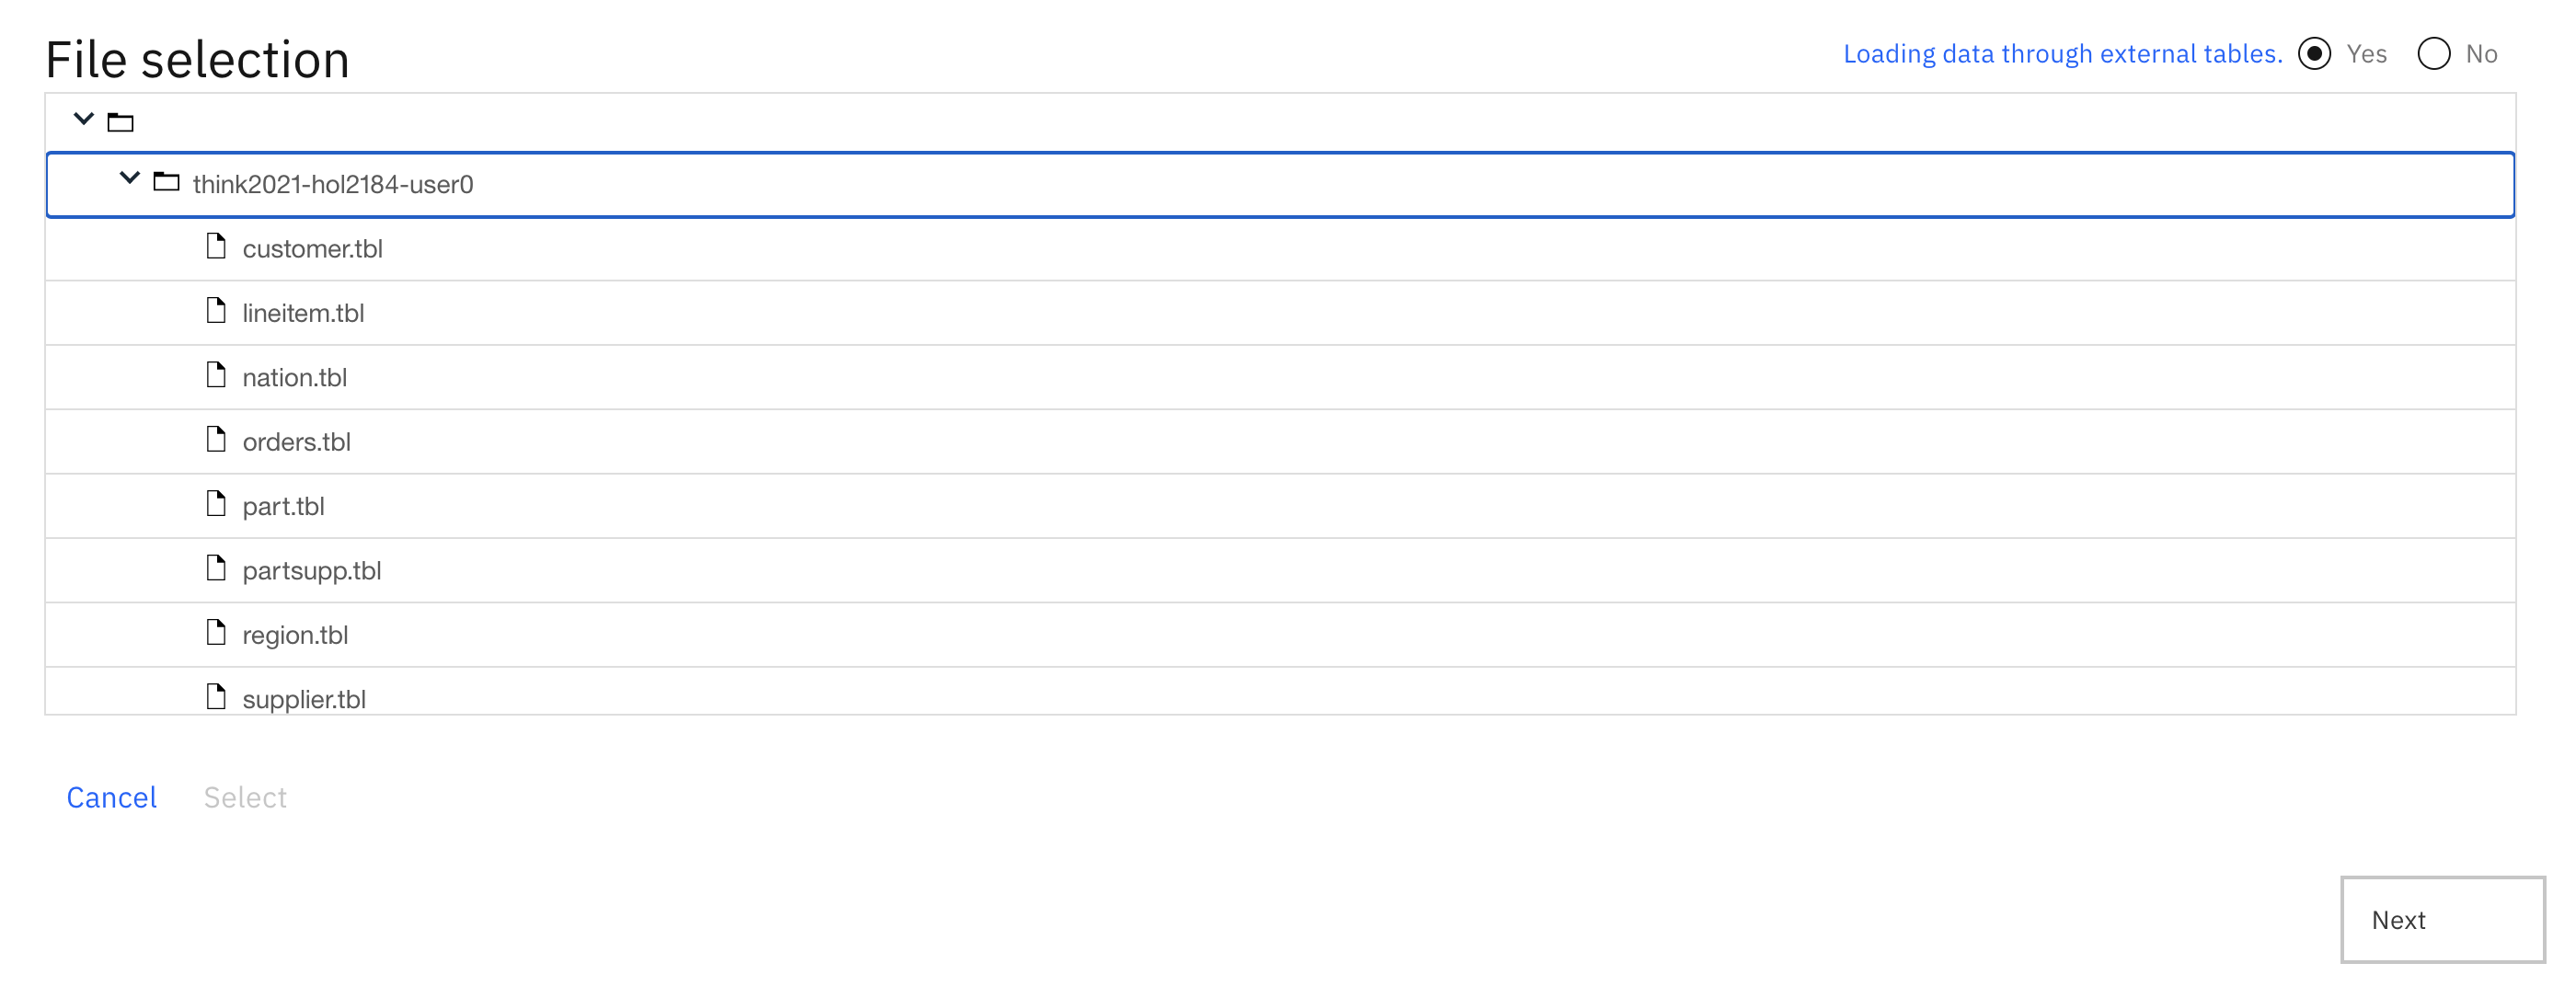

Click on nation.tbl and then on "select":
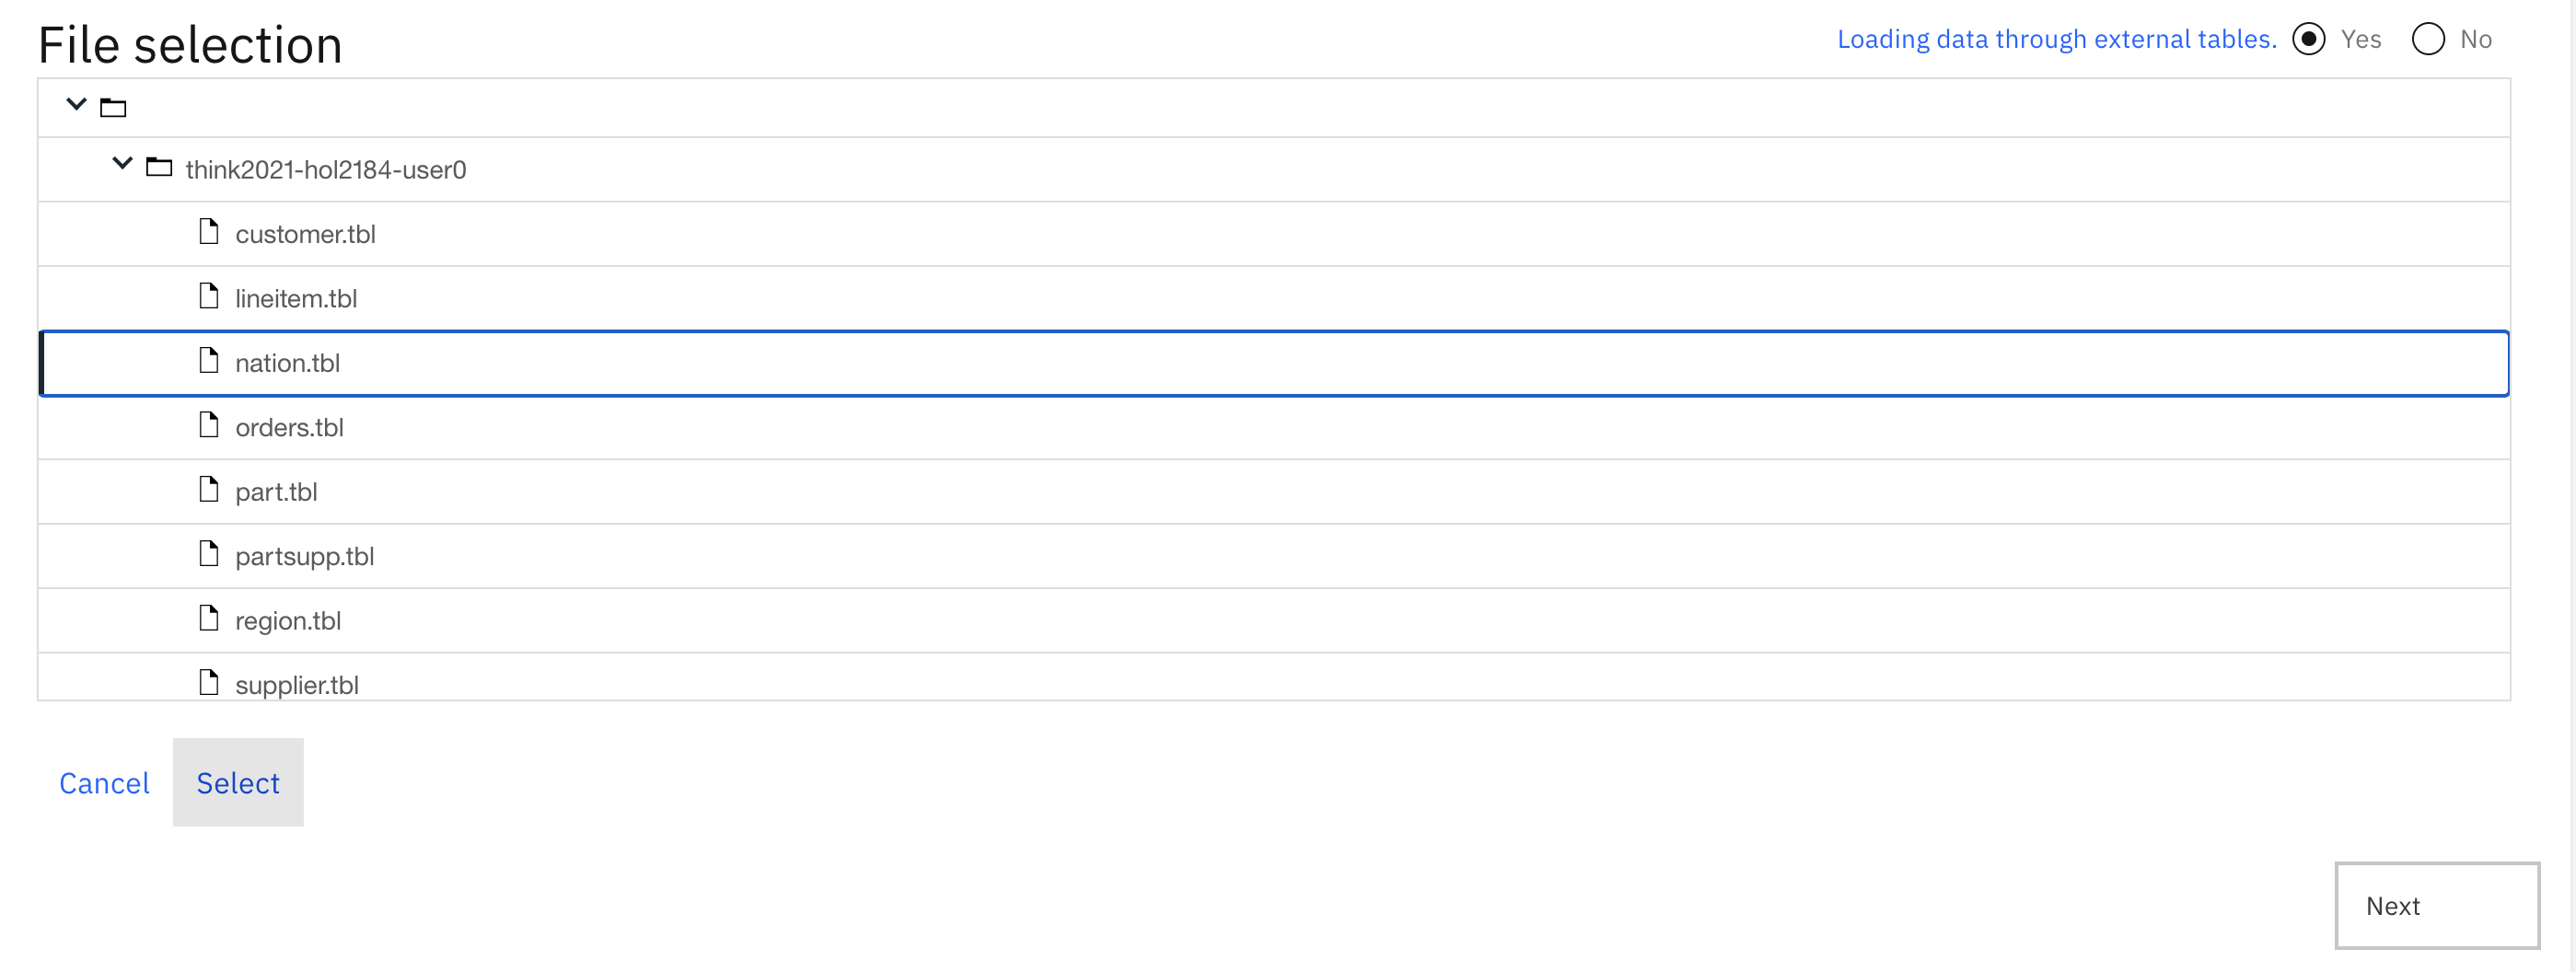

Now "nation.tbl" is shown on the right side of your screen as the file selected for loading.
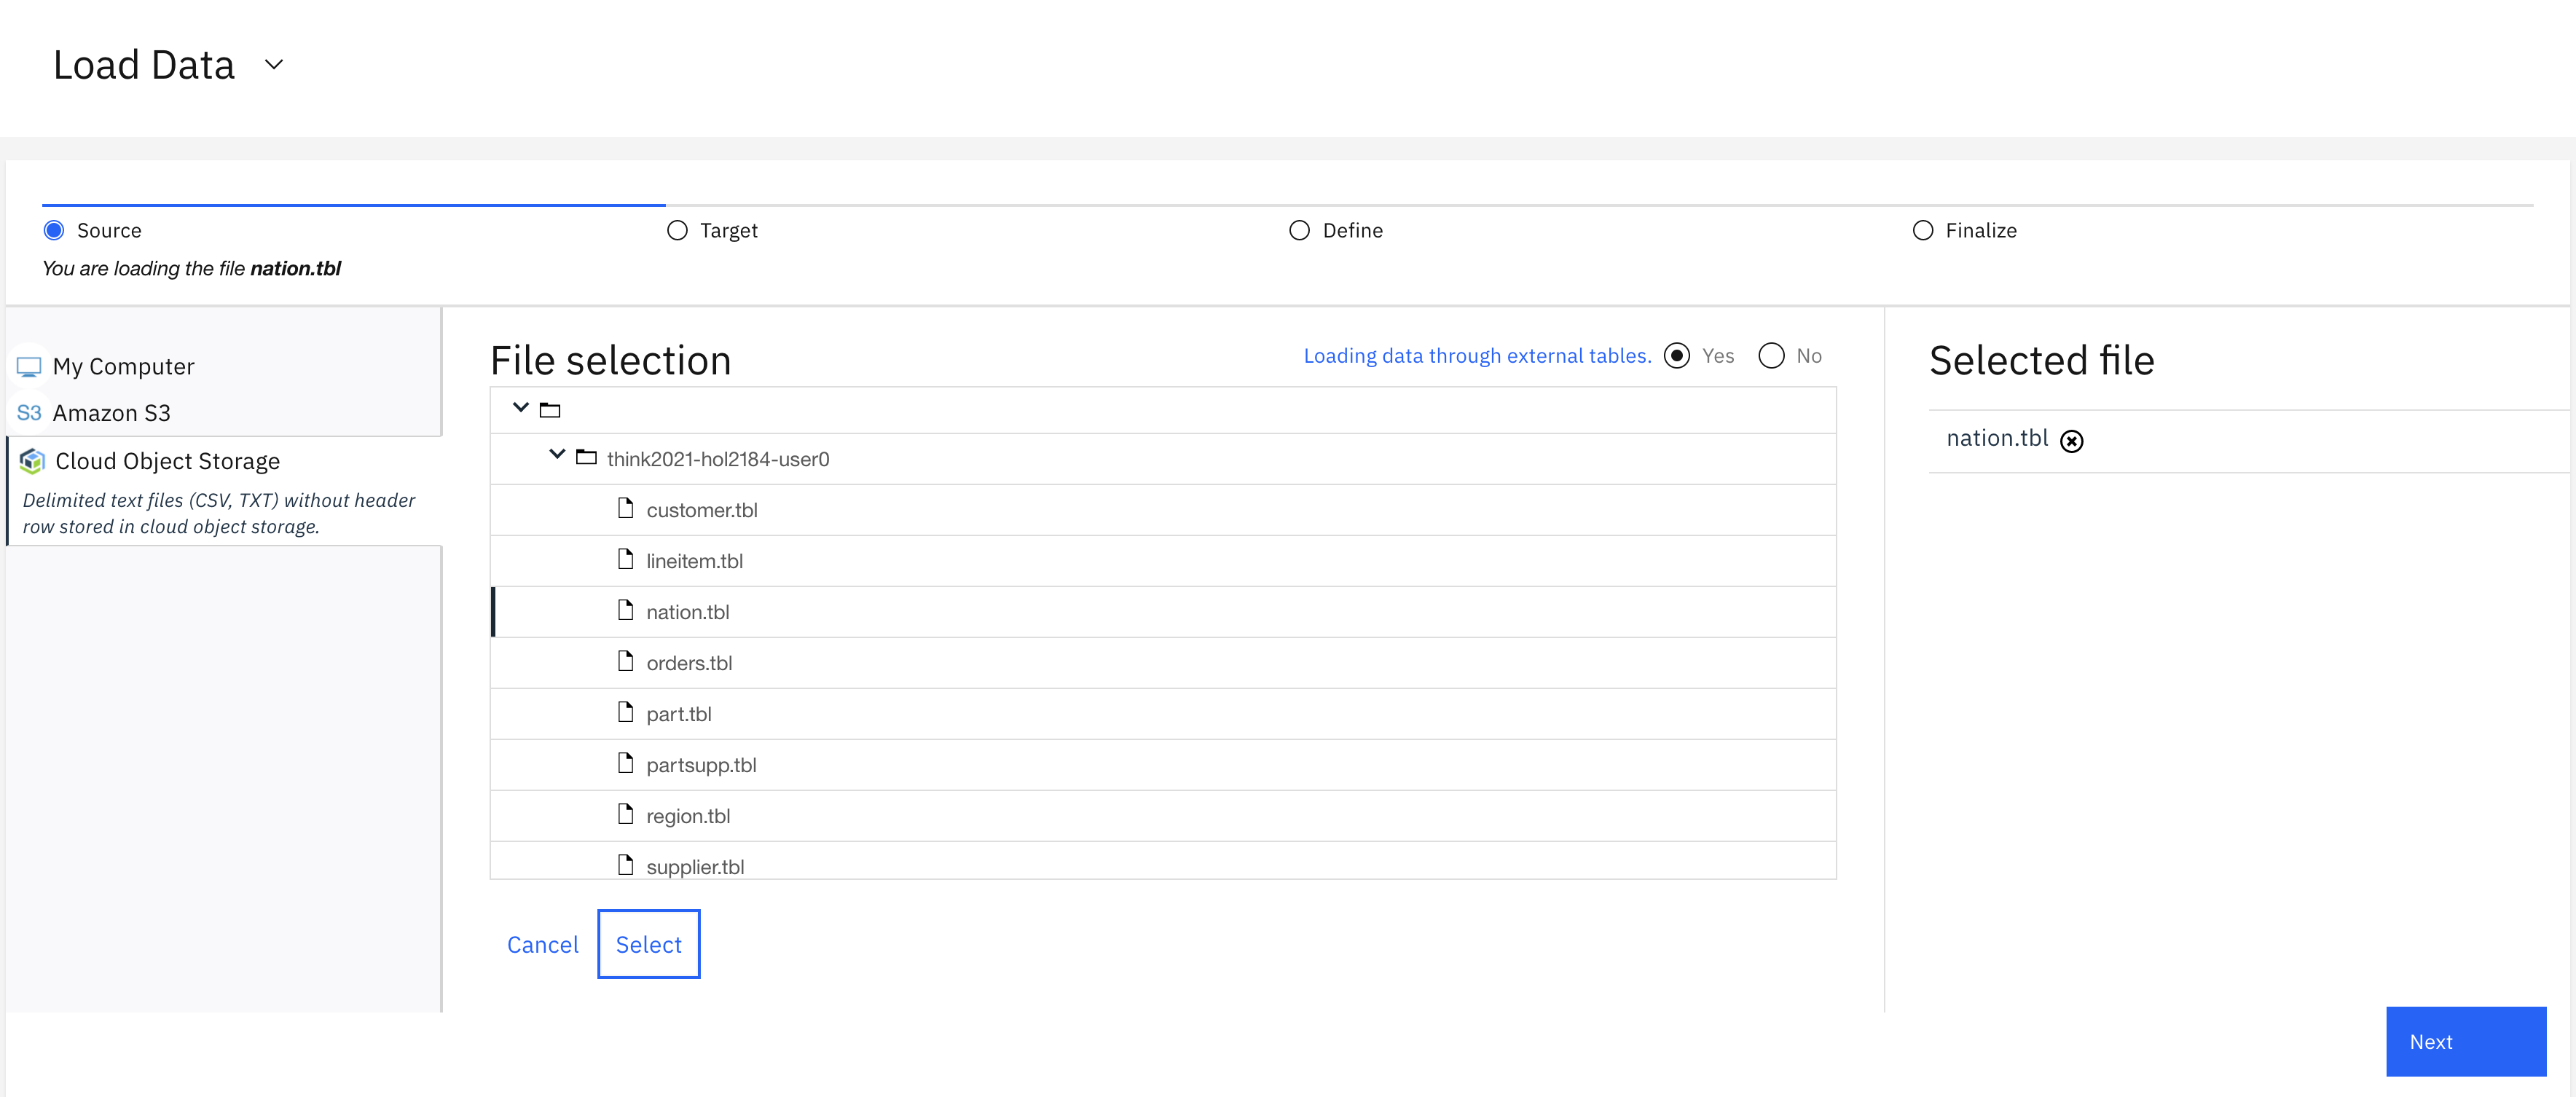

You can now click "next" and you get this screen:
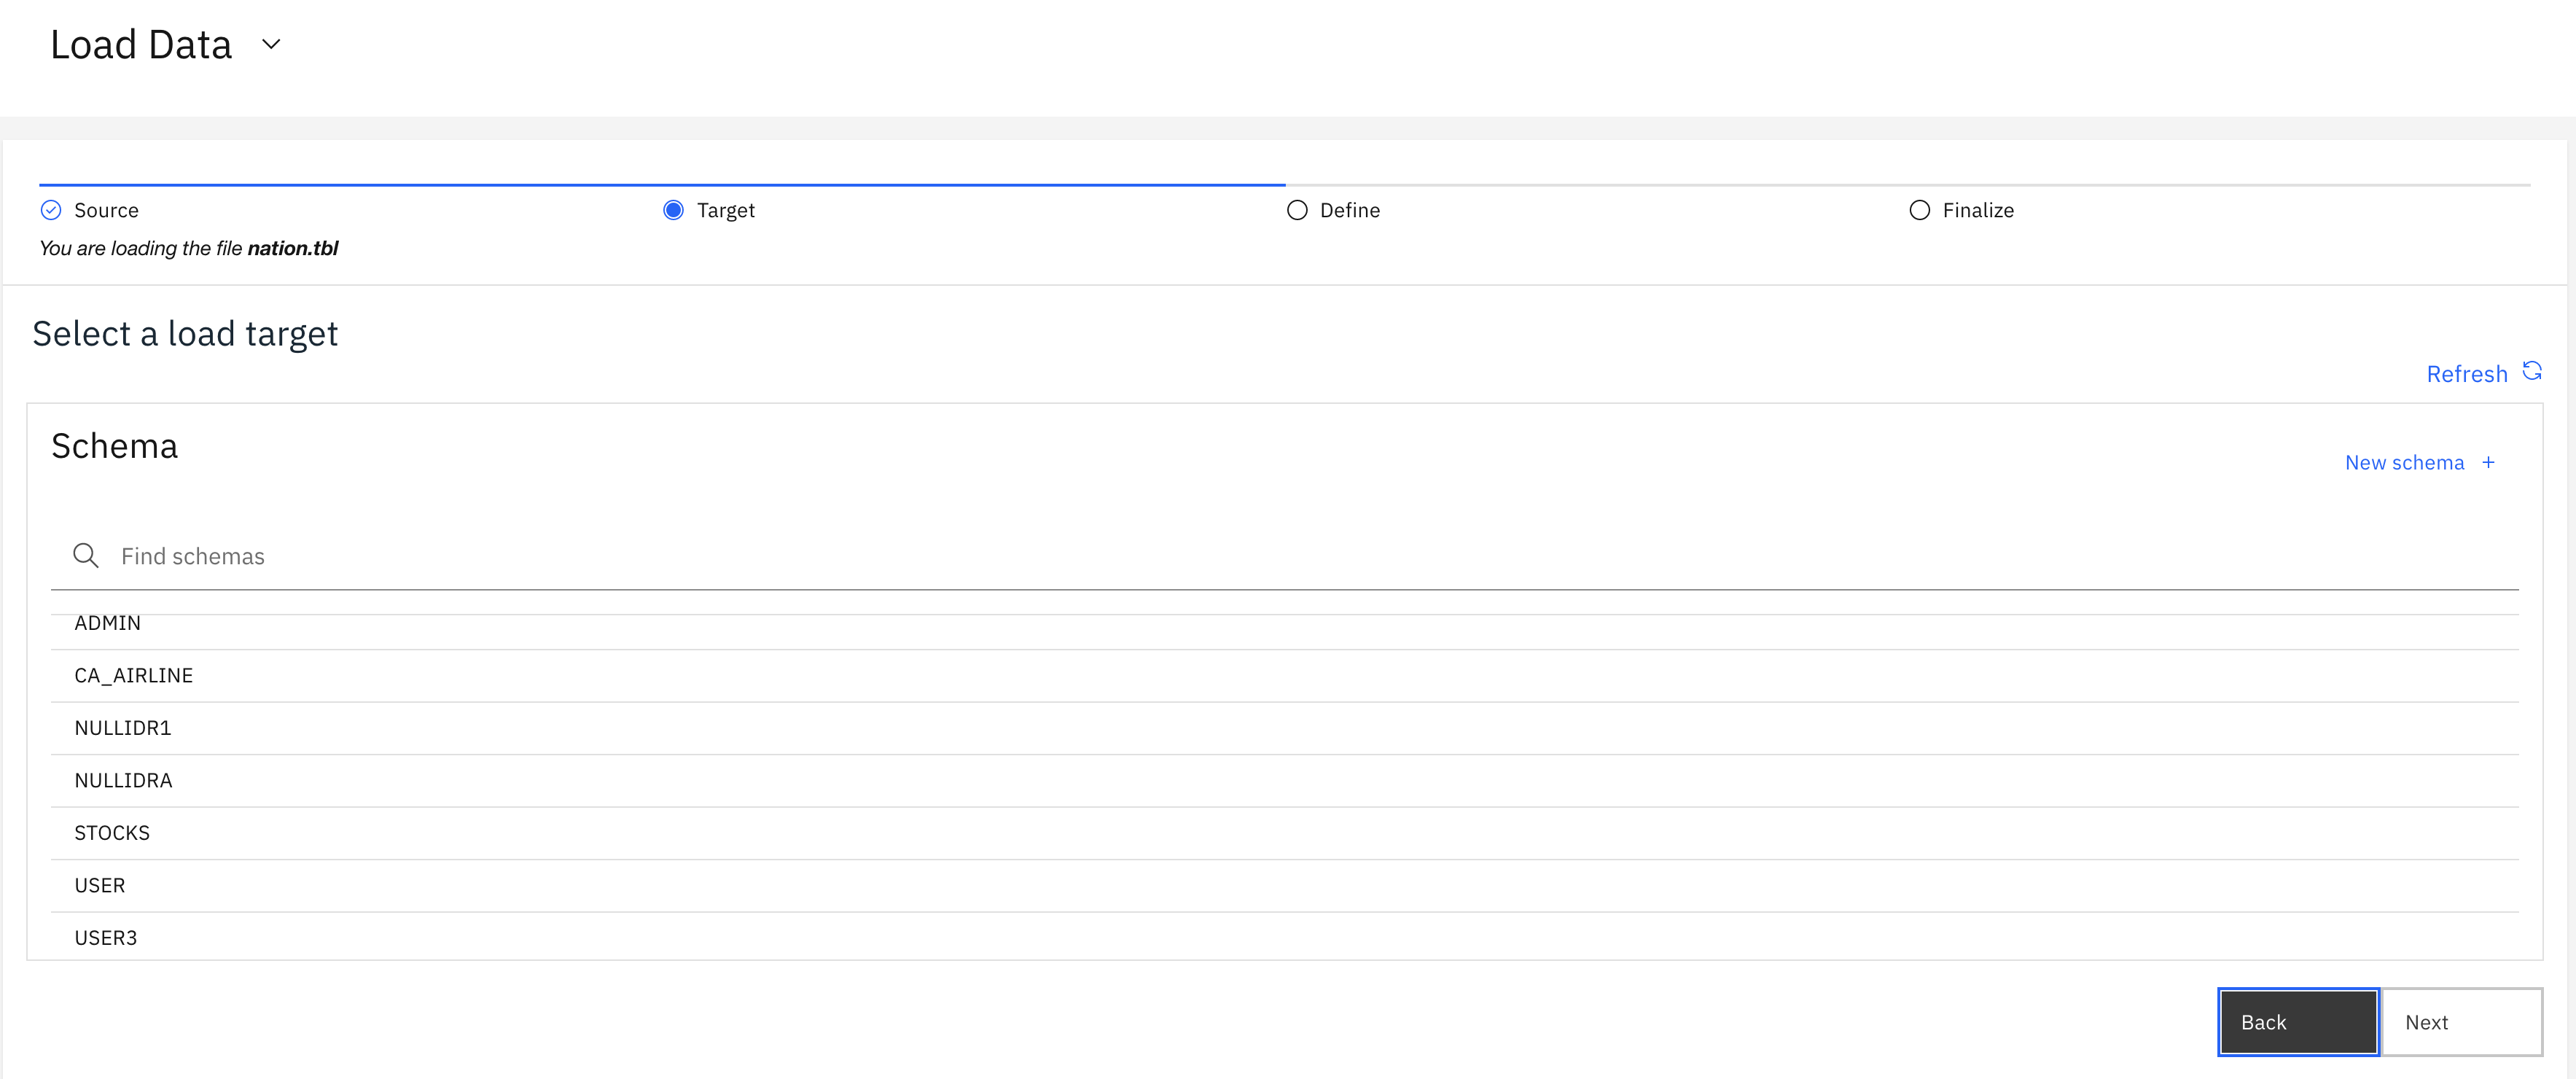

Scroll down an check whether your user id is shown as a schema. 

If this is the case as in the above screen (the screen shot assume that the user id is user3. You user id is probably different), click on it and you get:
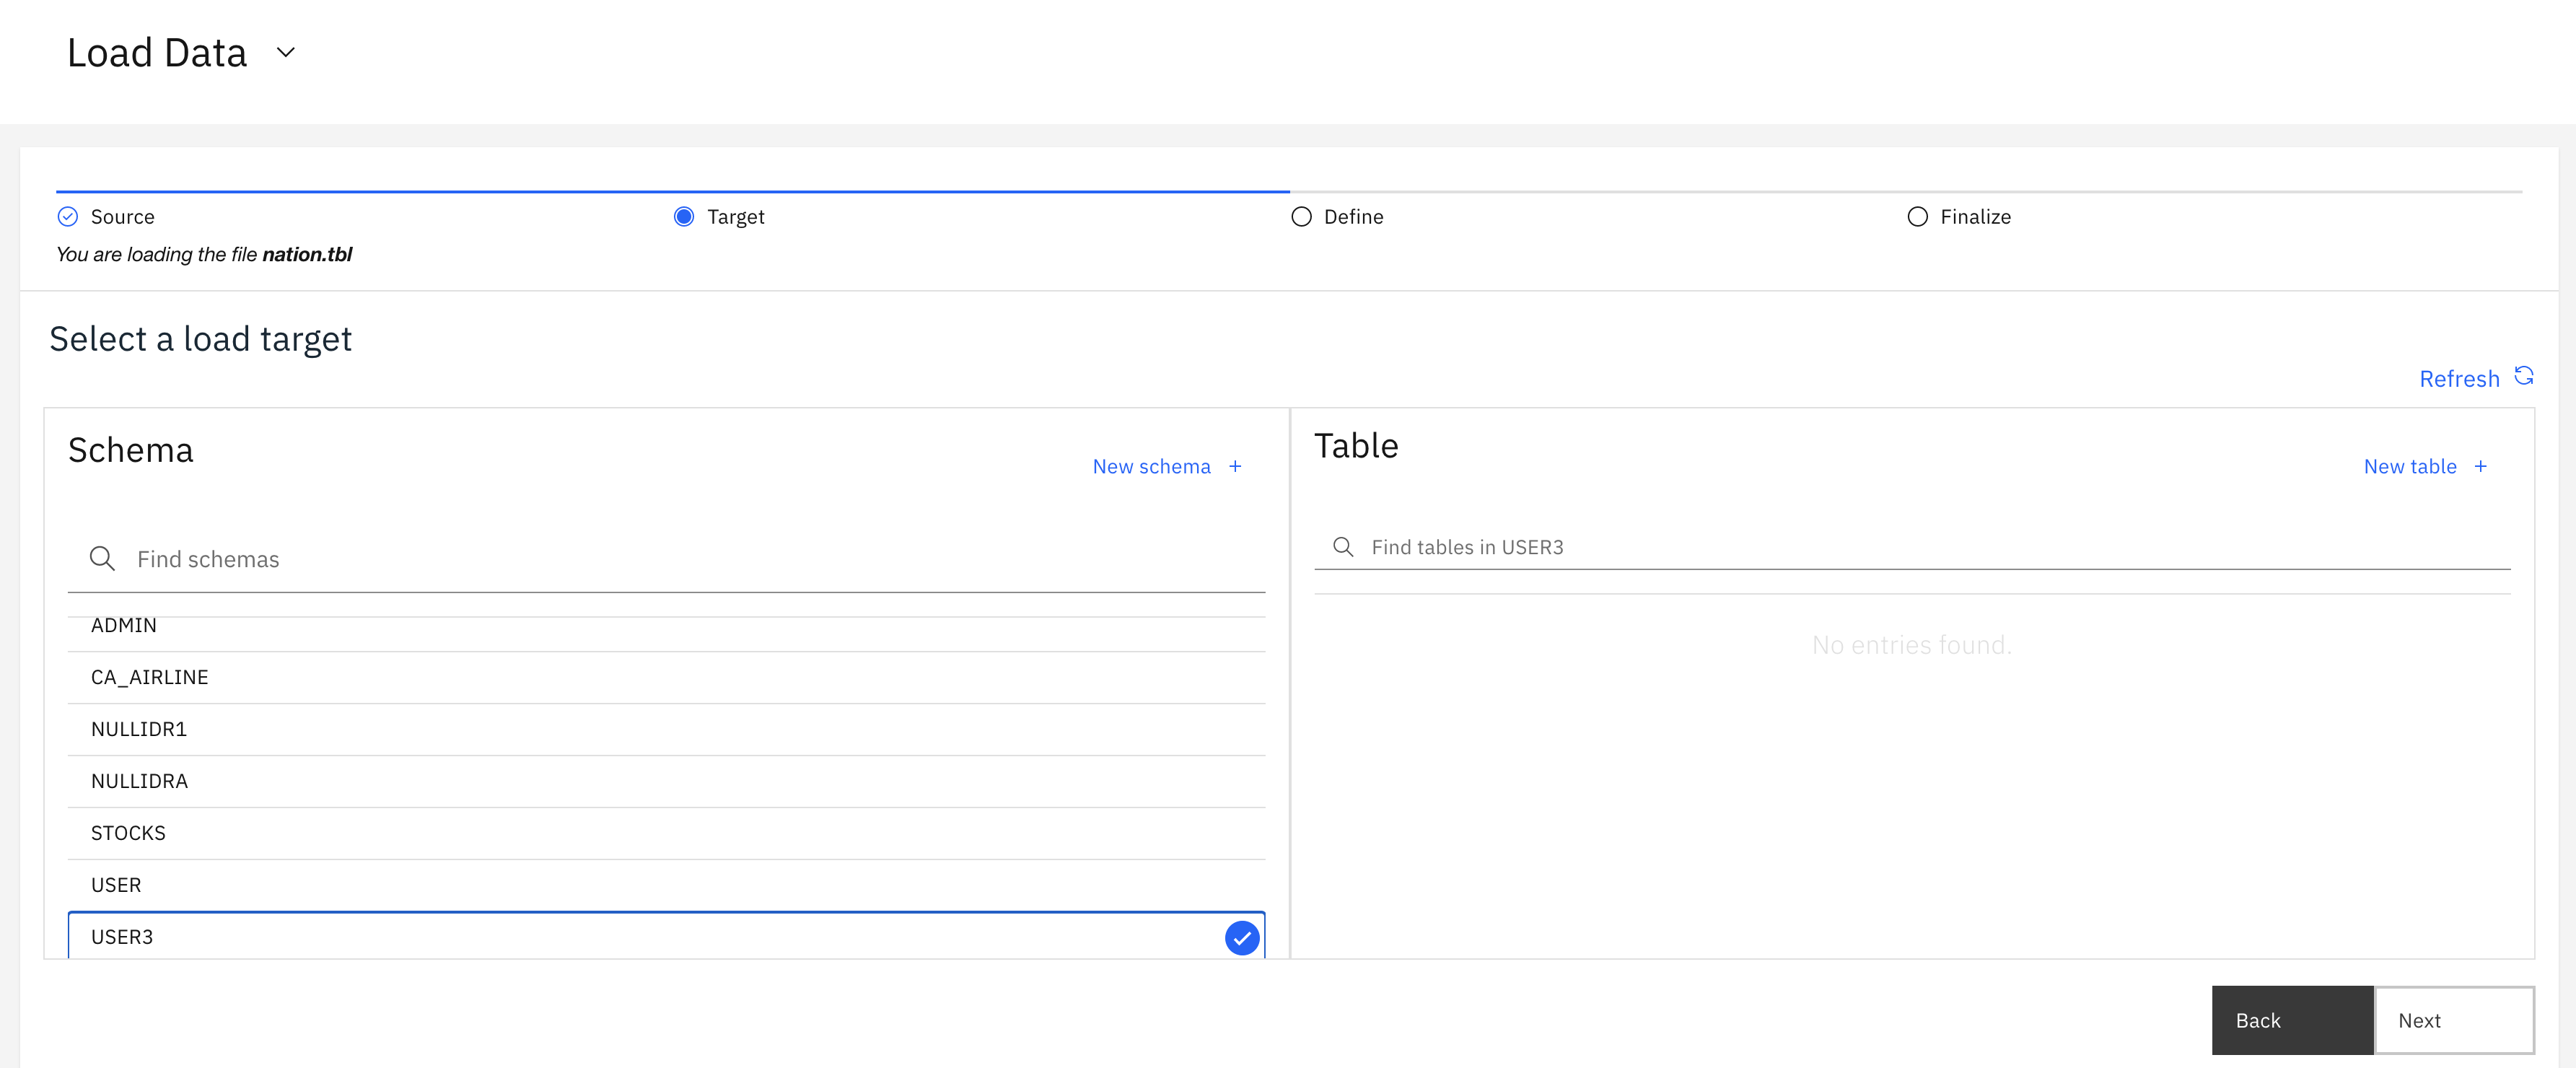

If you user id is not yet listed as a schema as in this screen shot:
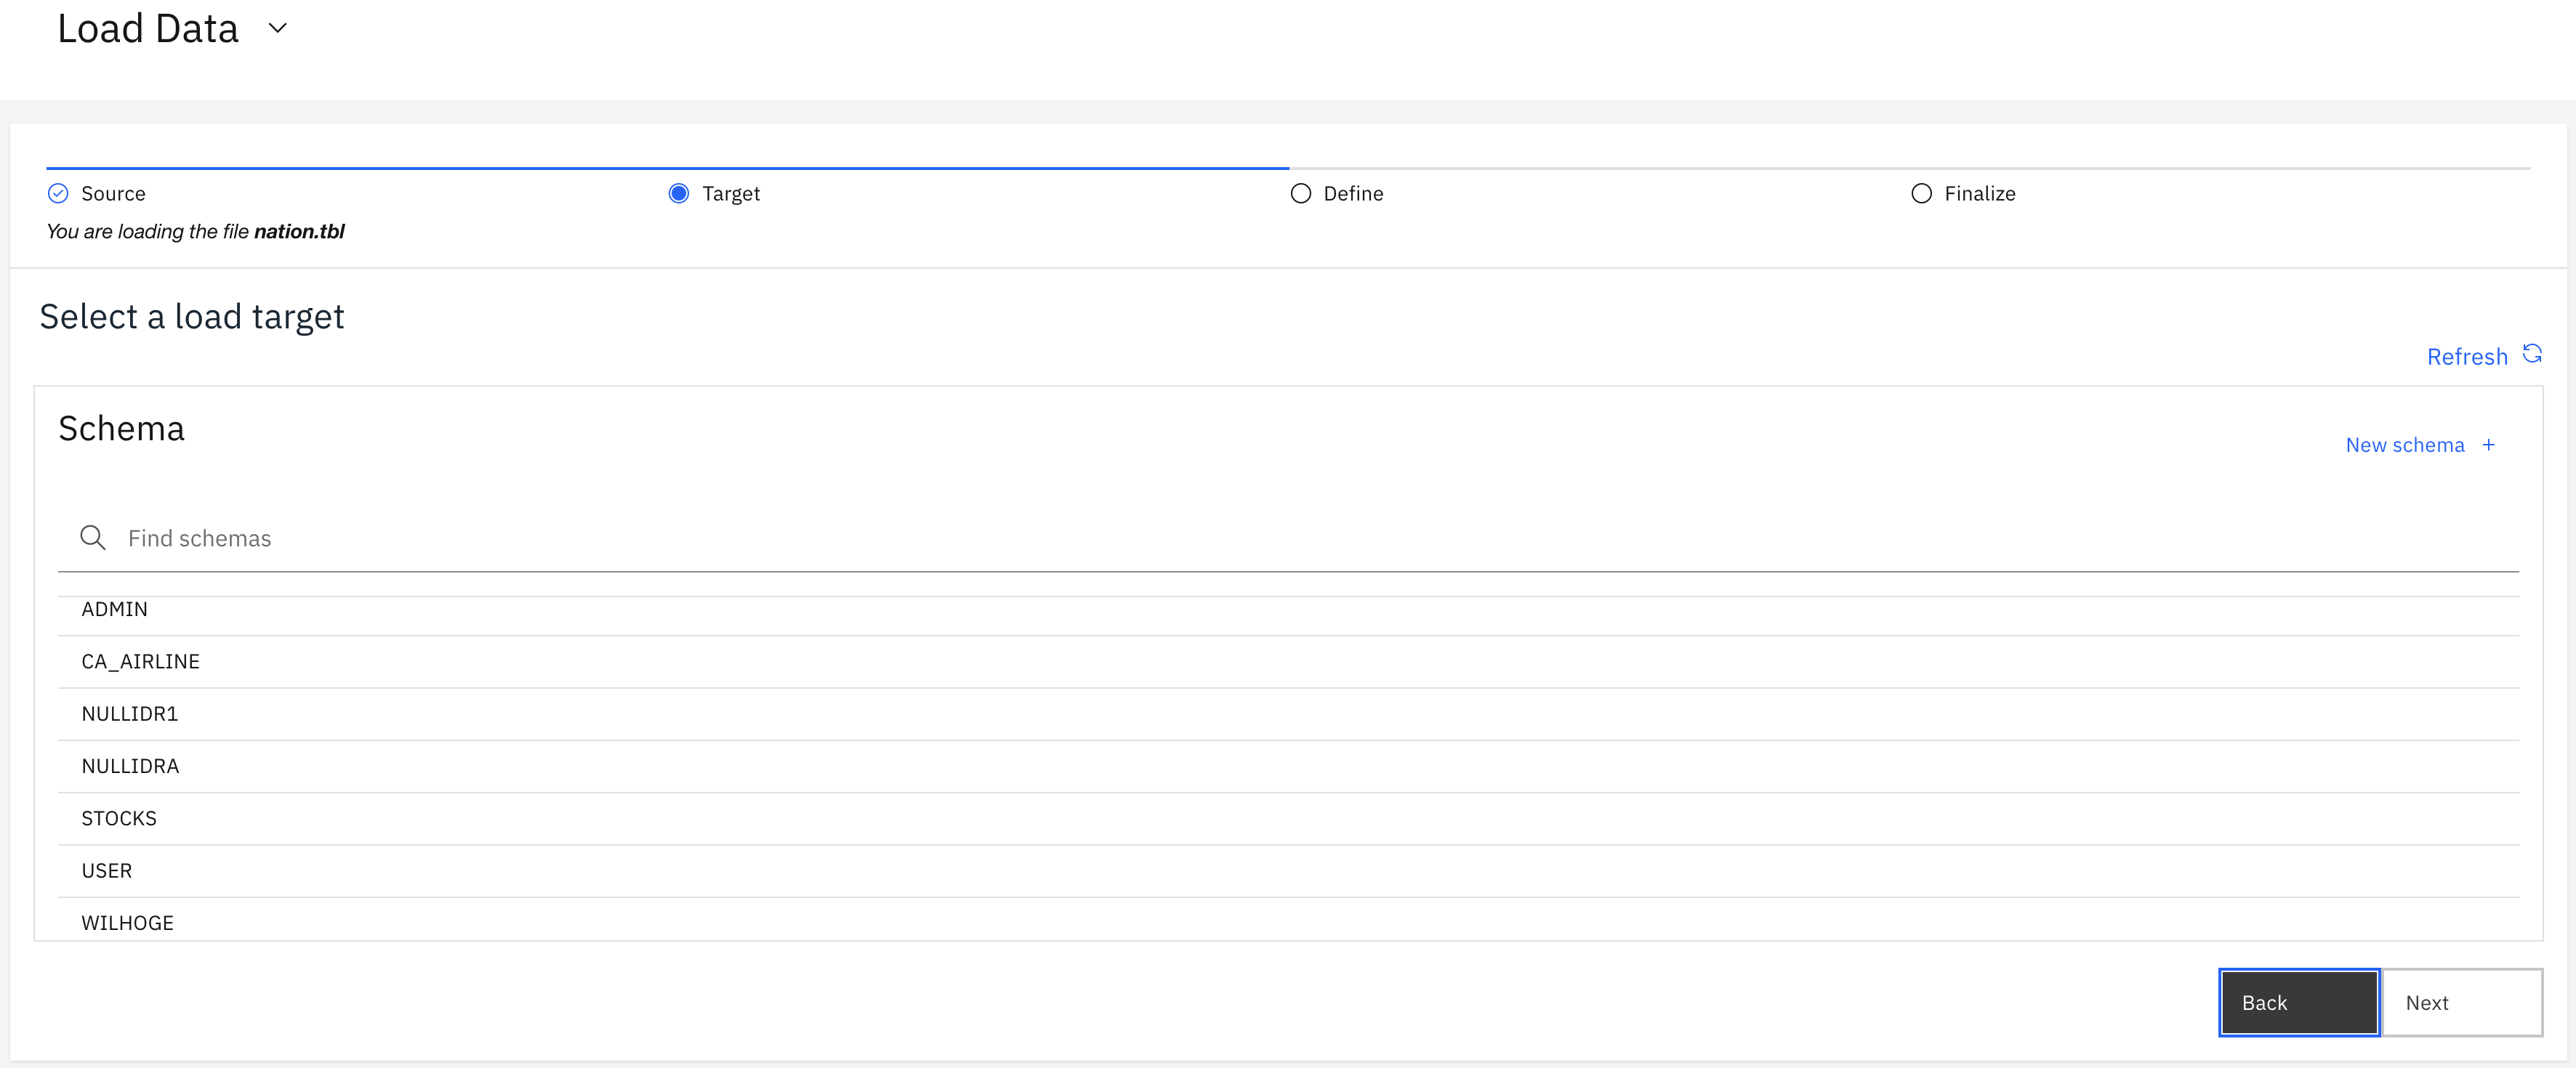

Then click on "New schema +":
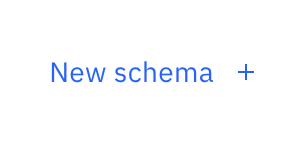

And you get:
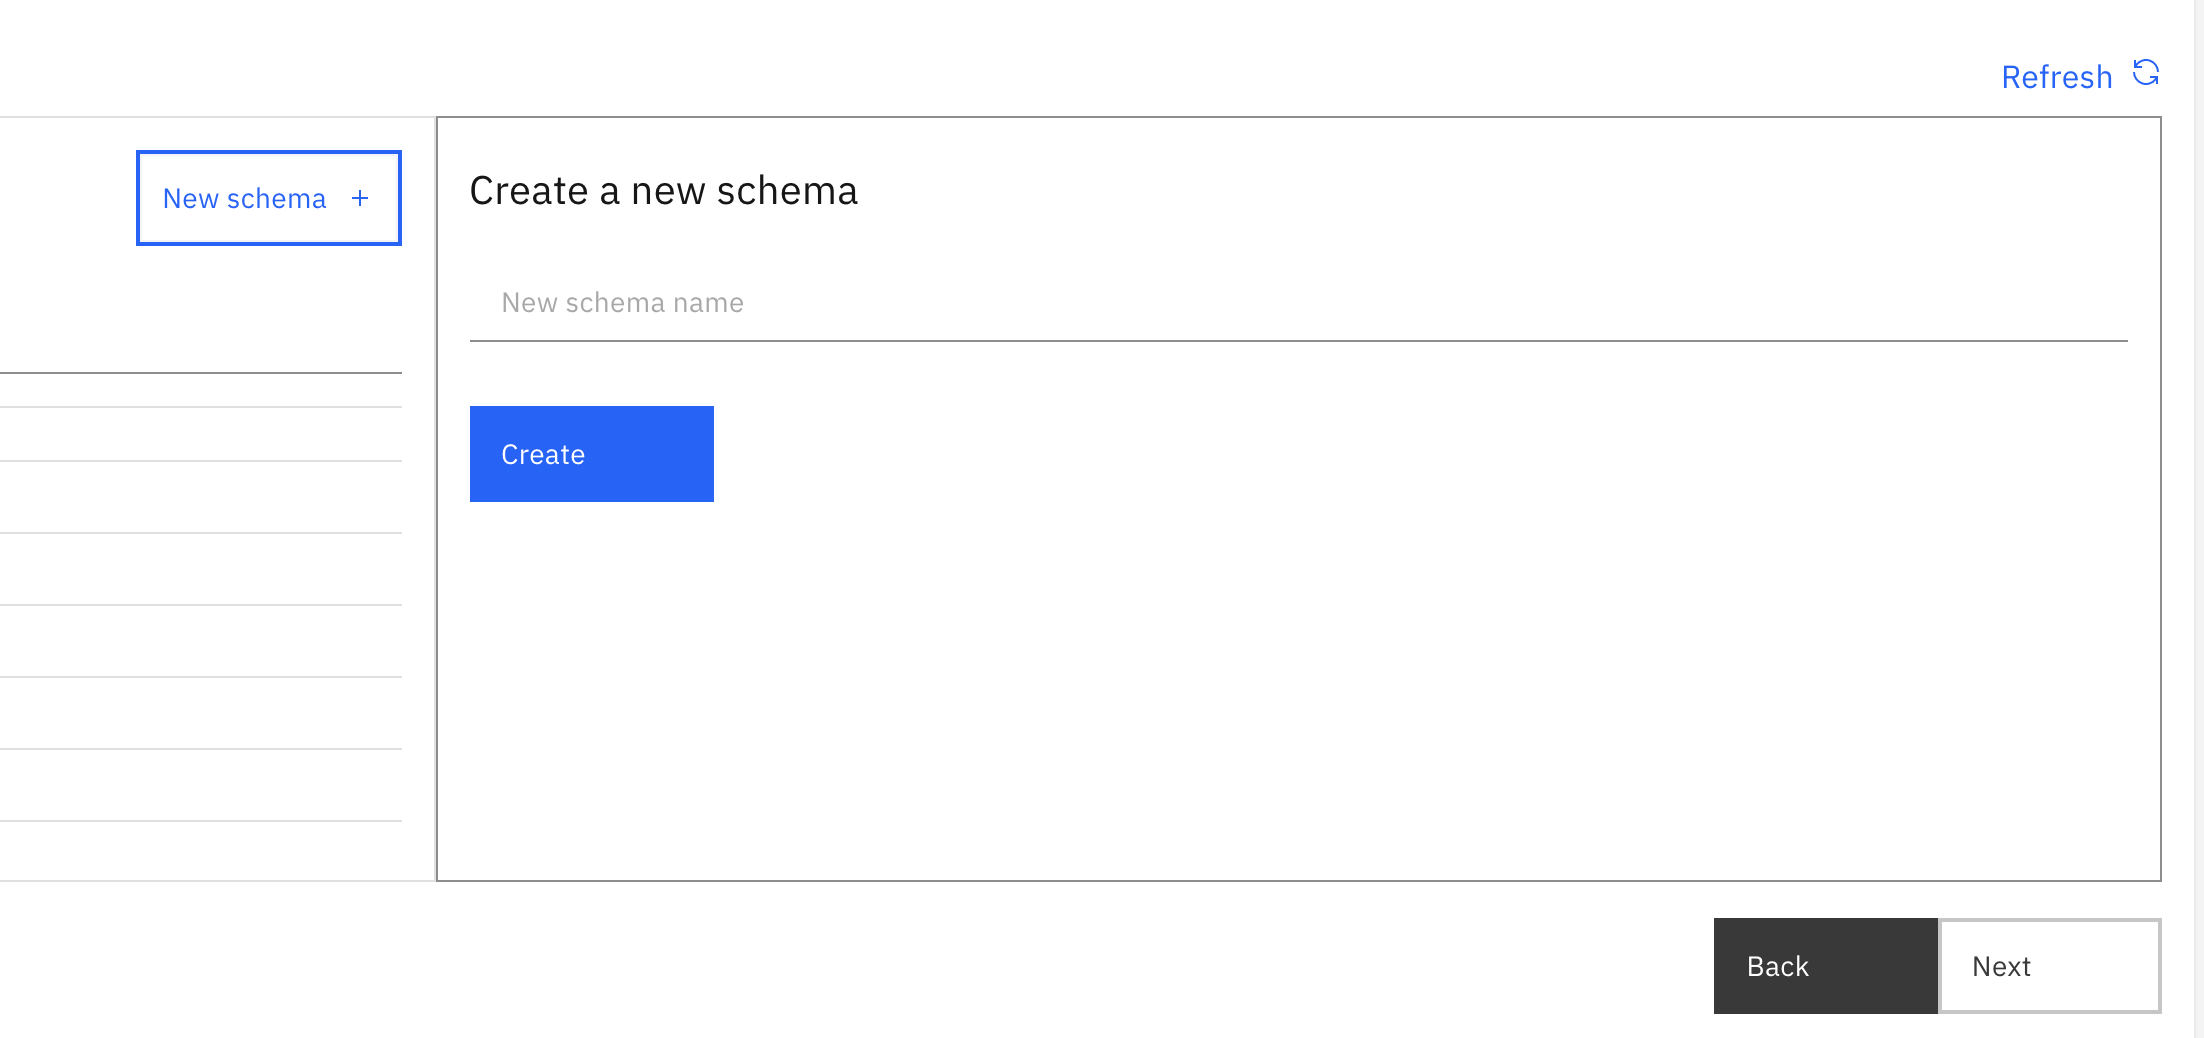

Type in your user id (in the example shown user3 is used, but you have to replace this with your own user id), and press "create":
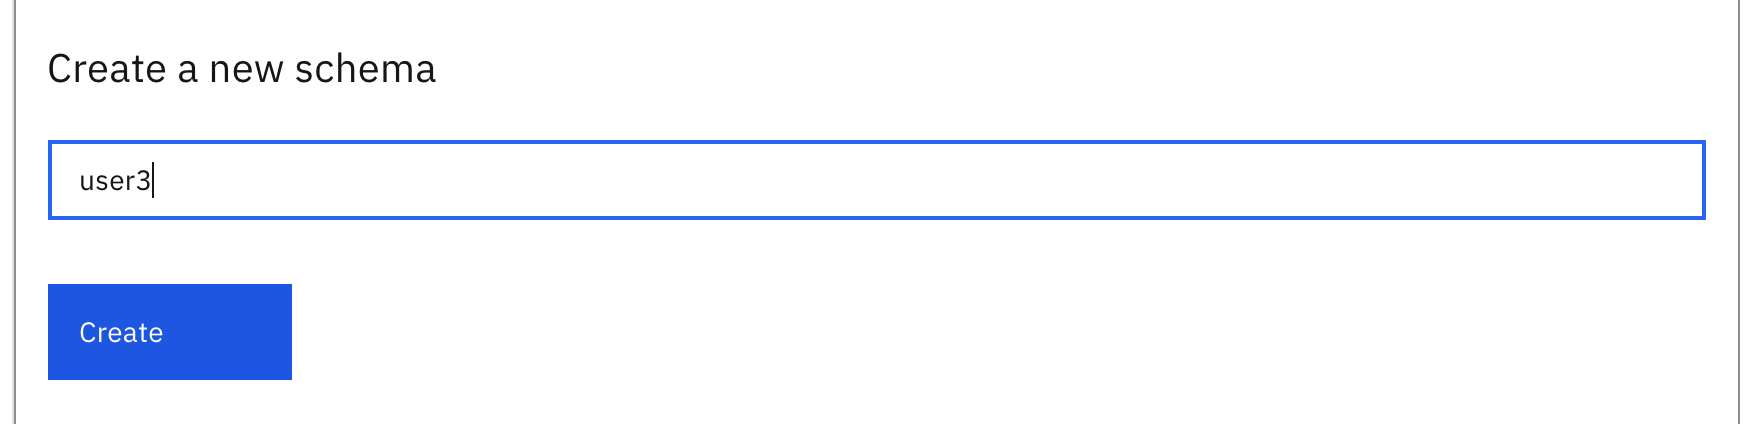

Now you are shown the same screen as above when a schema named like your user id already existed:
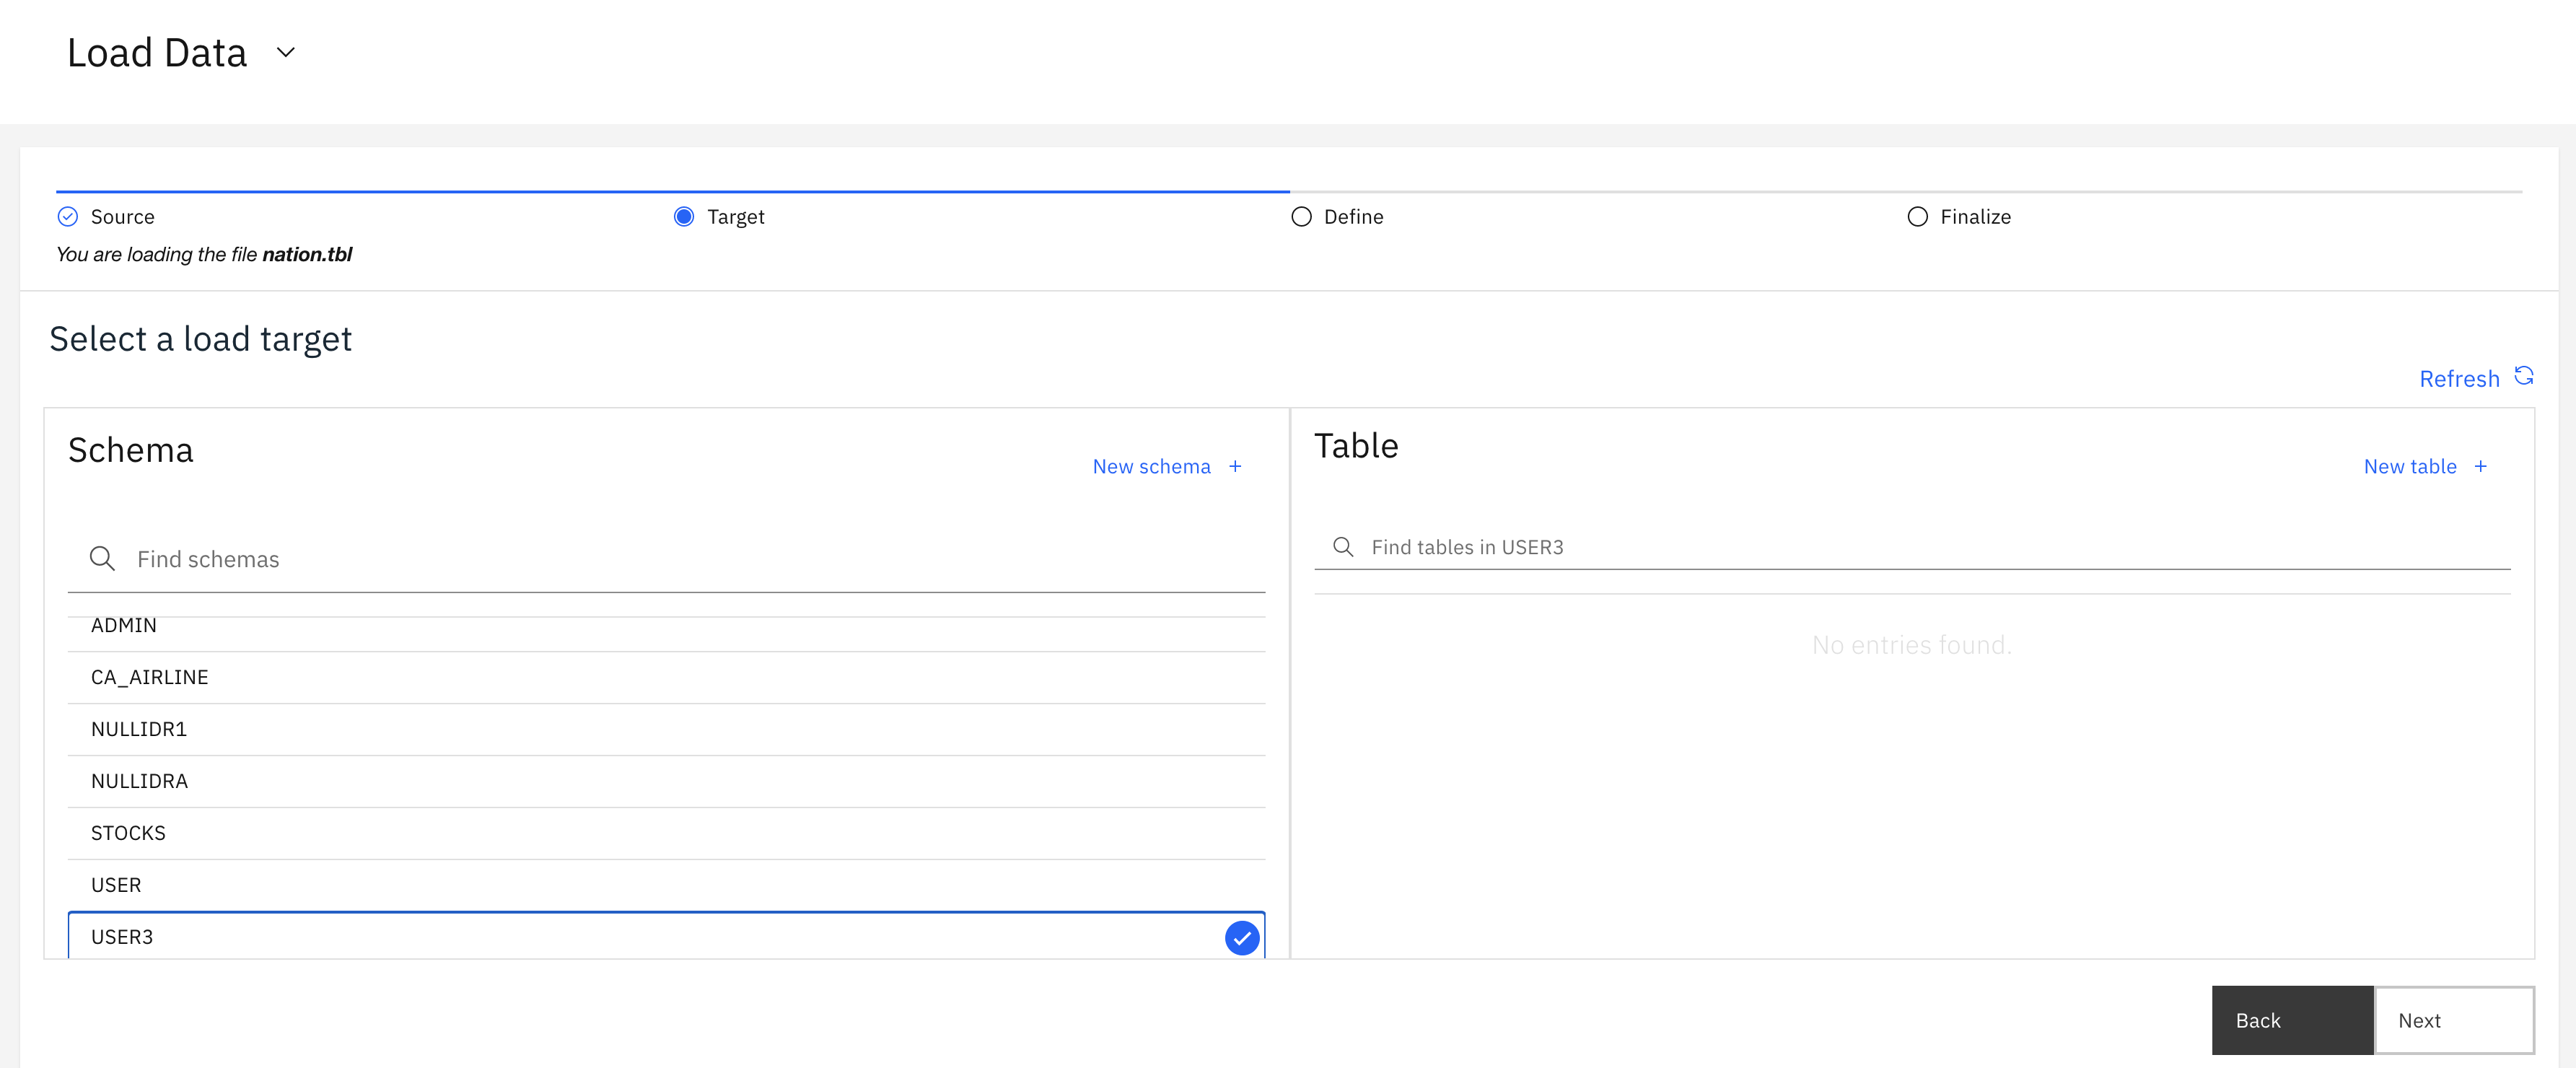

Click on "New table +"
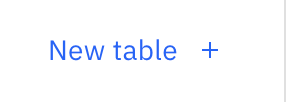

Now you can create the target table:
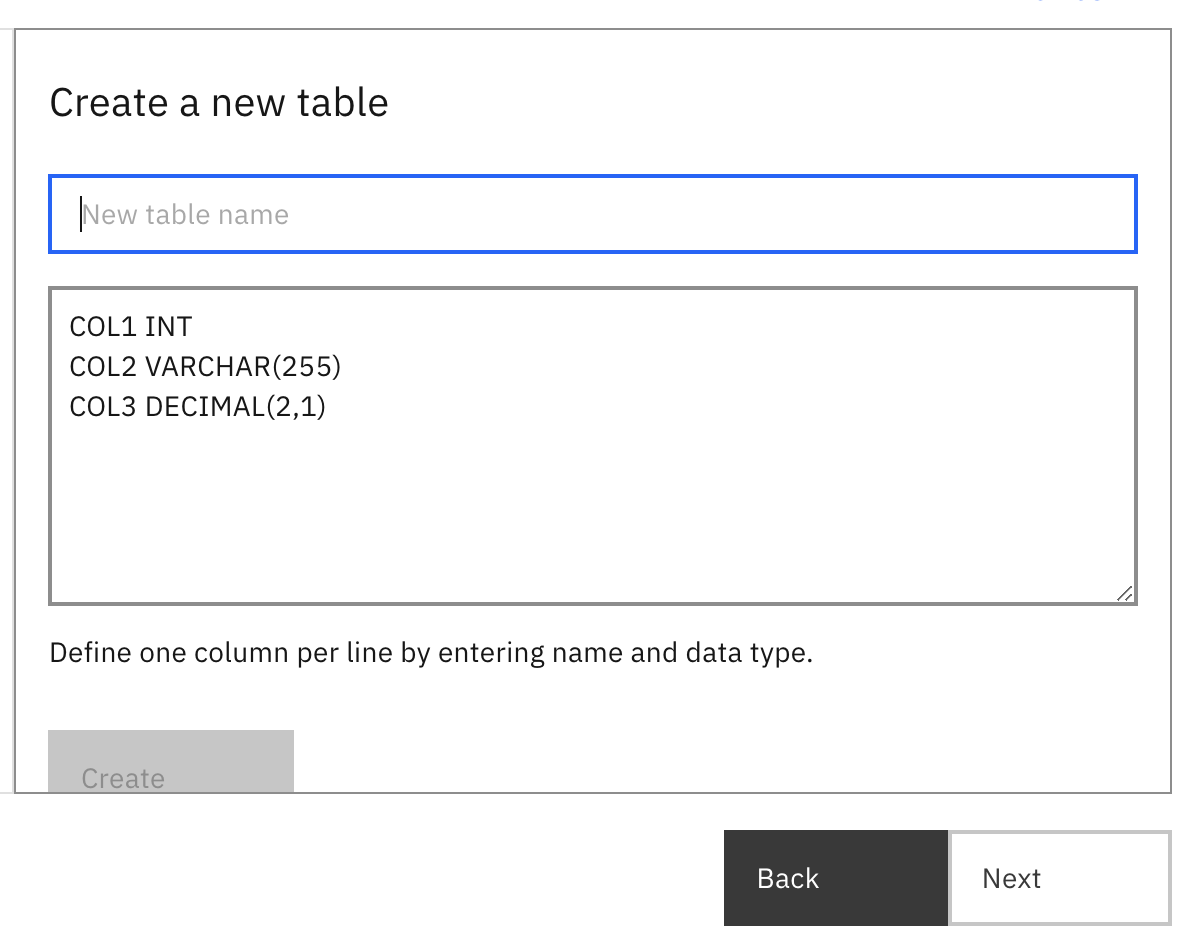

Enter "nation" as name of the table. 

You see that there are already suggestions for the column names ("col1", "col2", "col3") and for the column types. 

Change these in the following way (you can perform this by copy & paste):

N_NATIONKEY  INTEGER

N_NAME       CHAR(25)

N_REGIONKEY  INTEGER

N_COMMENT    VARCHAR(152)
                            
Press create.

Now you can create the target table:
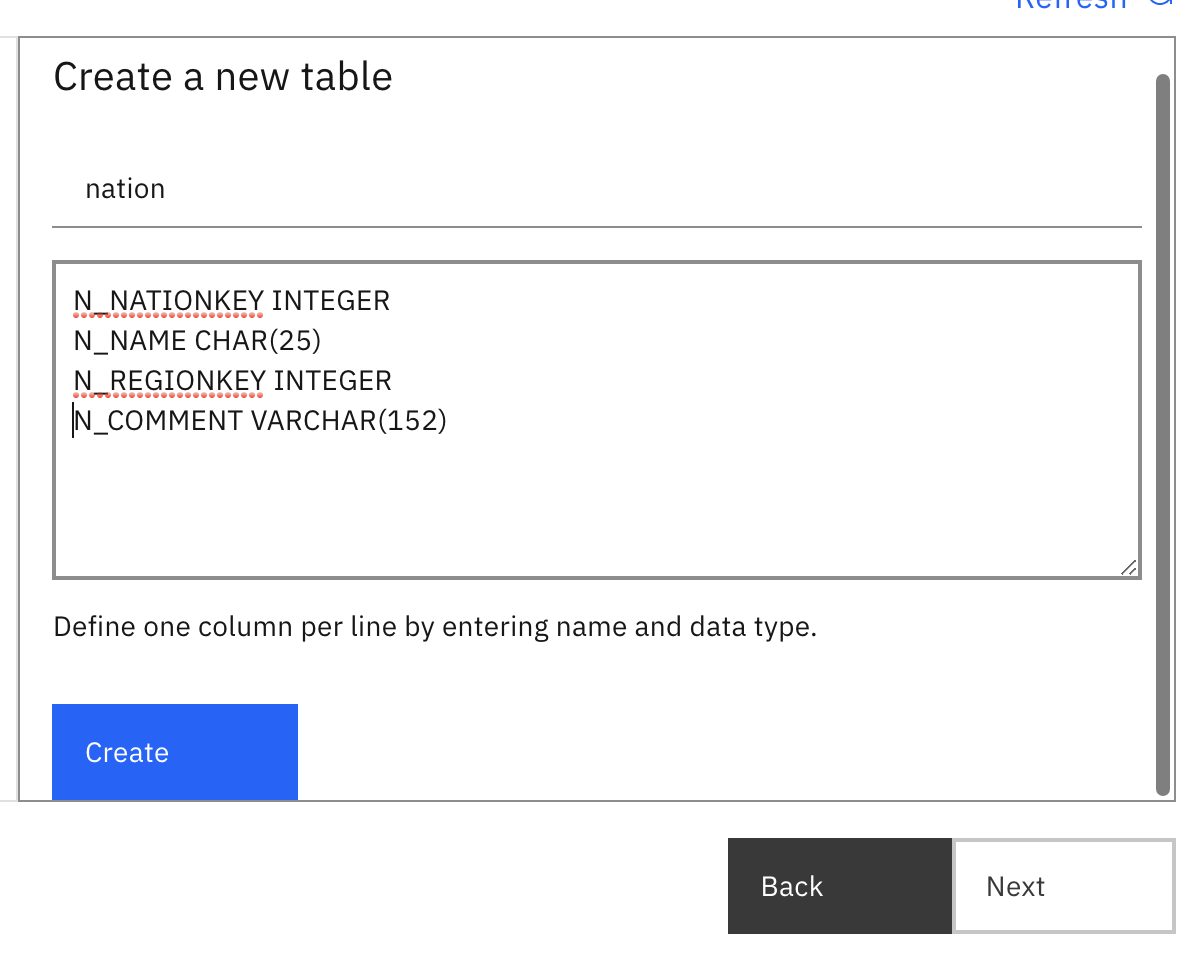

You get this screen. Press "next":
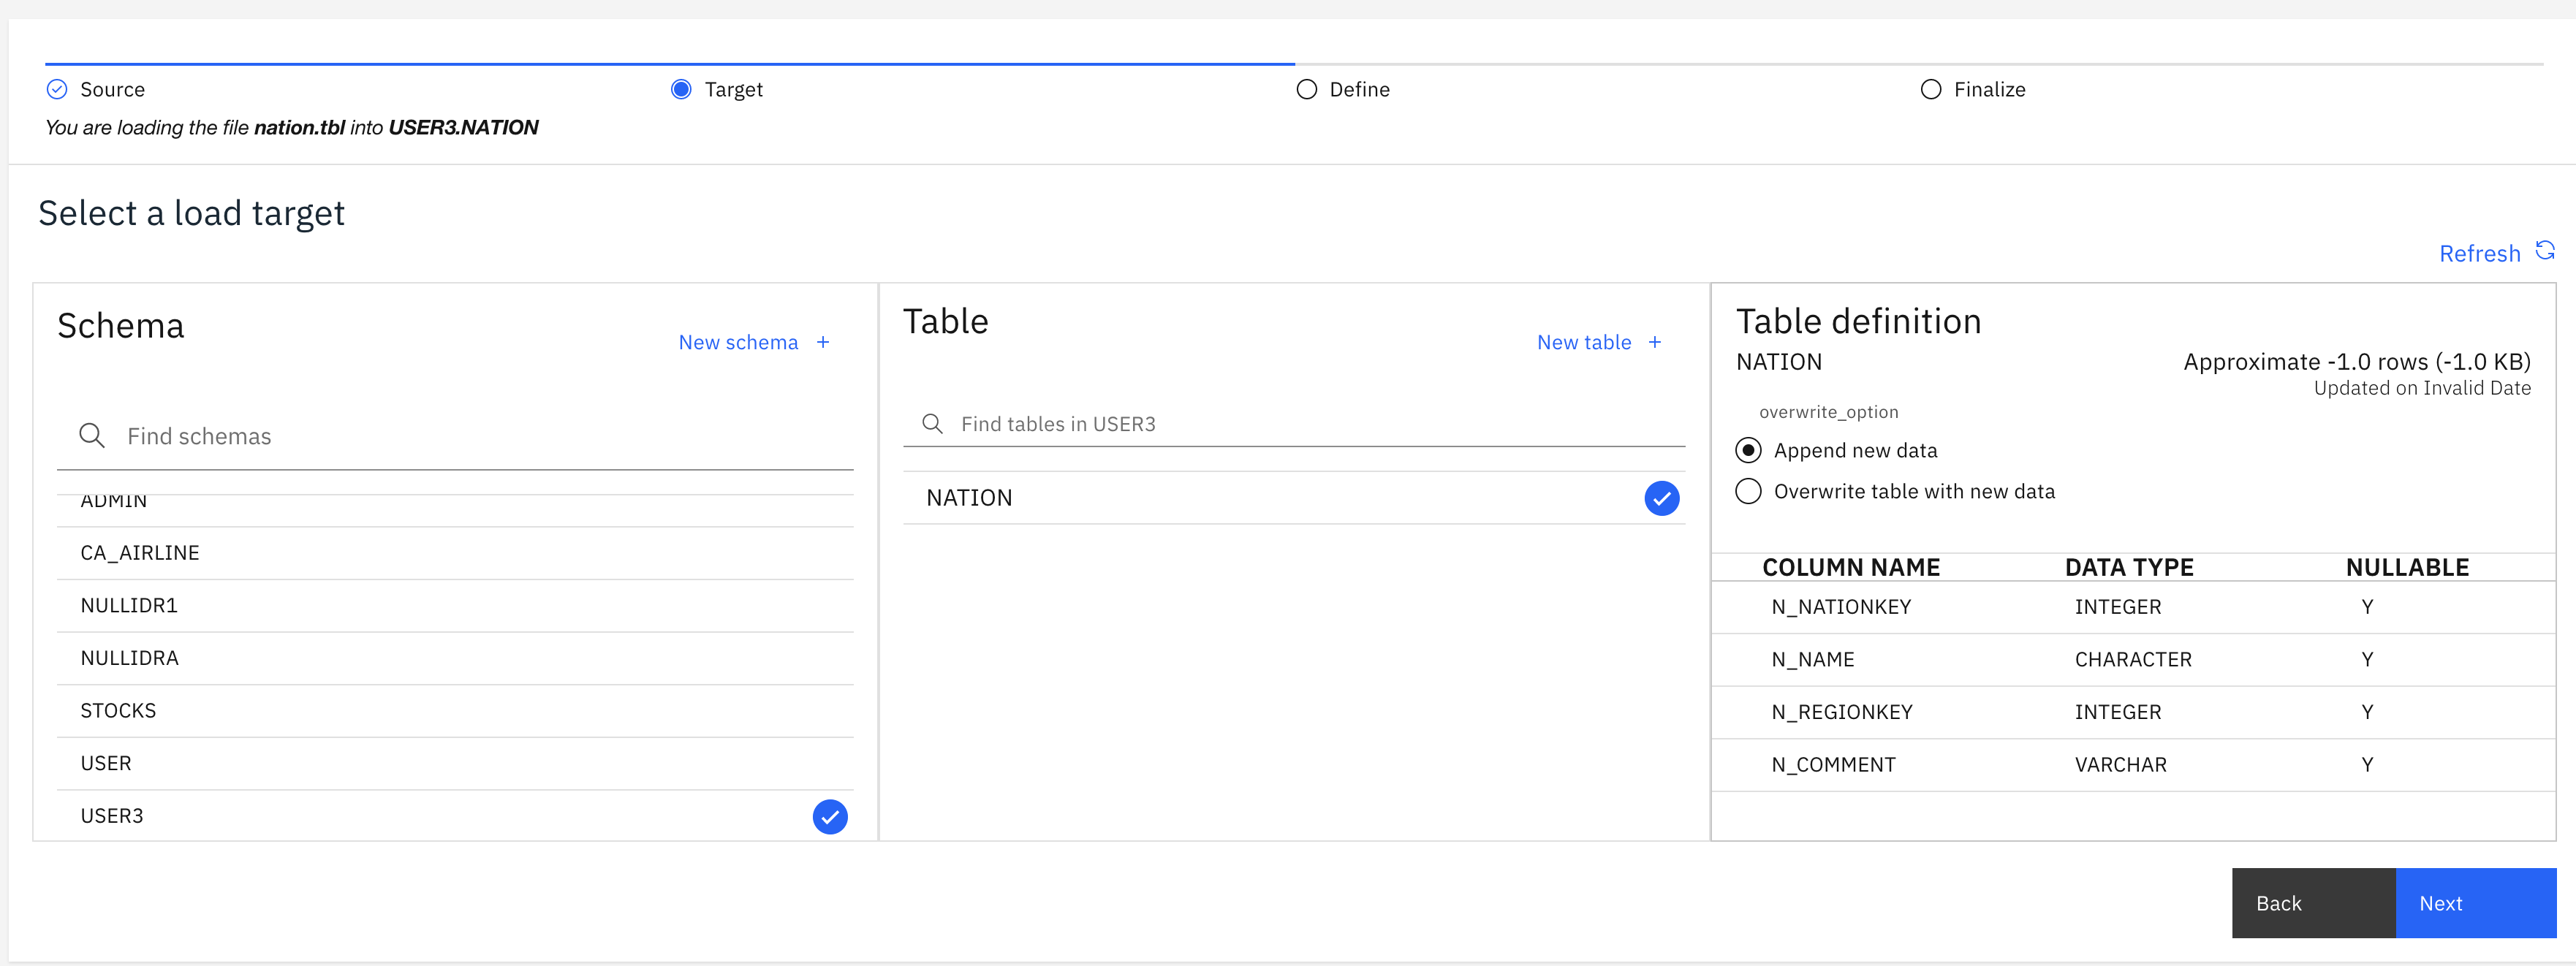

You get the following screen:
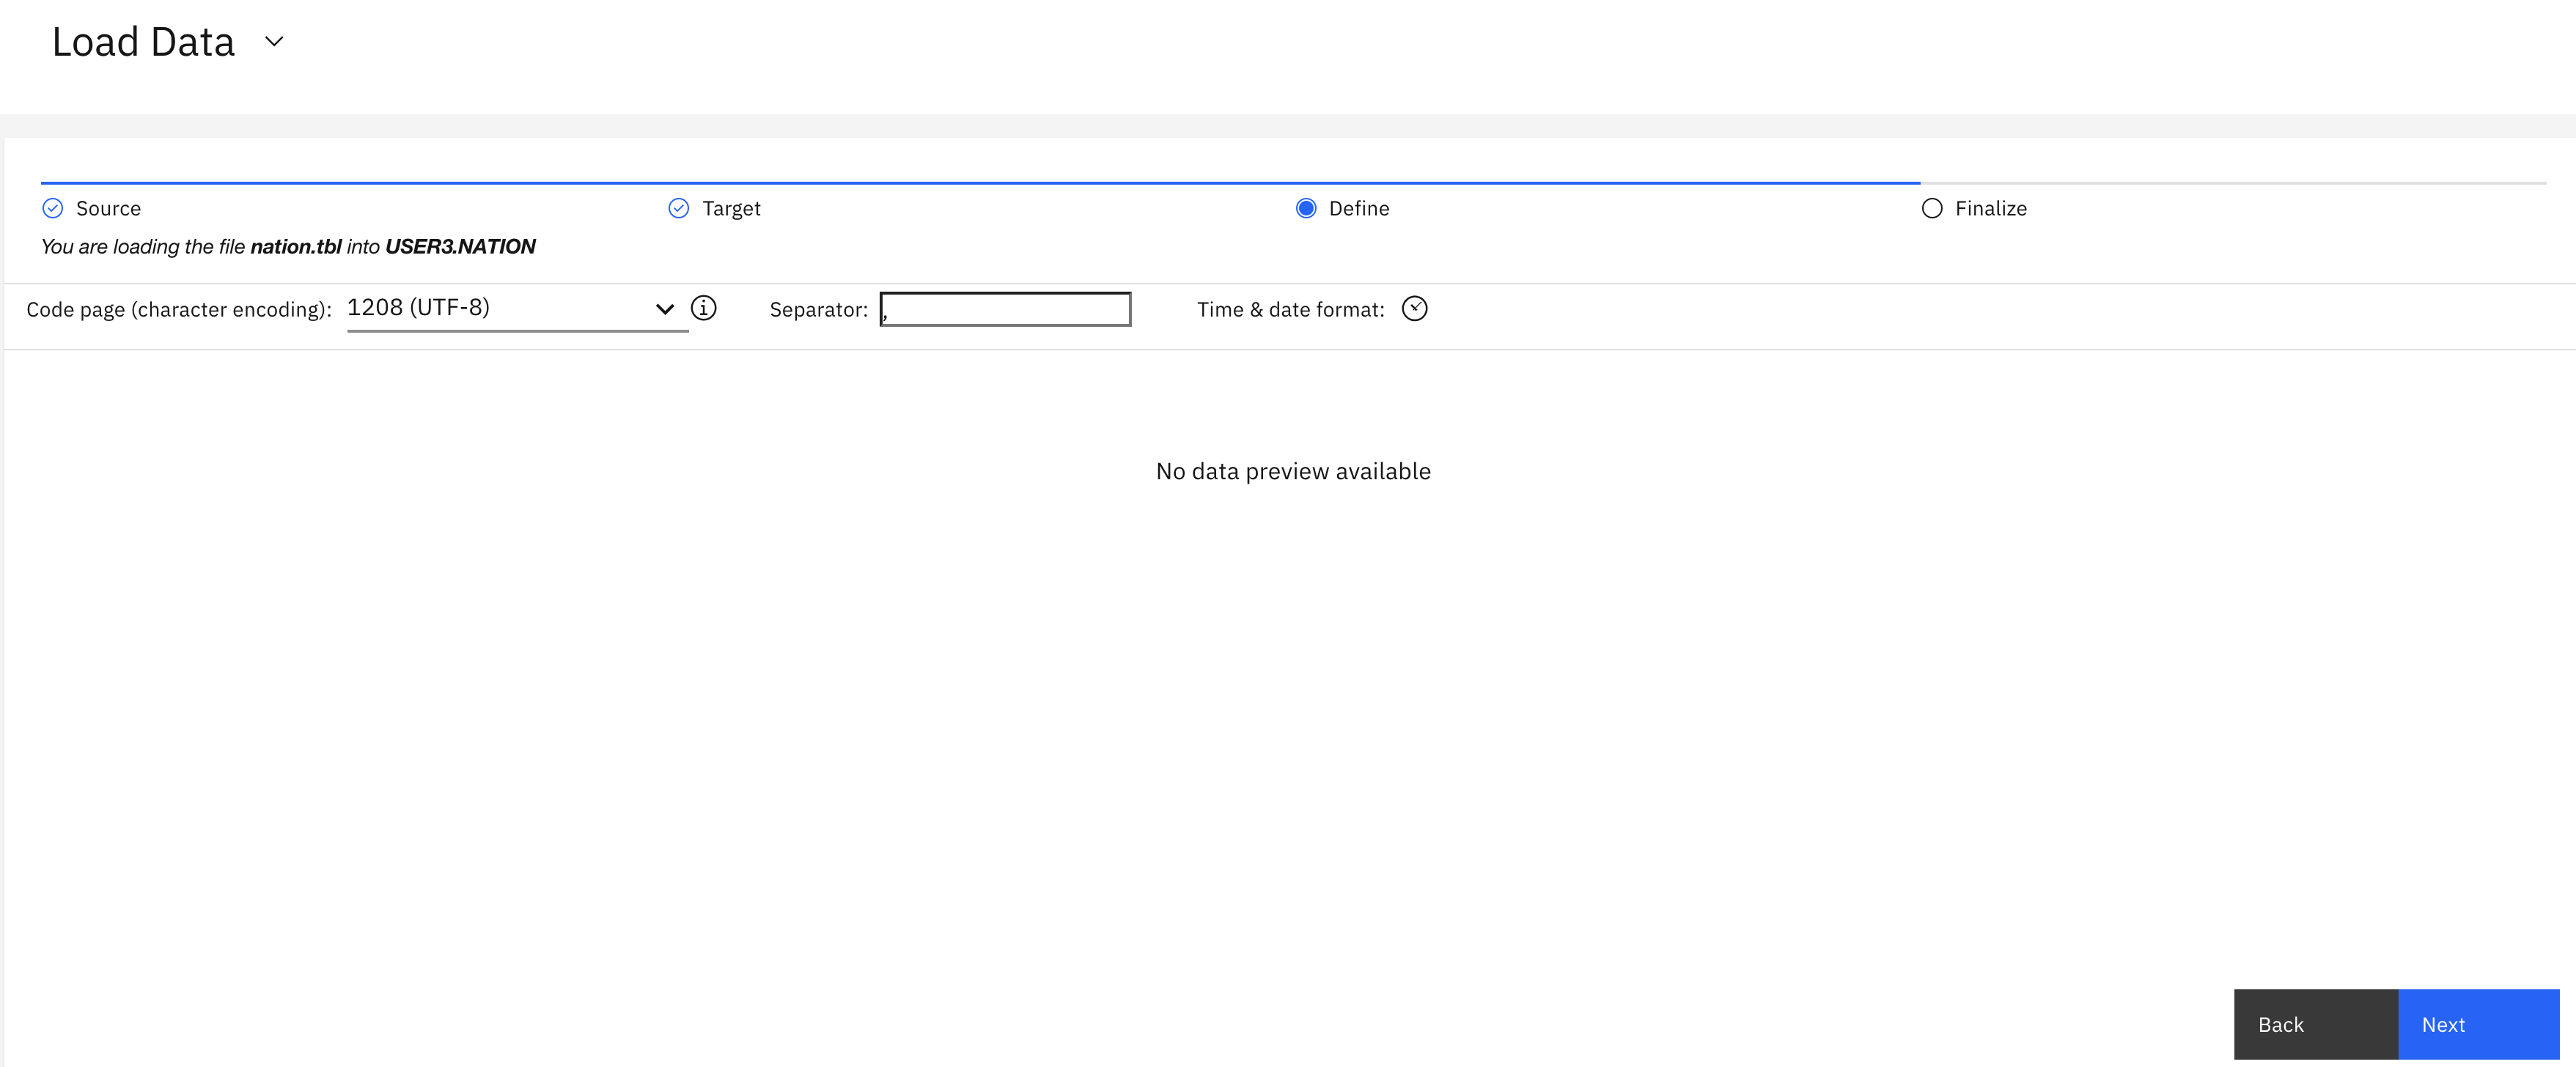

Change the delimiter to the pipe symbol ("|") and press next:
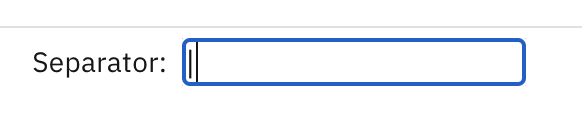

On the next screen you get a summary of all your settings for the load. You can check whether everything is correct. If something is wrong, click "back" and correct it. If the parameters are OK, click "Begin Load":
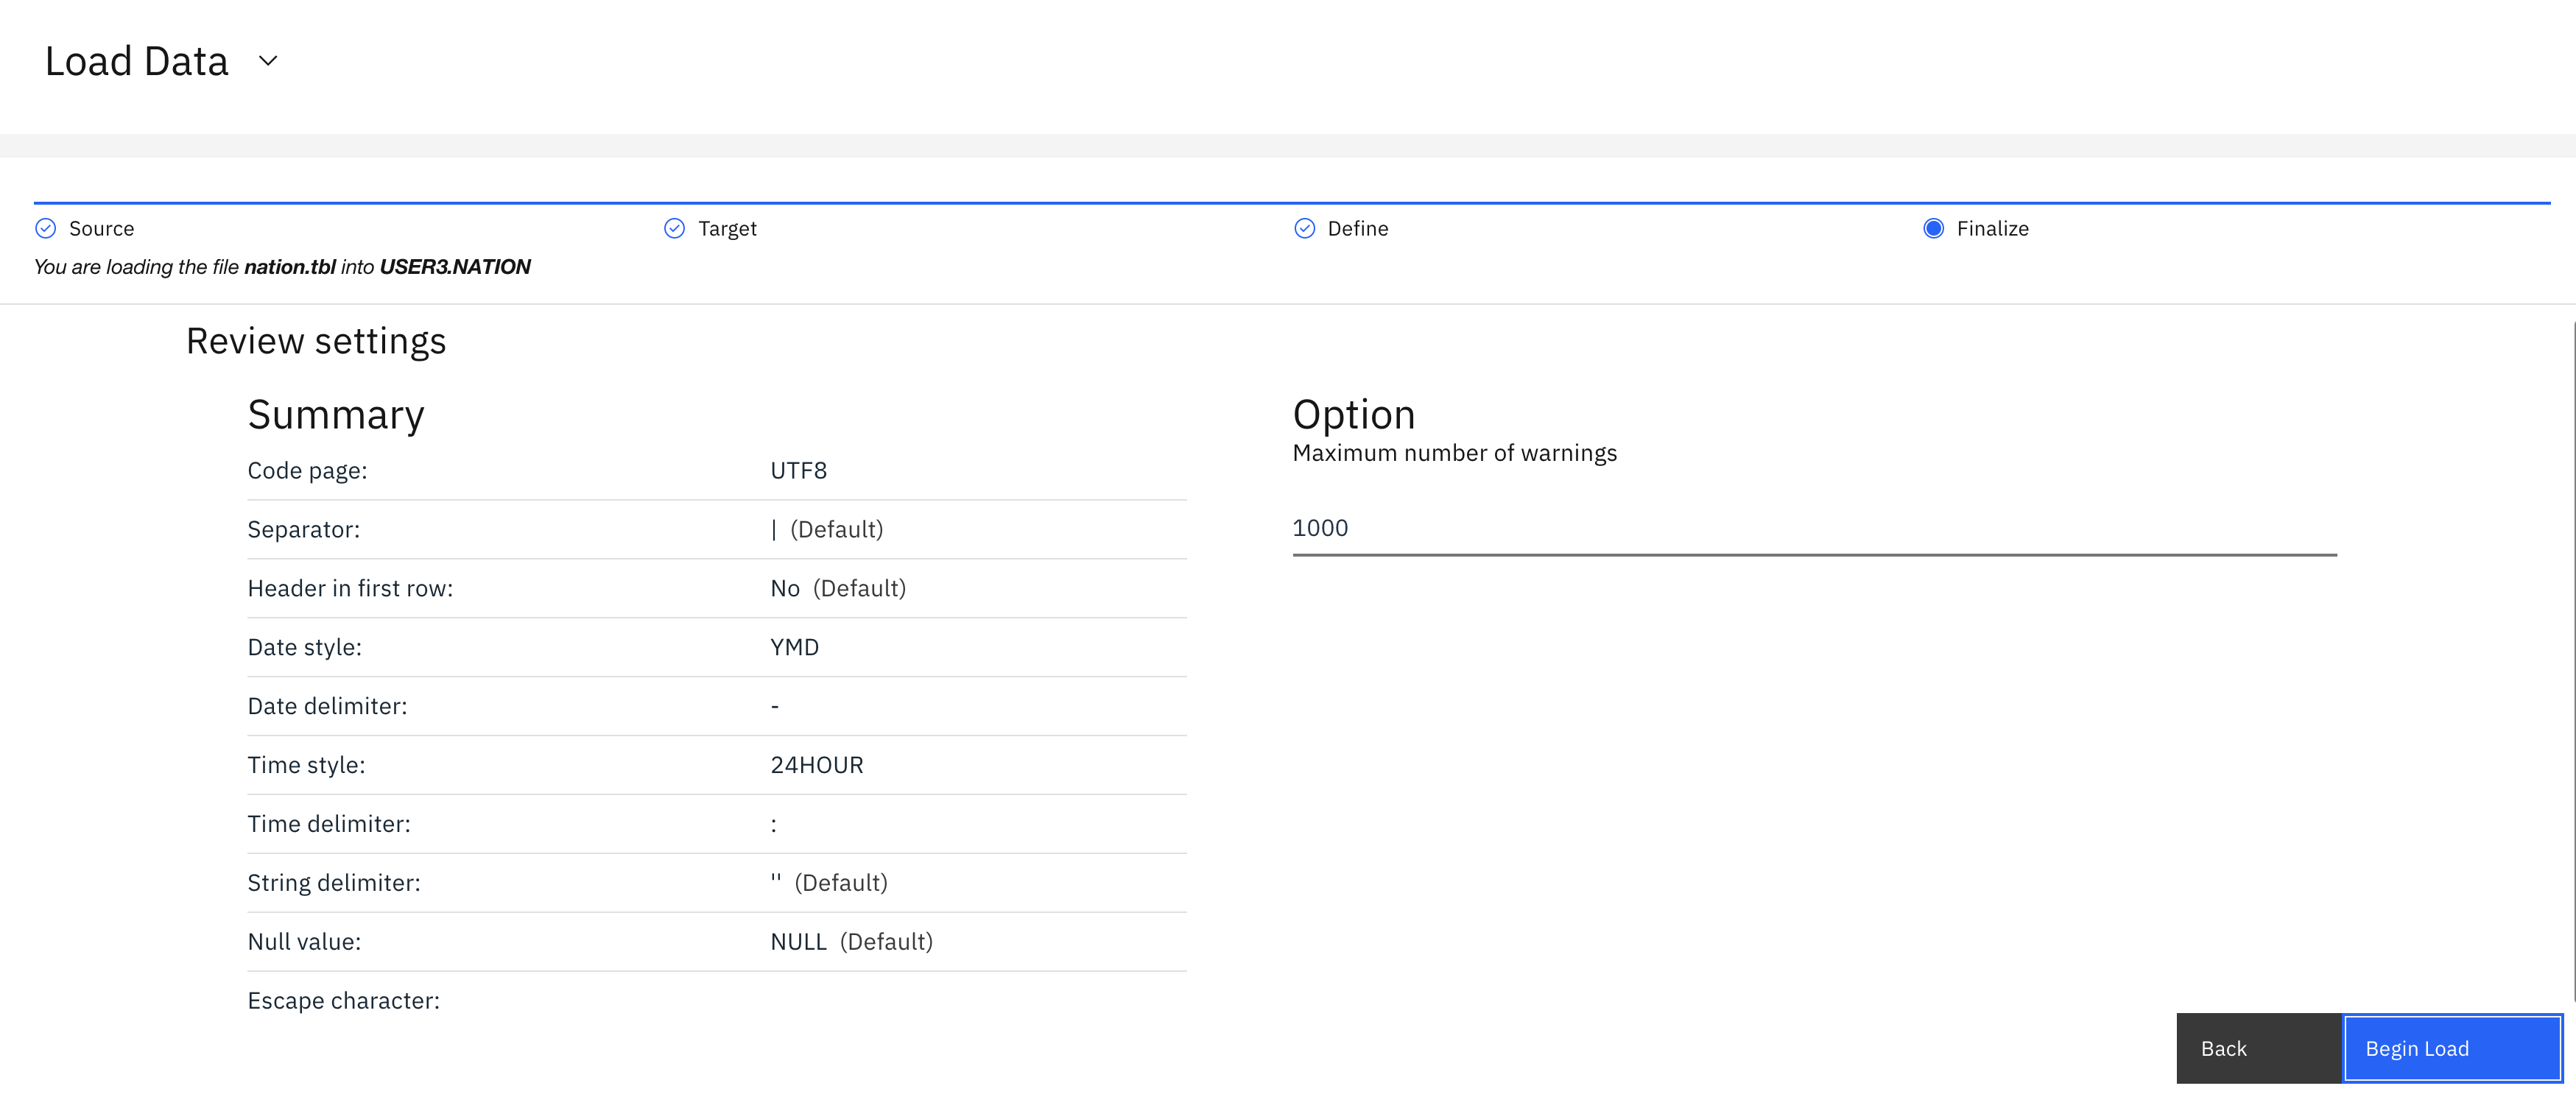

After the successful loading of your data you should see this screen:
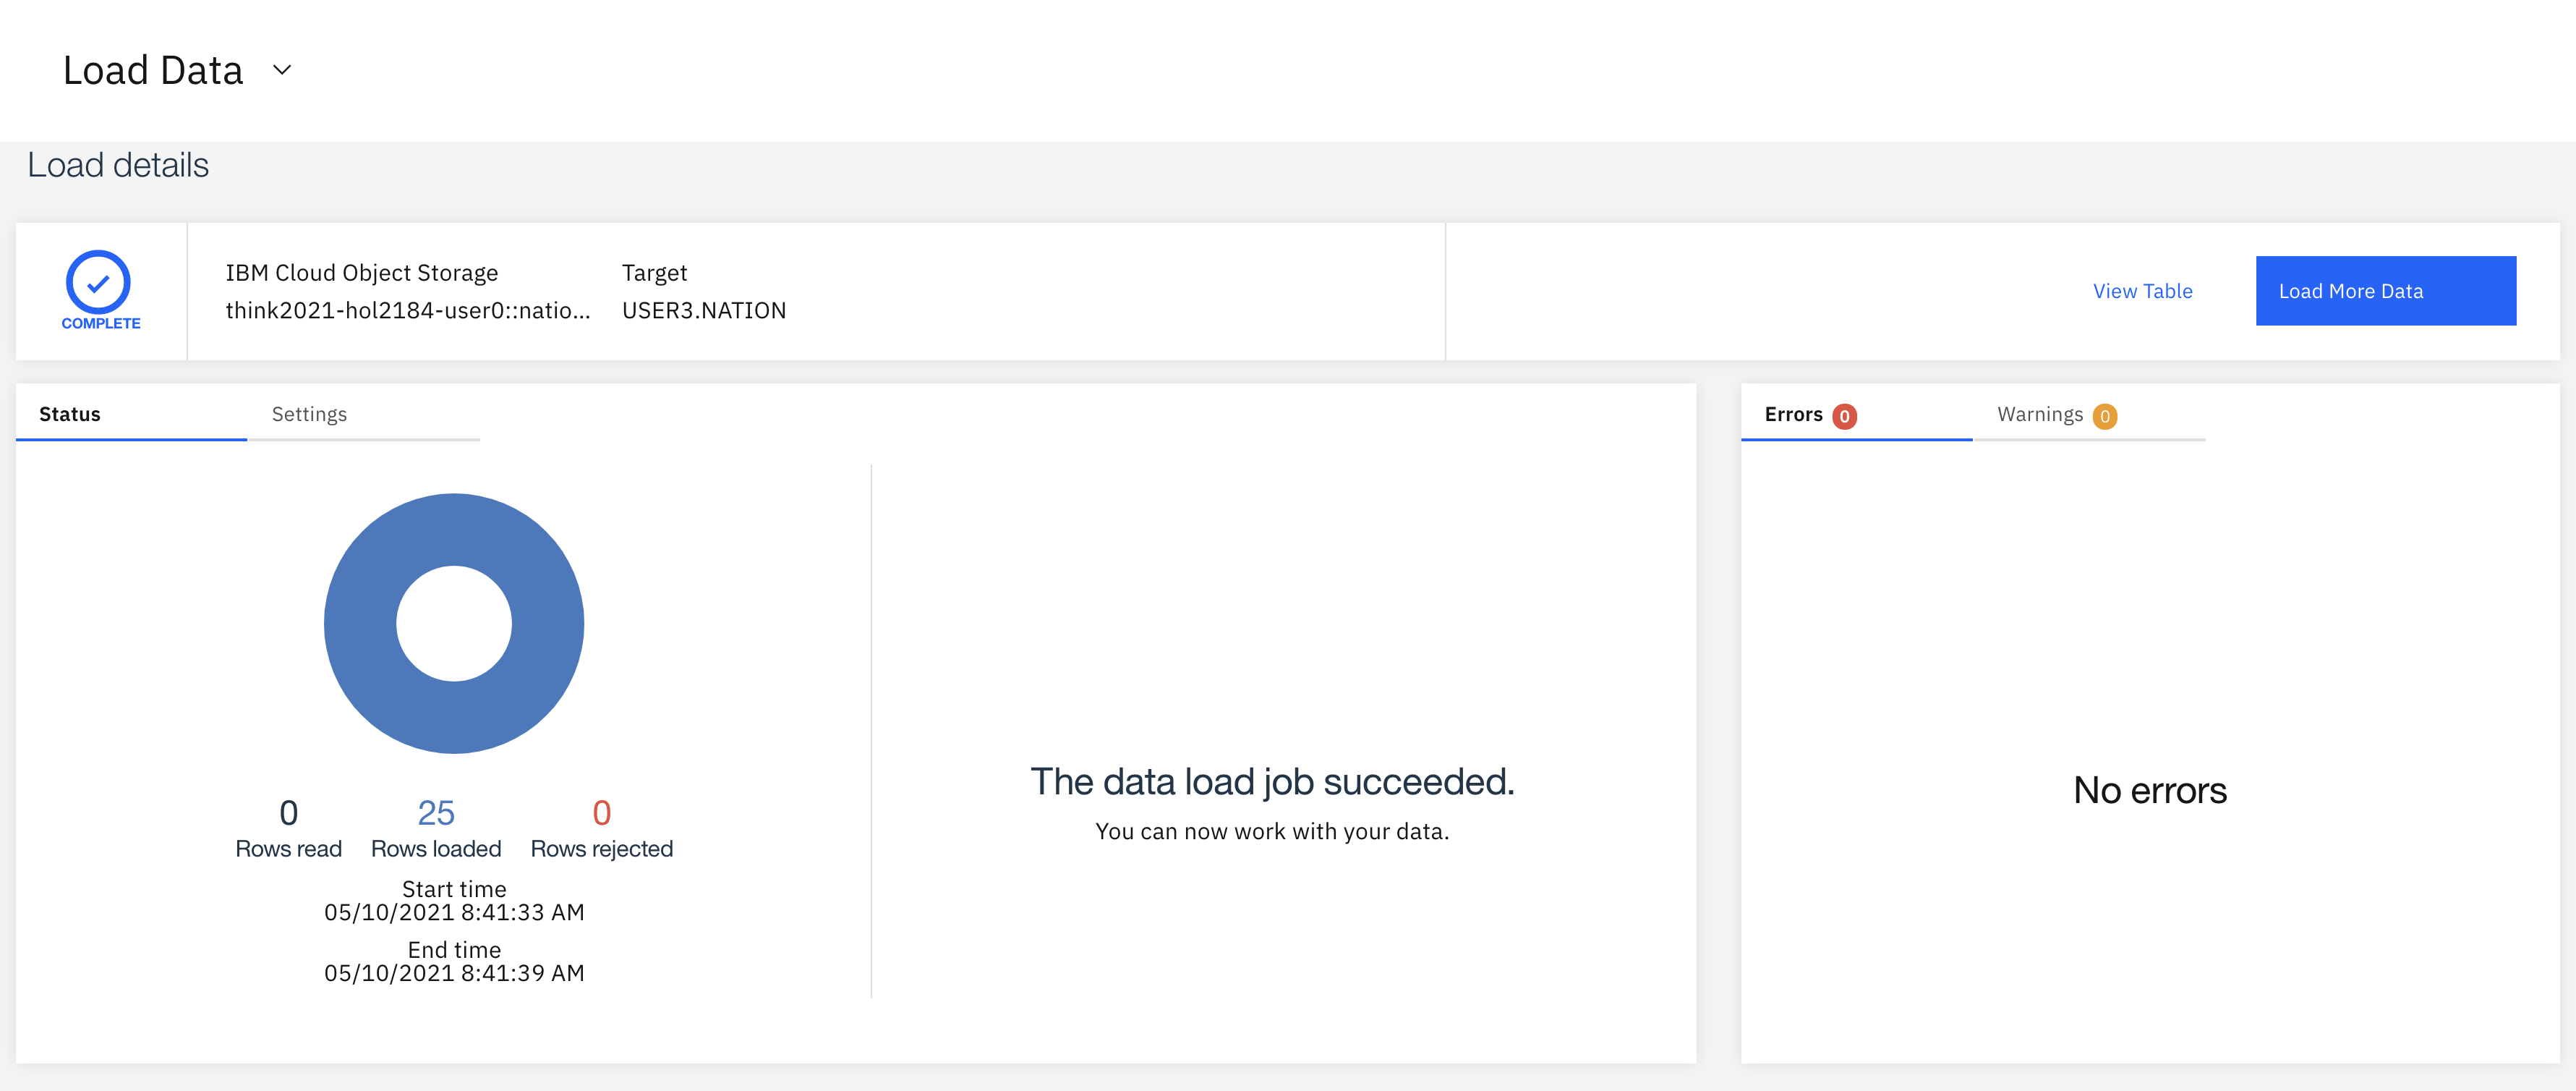

You may click on "View" to check whether your data was loaded correctly:
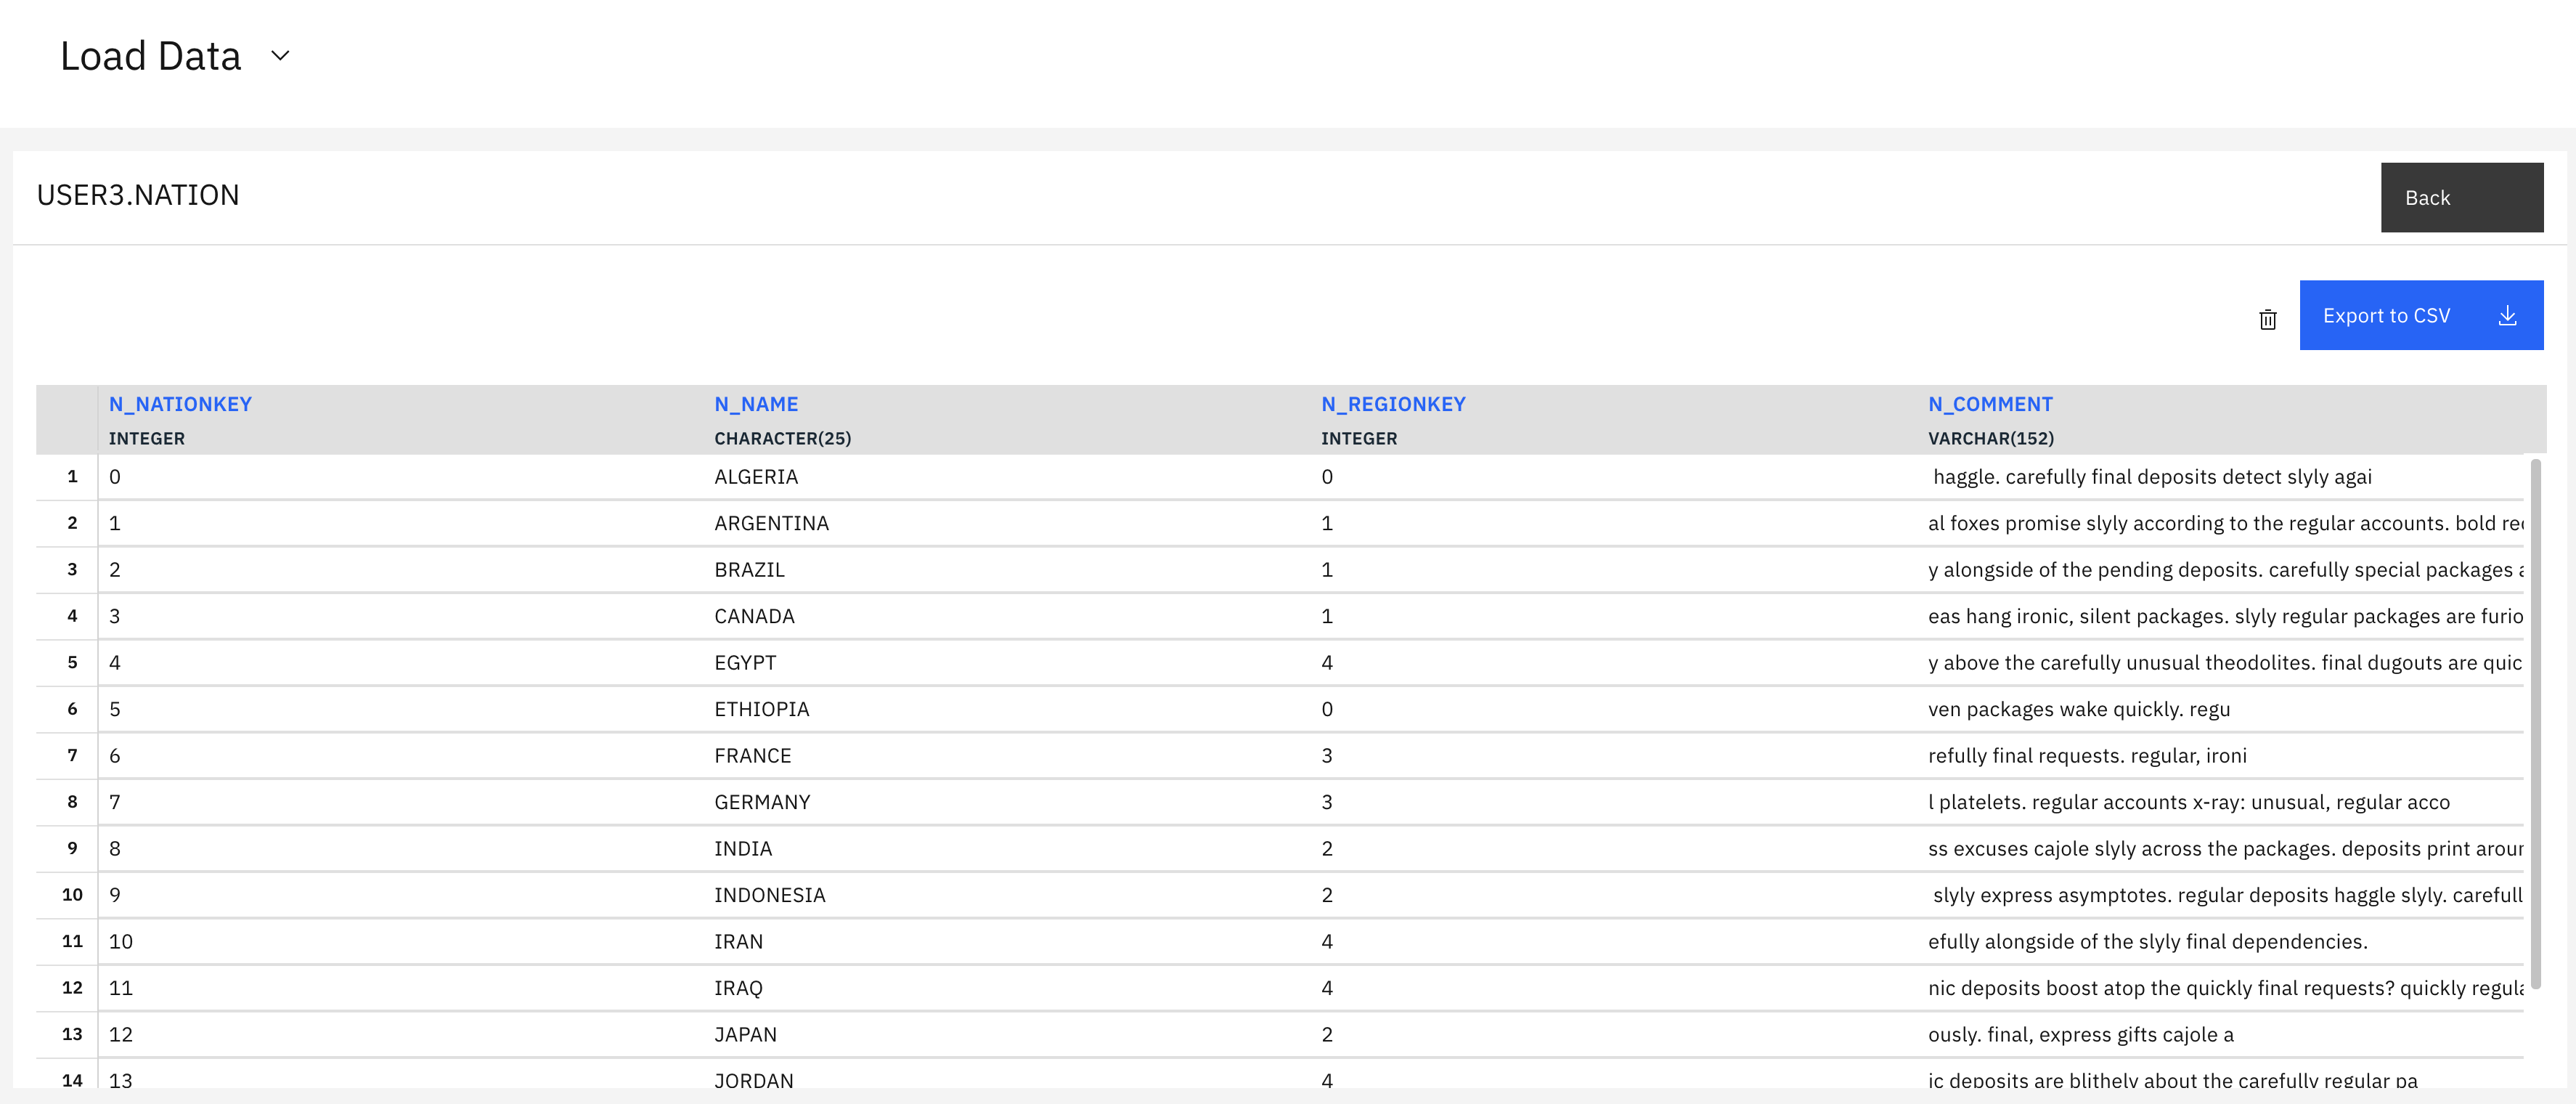

# 

# Access data from COS via the SQL GUI of Db2 Warehouse

We will access the GUI of Db2 Warehouse in the same way as before, but instead of using the LOAD GUI, 
we will use the SQL Editor to create external tables for the data on COS in the Public Cloud  be able to query these data directly.
The purpose of this cell is to describe what you have to do to achieve this. The first steps will be the same as before:

Select the "hamburger" menu in the upper right corner of your screen, and 

select "Databases" and open it in a new tab:
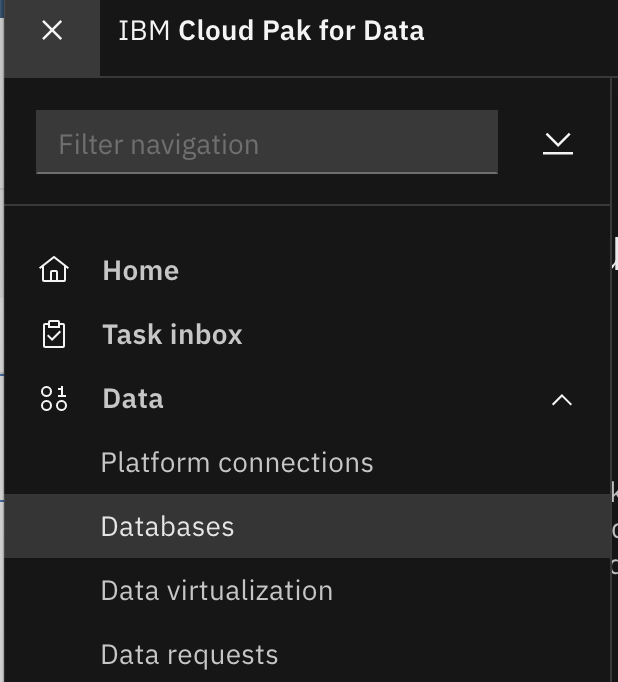

Click on the three vertically aranged dots in the upper right corner of the Db2 Warehouse tile and select "open":
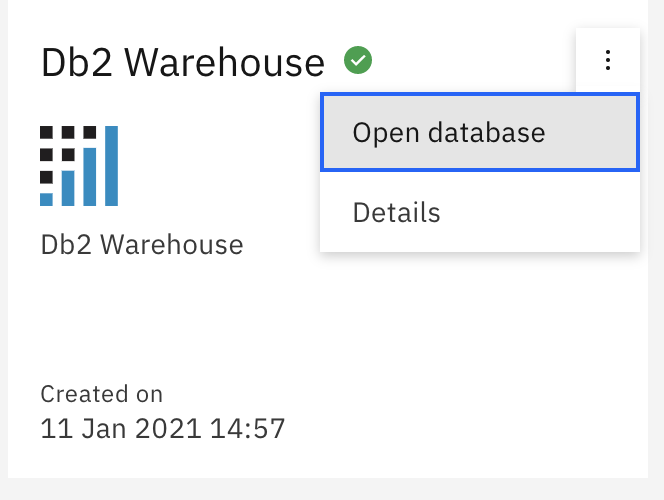

You are presented with the "Summary" screen of this Db2 warehouse instance:
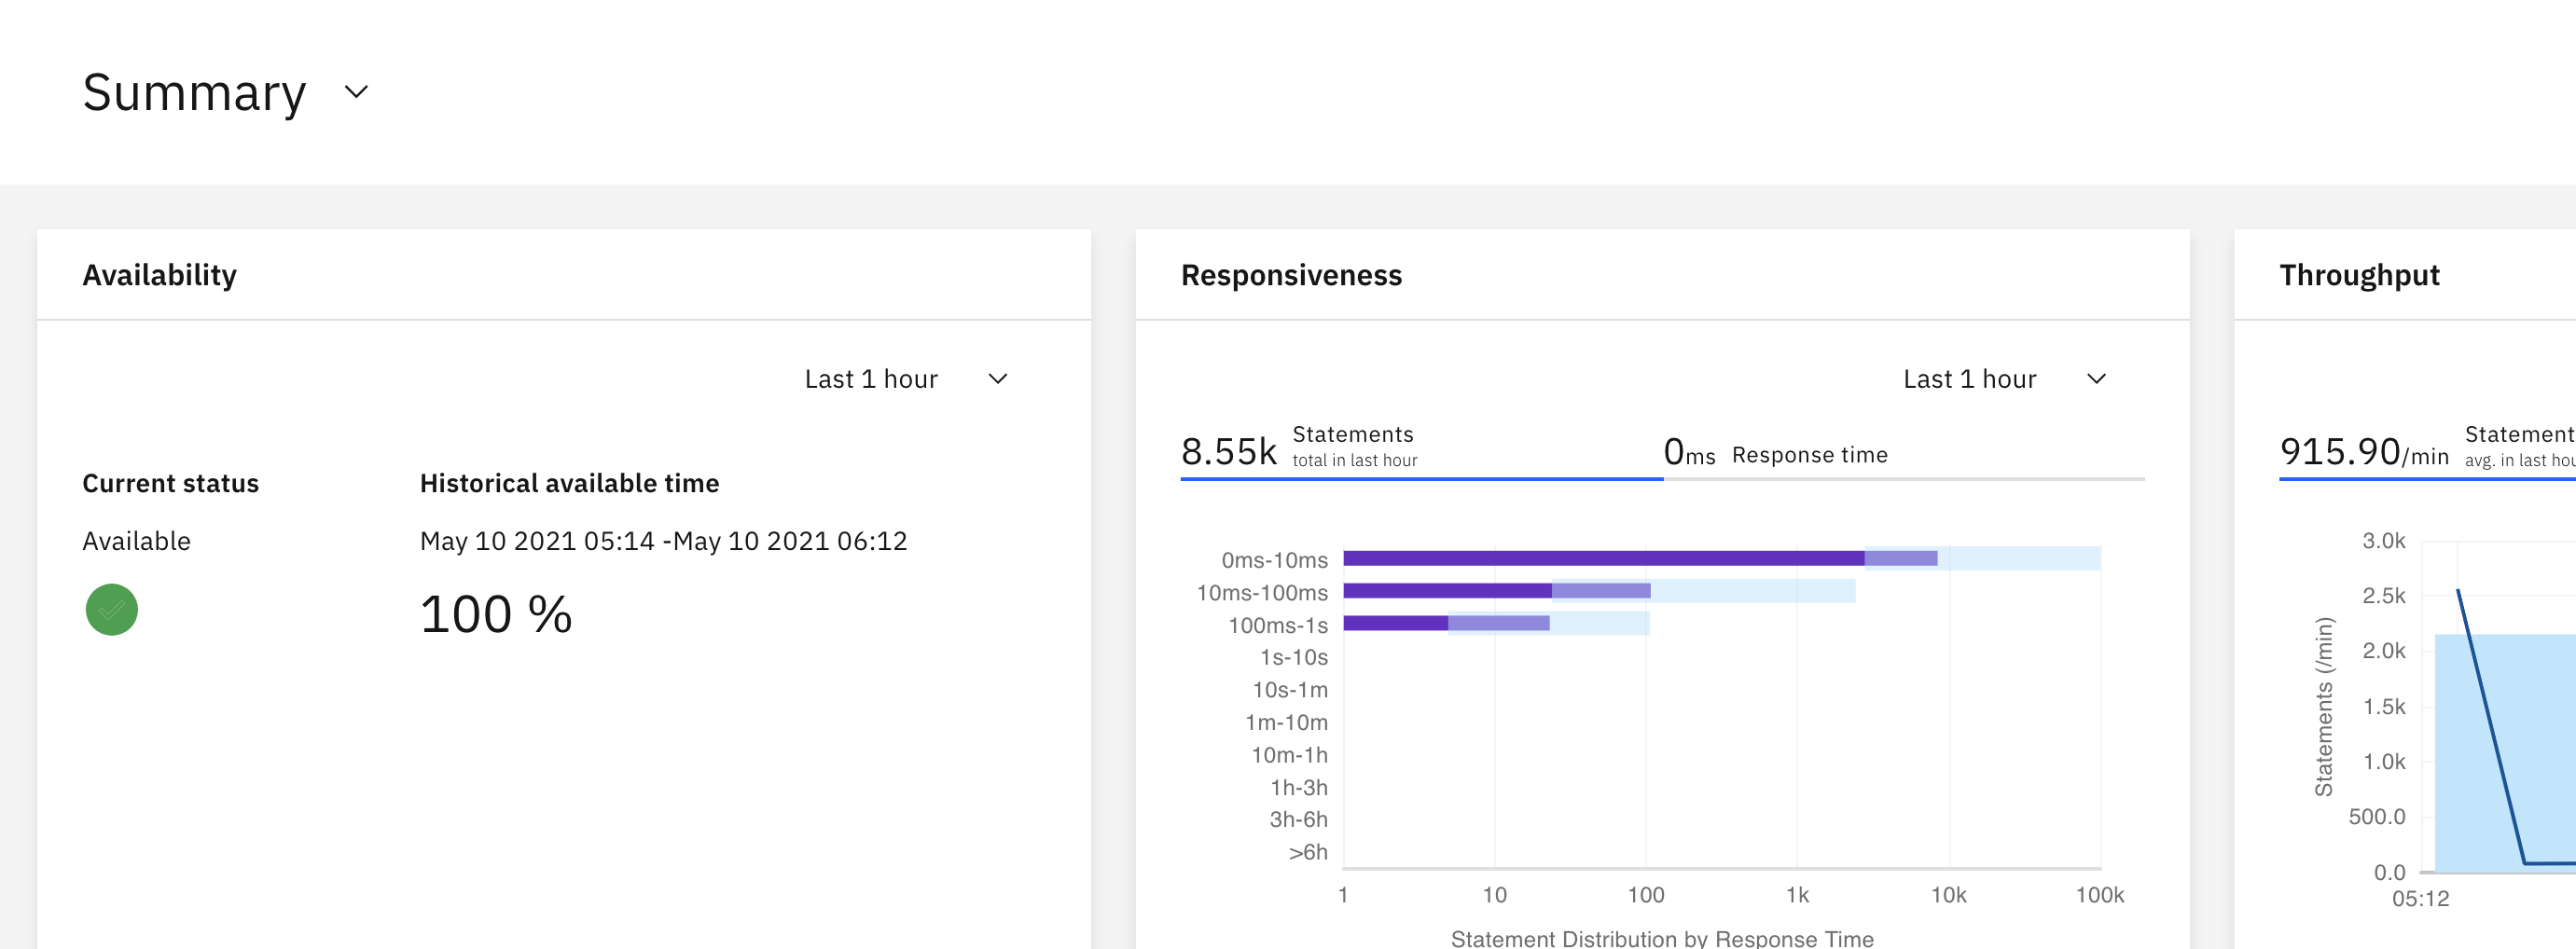

Click on "Summary"

But instead of "Load" as in trhe previous exercise,  we now select "Run SQL":
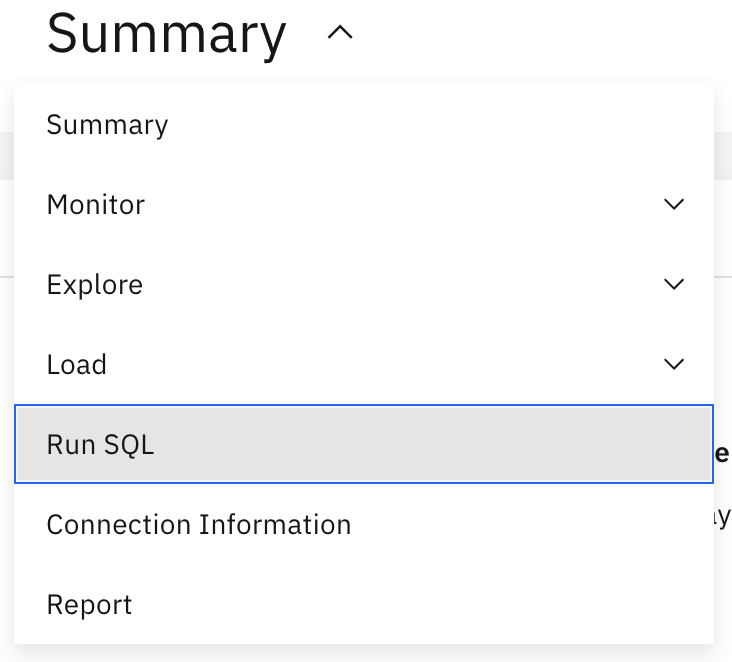 

This screen is shown:
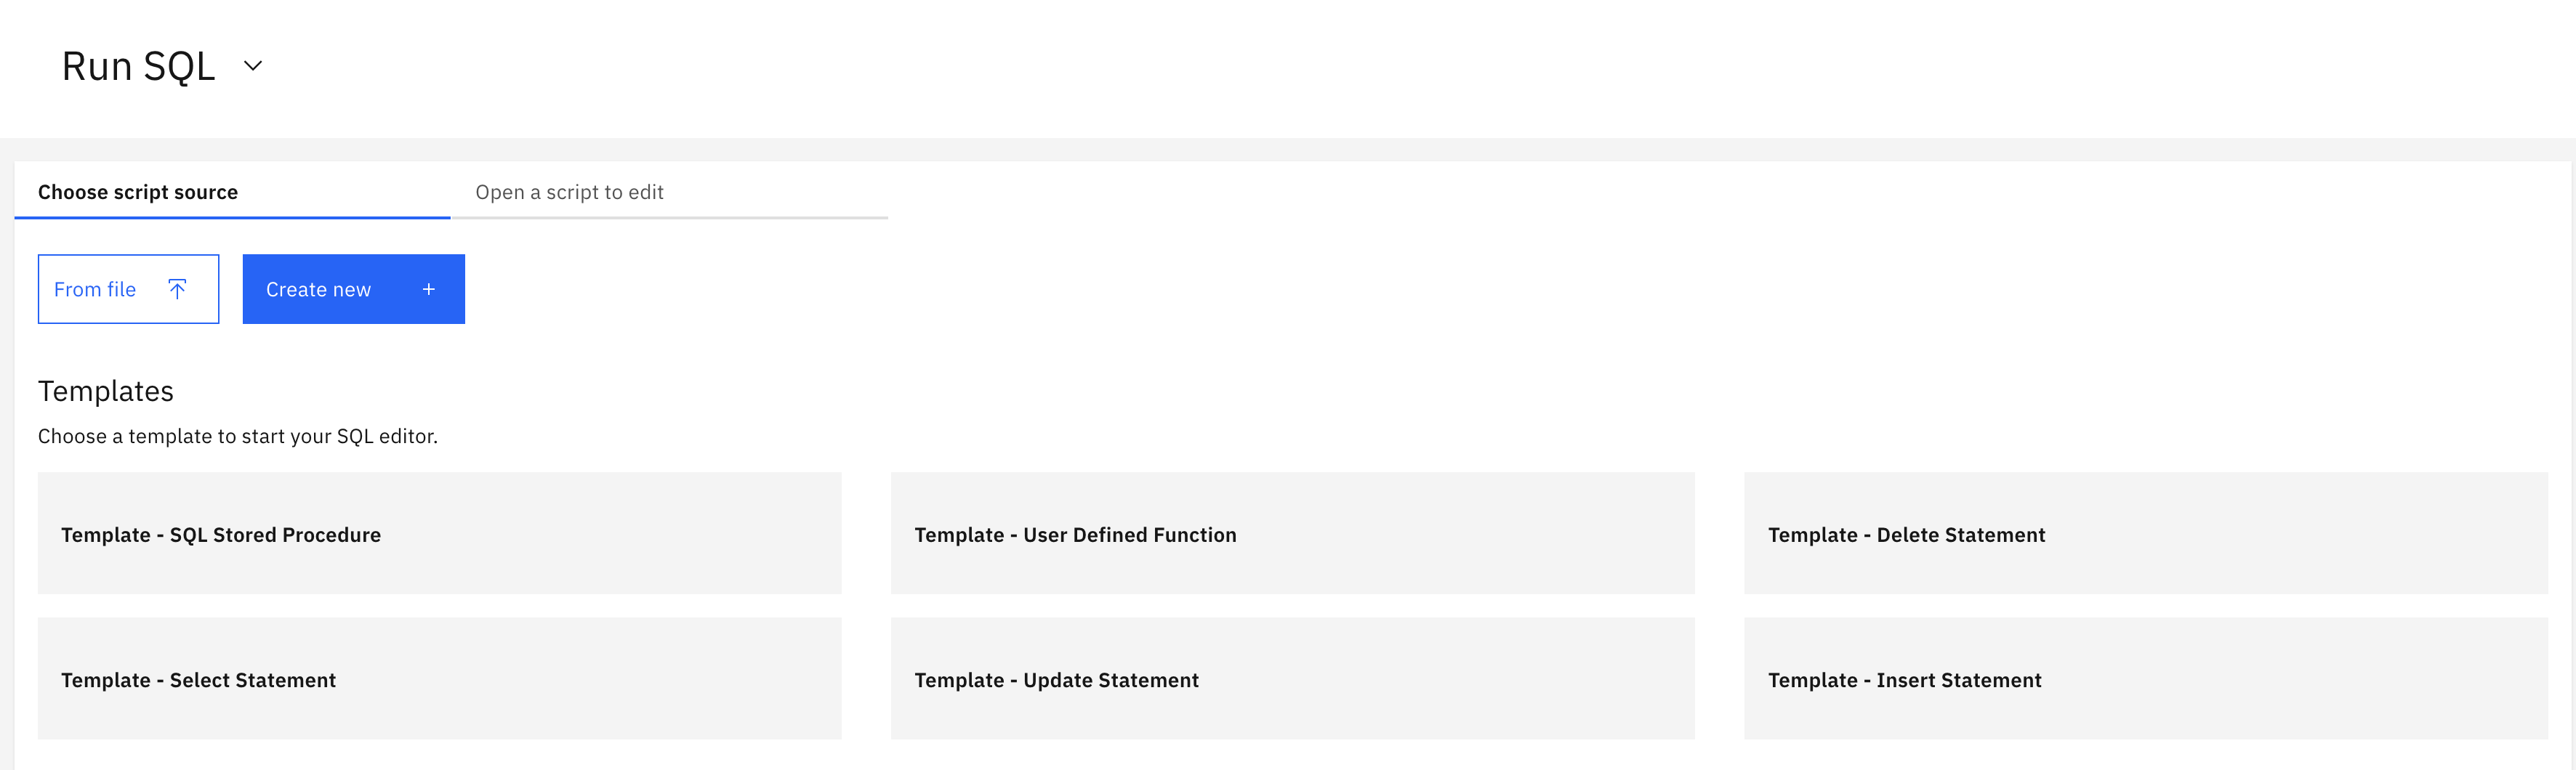   

Click "Create new +":
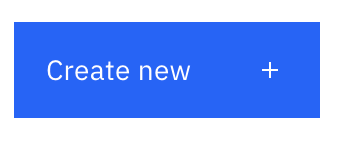 

You get a window where you can write SQL code:
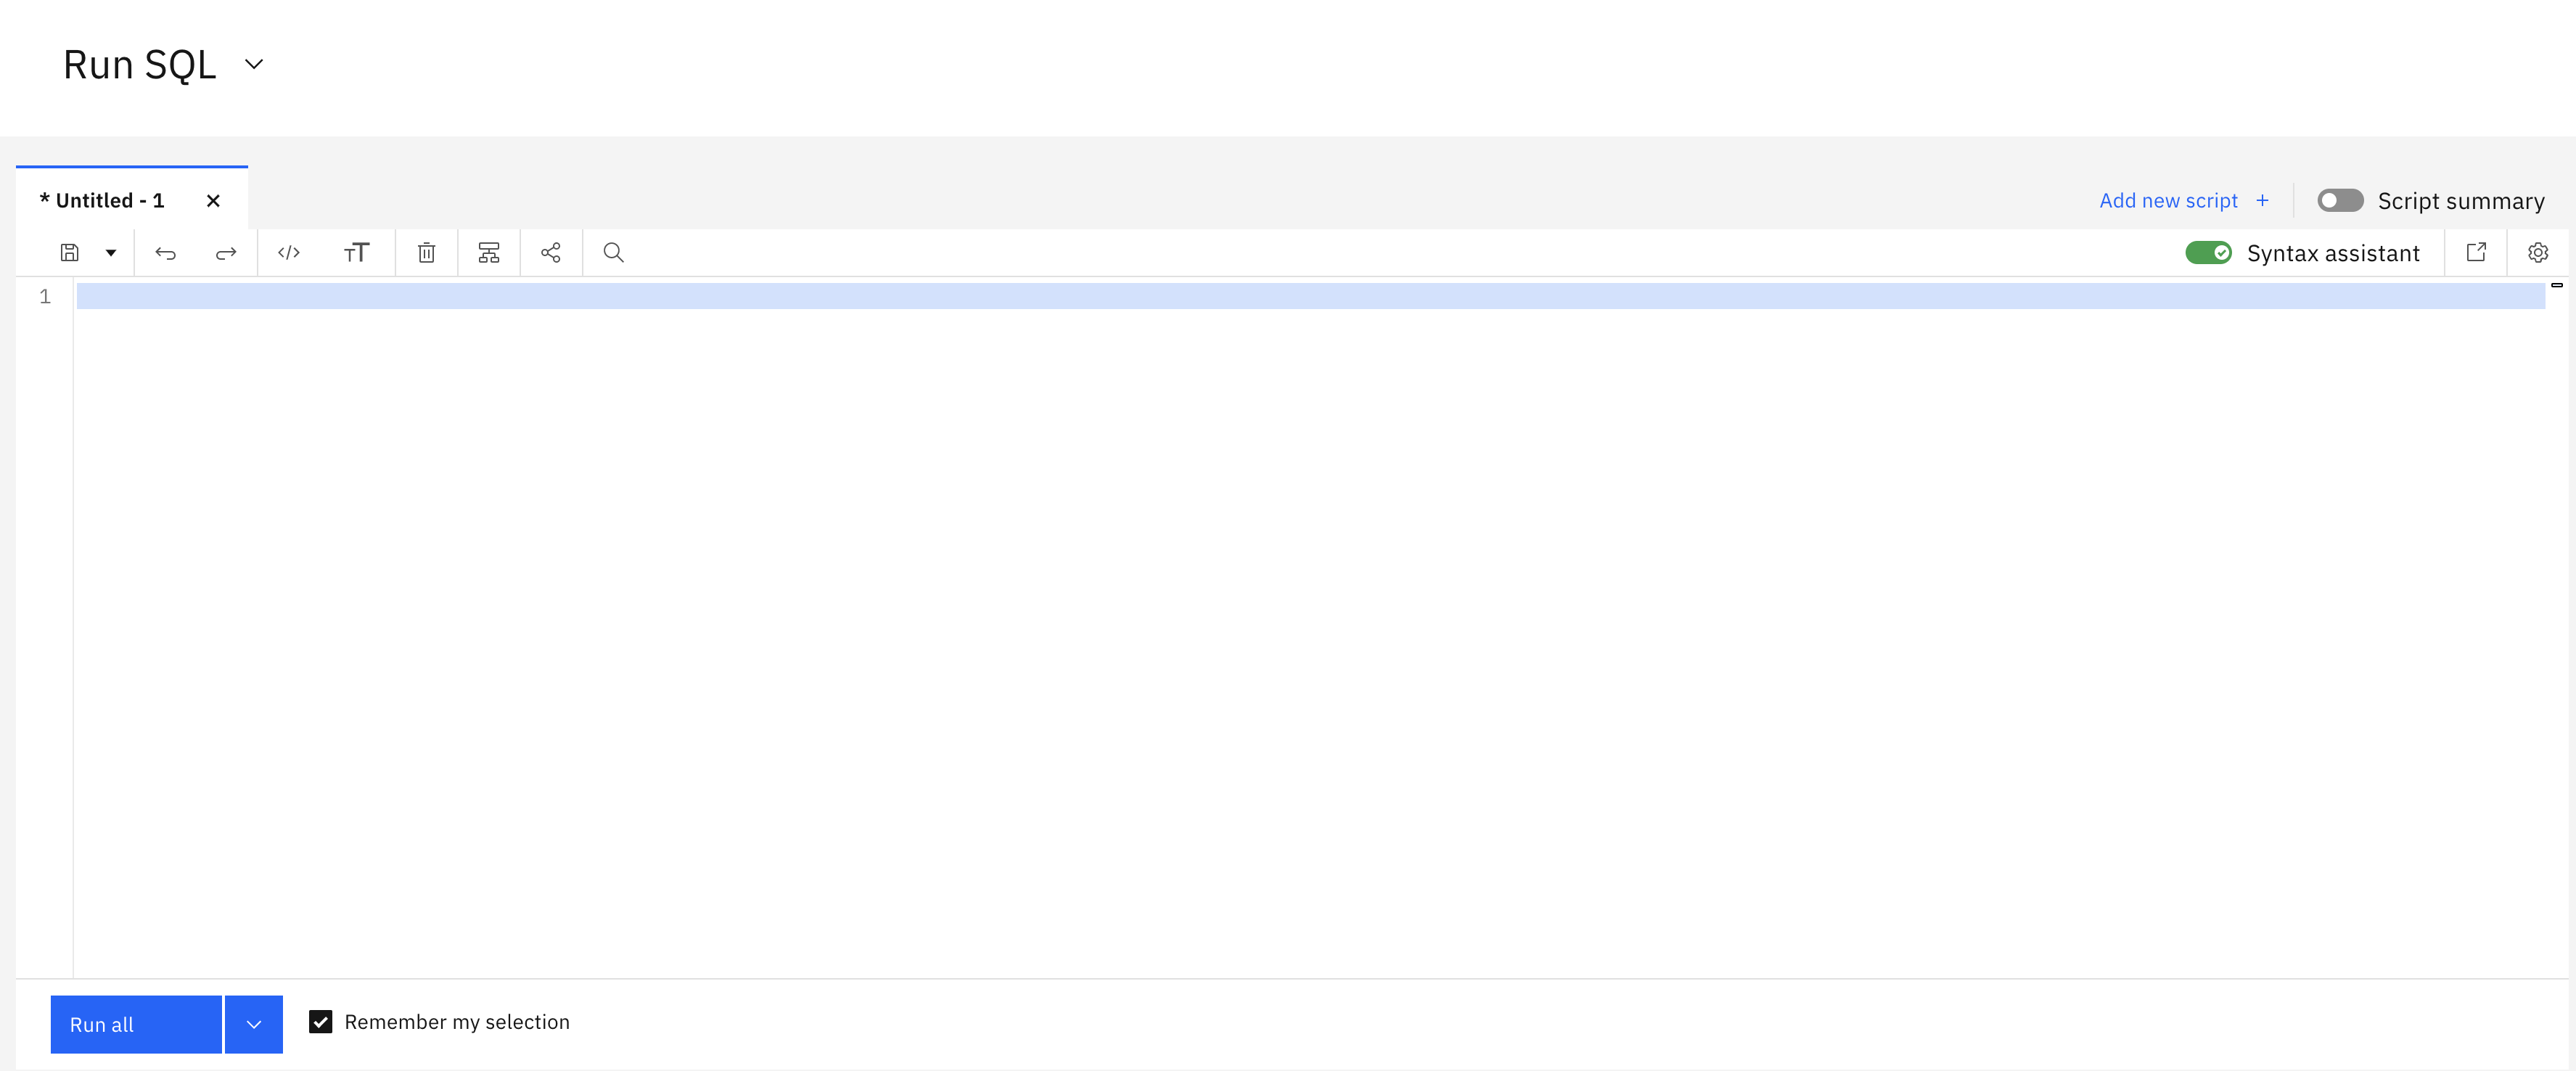


Put the following code in the SQL window:

```SQL
CREATE EXTERNAL TABLE REGION_EXT (
  R_REGIONKEY  INTEGER NOT NULL,
  R_NAME       CHAR(25) NOT NULL,
  R_COMMENT    VARCHAR(152)
) USING (
  DATAOBJECT 'region.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);
```

The first line defines that the name of the table should be region_ext. 

The following three lines just describe the columns of the table in the same way as one would do for any other table.

Then the USING clause contains the information on how to access the data on COS.

DATAOBJECT gives the name of the file.

"s3" means that we are using an "s3" compatible object store. 

It has four parameters. 

- The first specified the URL of the S3 compatible web service.

- We are using S3 storage on the IBM cloud. 

- Therefore, the second parameter is the access key ID from the HMAC credentials.

- The third parameter is the secret access key ID from the HMAC credentials.

- The fourth parameter specifies the bucket name.

The complete documenation for creating external tables can be found here:

https://www.ibm.com/docs/de/db2/11.5?topic=statements-create-external-table

When you have put this in the SQL window, your screen should look like:
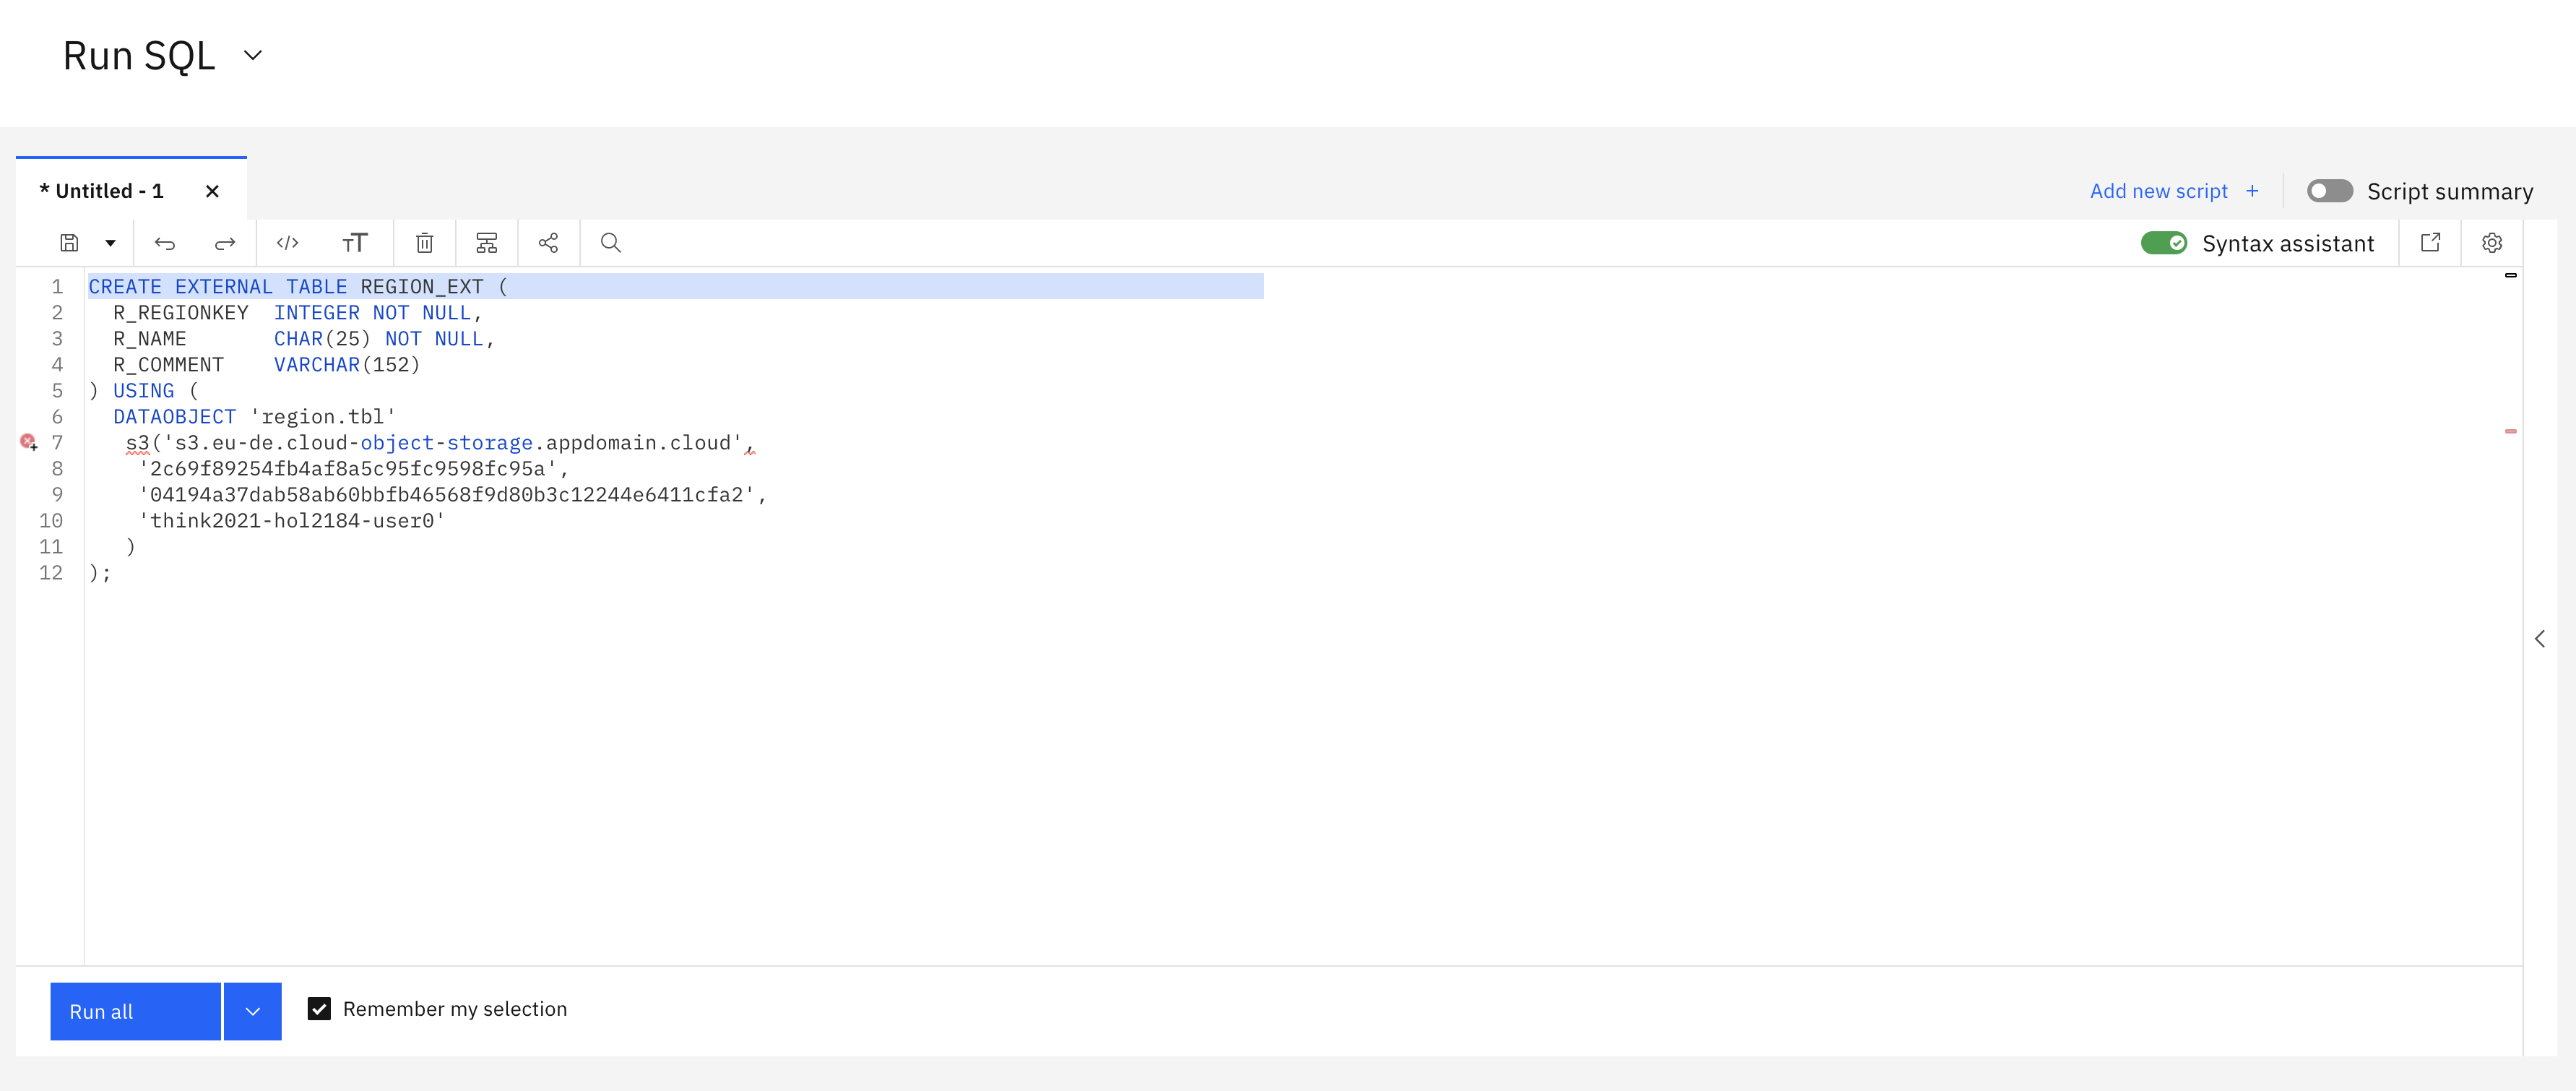

Click "Run all", and you should see a message about the successful completion of the creation of the external table on the right side of your screen:
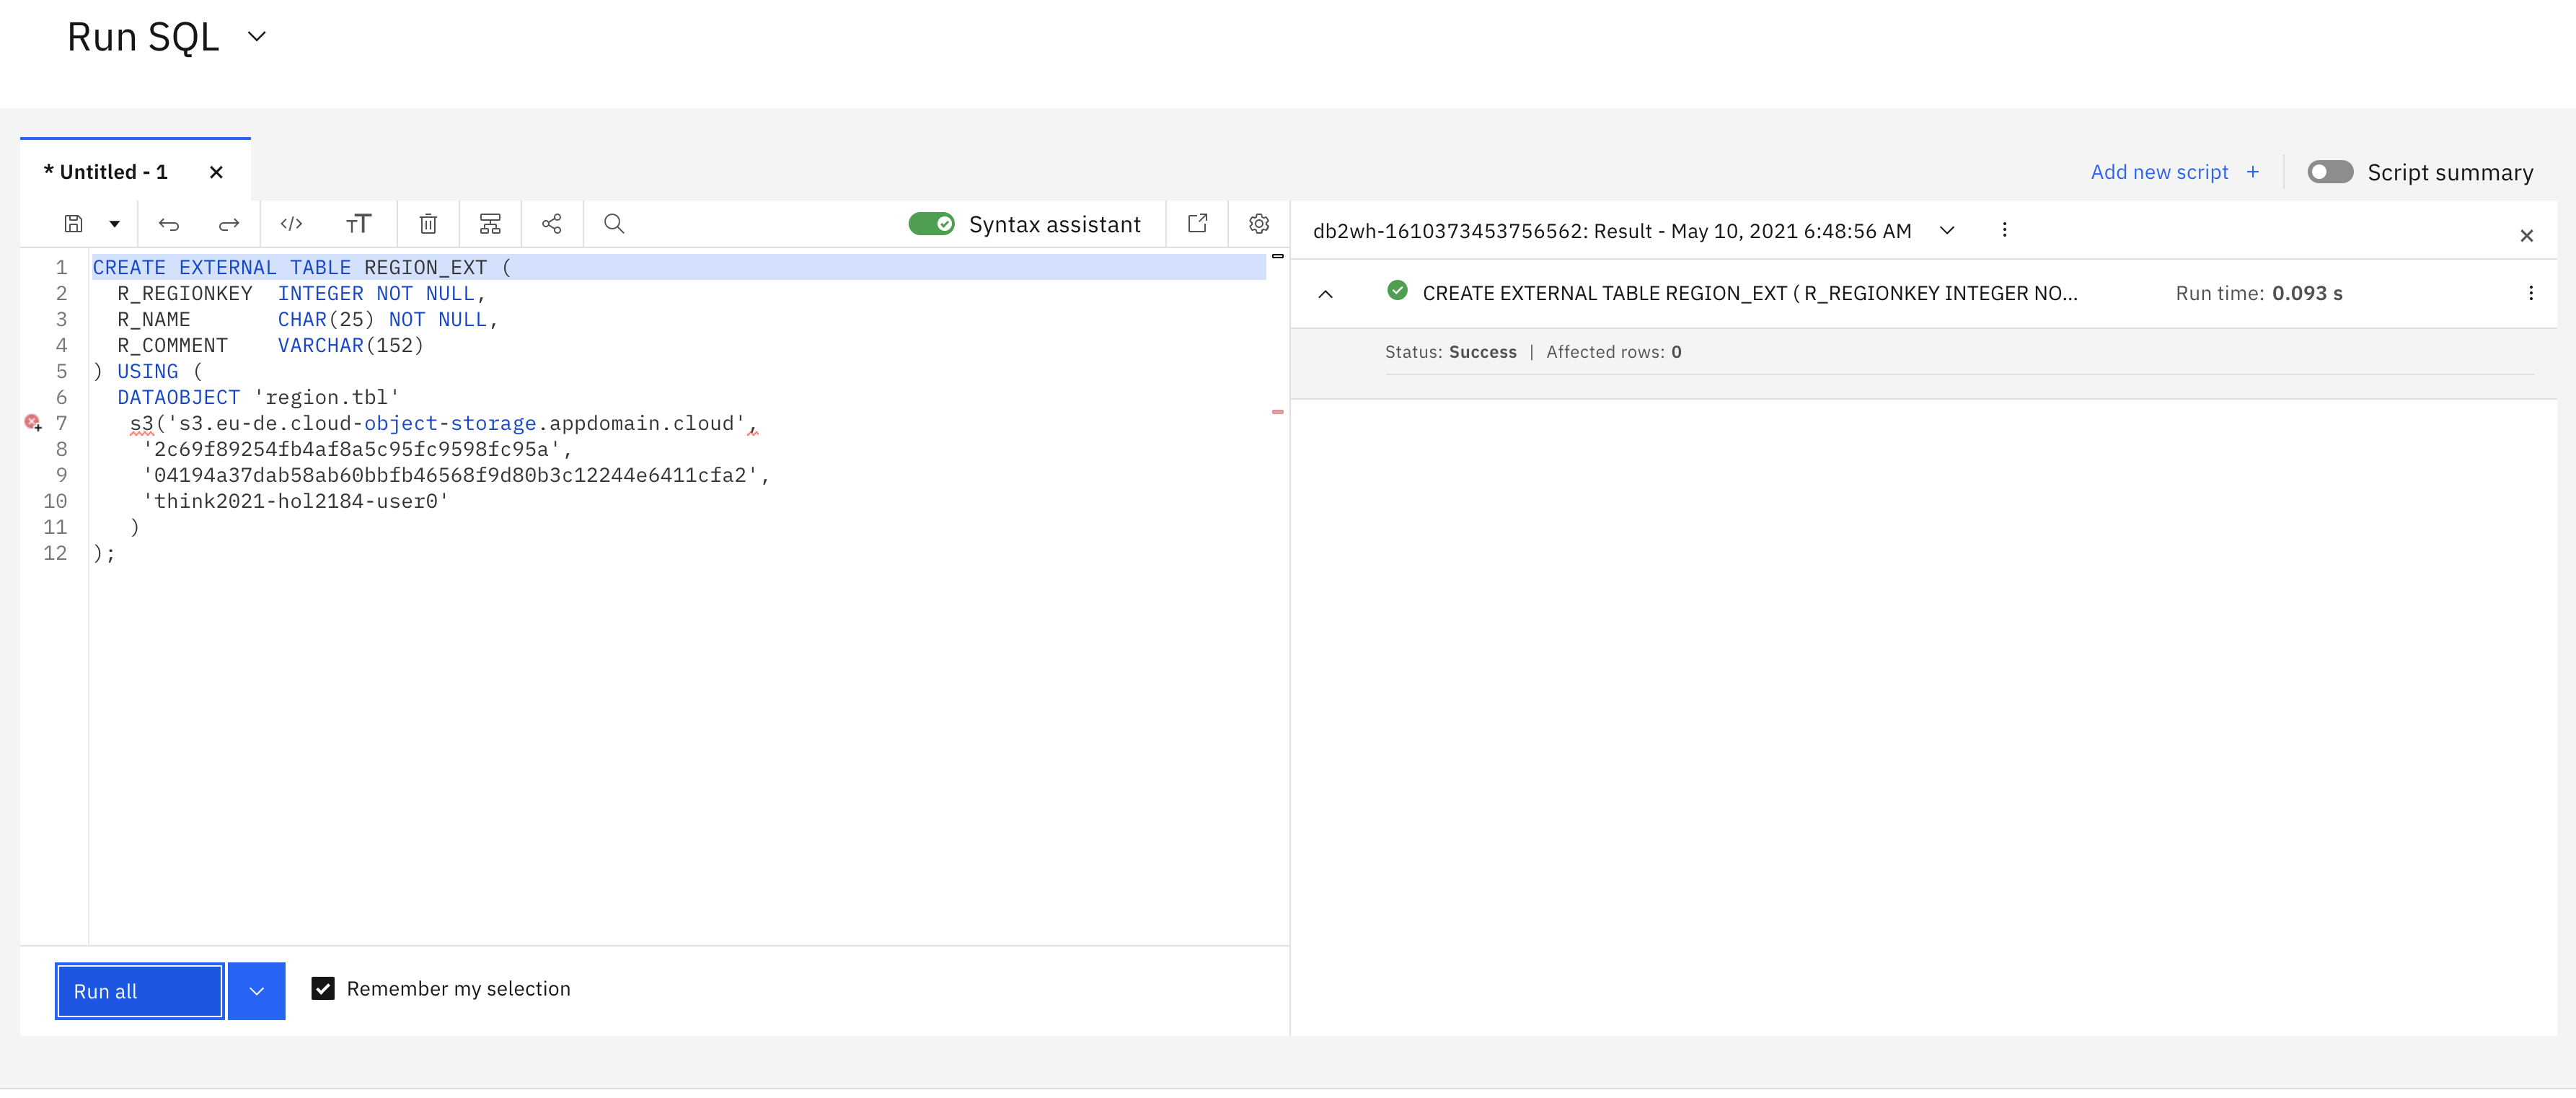

Now we can run SQL statements against the file on COS via the external table.
For example append the following SQL statement to your SQL window, and select the while line
```SQL
SELECT R_NAME, LENGTH(R_COMMENT) FROM REGION_EXT WHERE R_NAME LIKE 'A%';
```

Your screen should look like this:
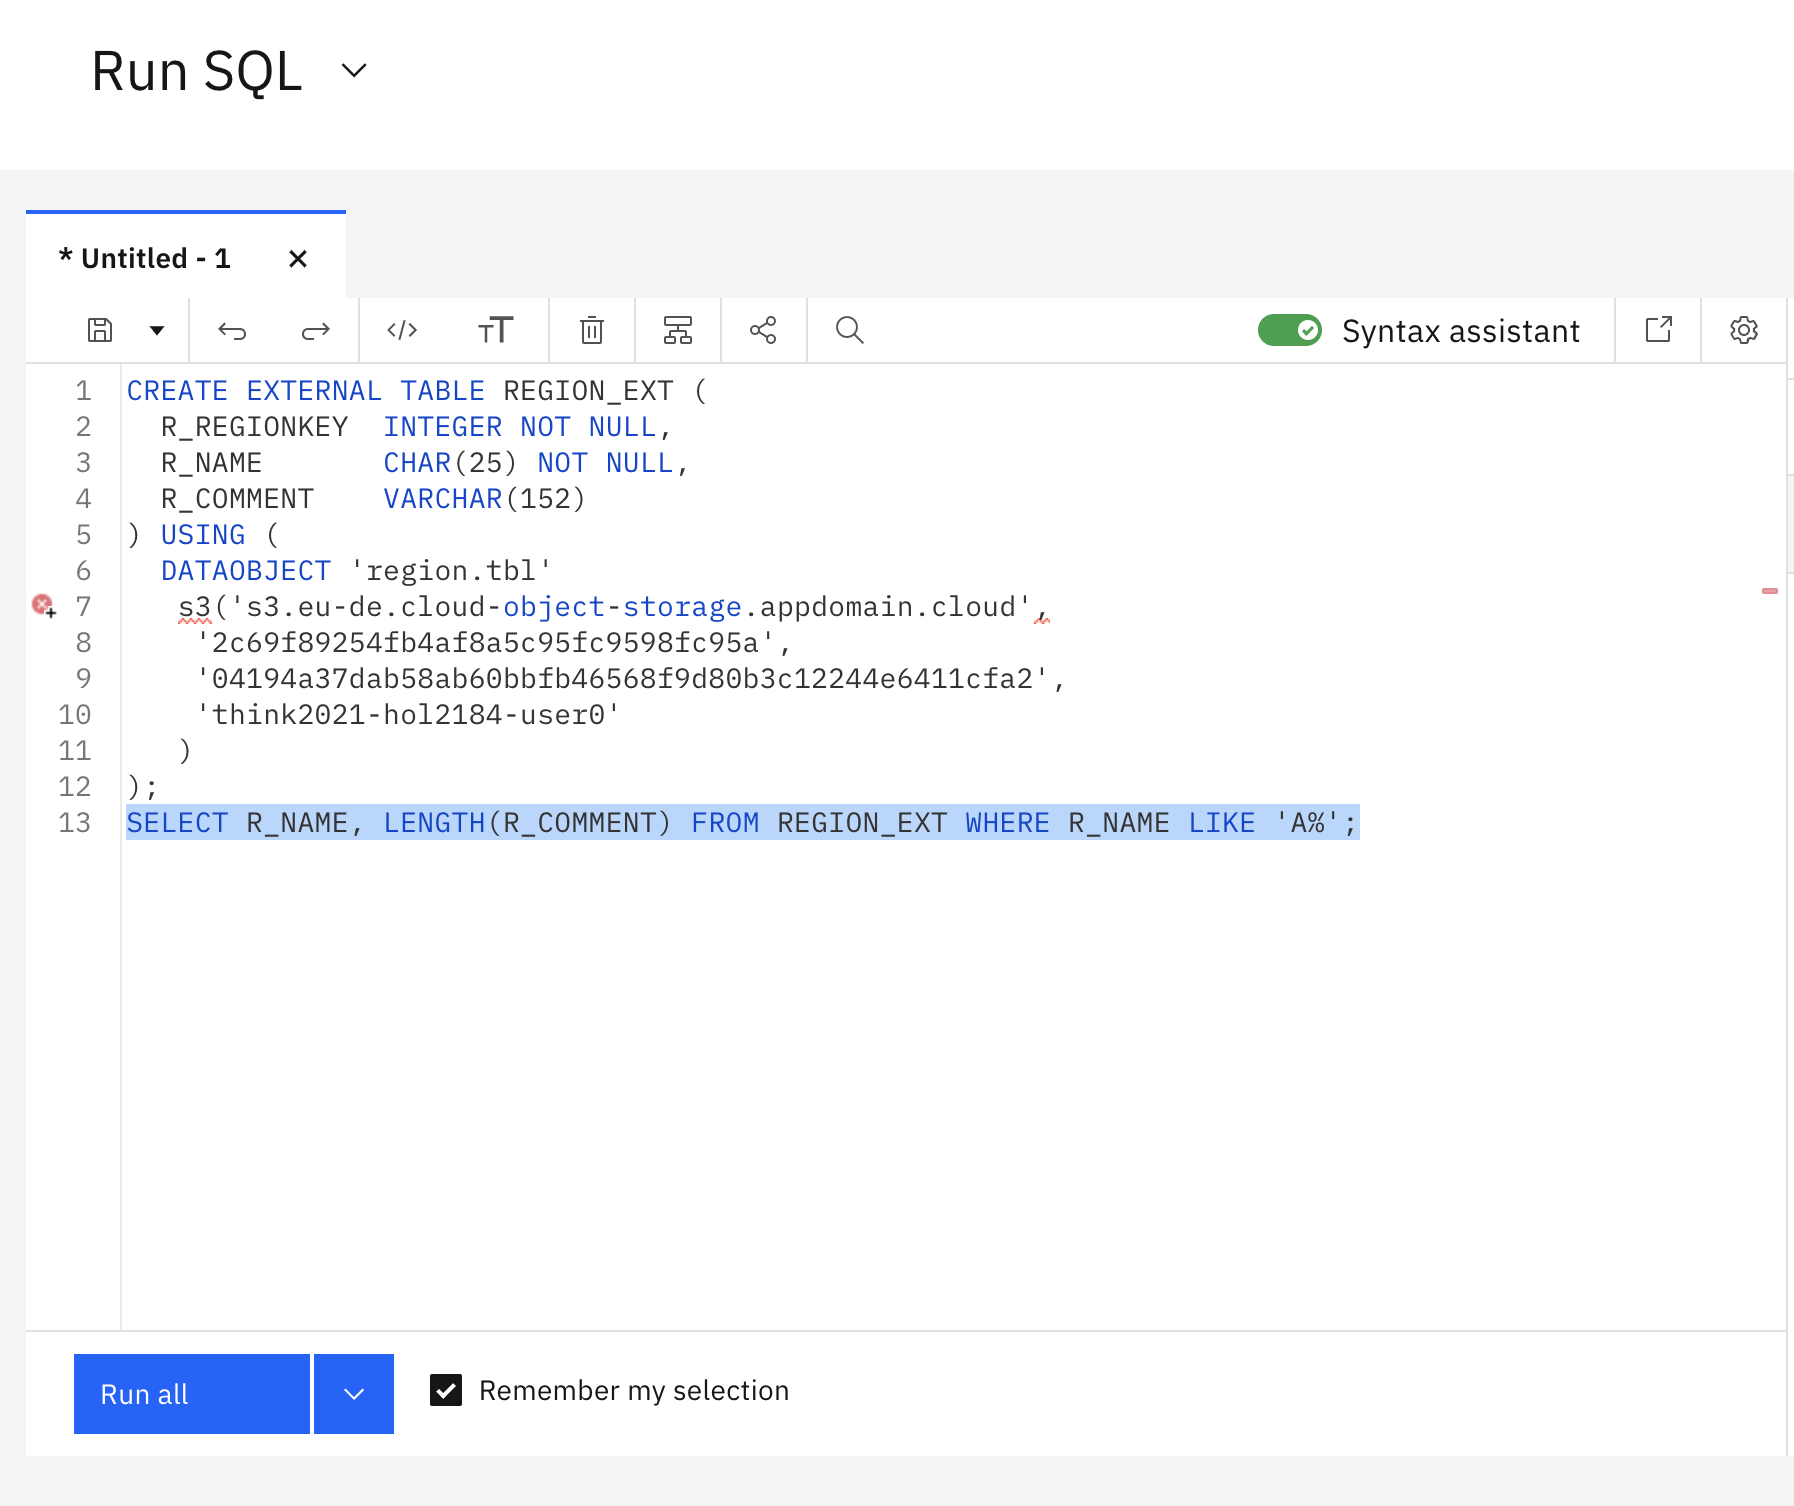

Now click on the "v" next to "Run all" and select "Run selected"
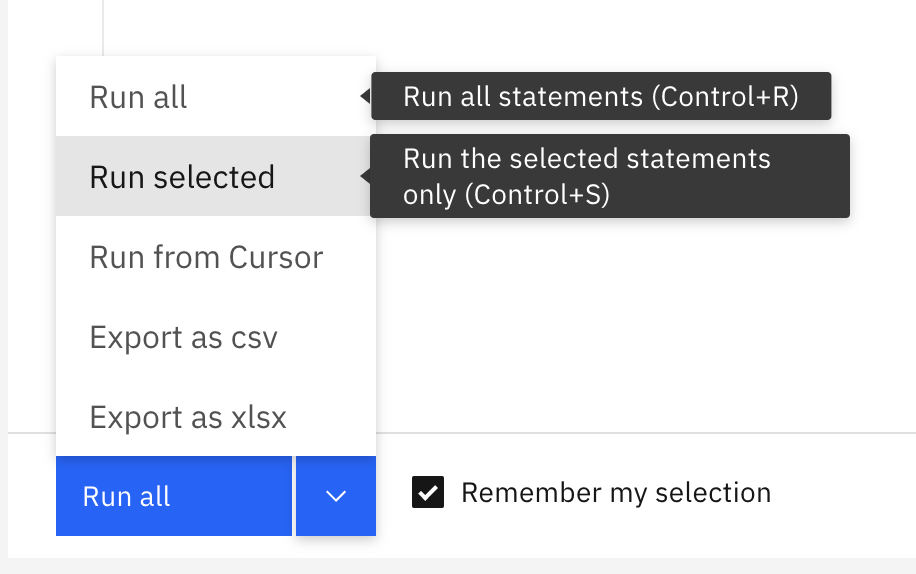

After successful execution of the quer, your screen should look like this:
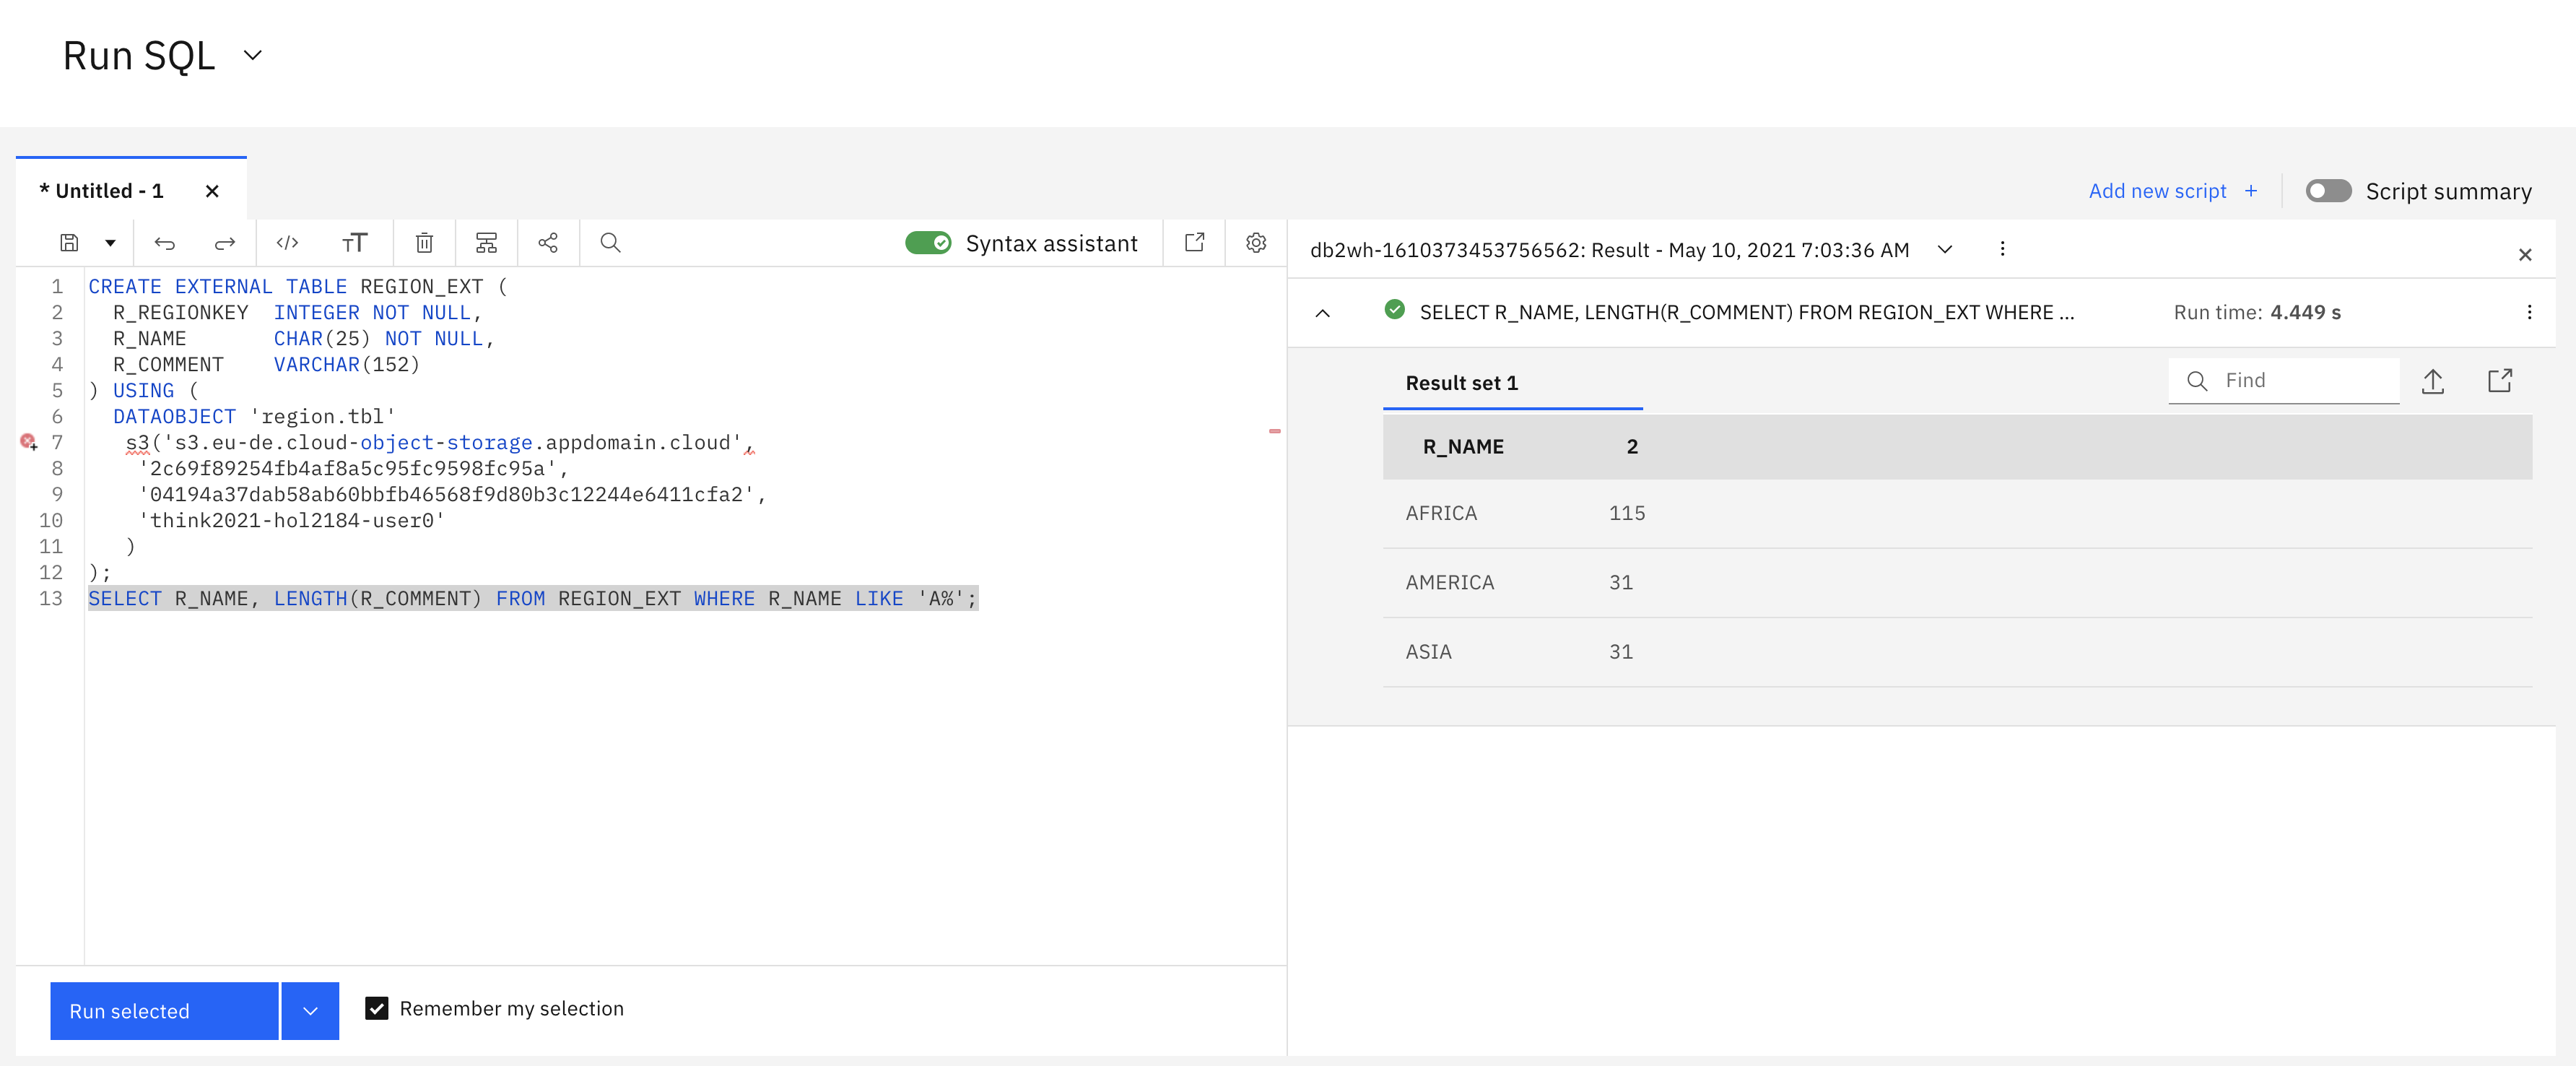

# The following exercises will be directly executed in this notebook

# Preparation

First, we install the SQL Magic (%sql and %%sql extensions), and load it

In [ ]:
!pip install --user ipython-sql

In [ ]:
import ibm_db
import ibm_db_sa
import sqlalchemy

# Load the %sql extension

In [ ]:
%load_ext sql

# Connect to Db2 Warehouse

We define the parameters for the connection and then we use %sql to connect

<font color='red'>You have to replace 'X' in 'userX' with your user number. E.g. if your user number is '3' replace 'userX' with user3.</font>

In [ ]:
user='userX'
password='HOL2184'
host='openshift-skytap-nfs-woker-2.ibm.com'
port='31895'
database='BLUDB'

In [ ]:
%sql db2+ibm_db://$user:$password@$host:$port/$database

# Creation of an external table for a file on COS

Creation of the external table works in the same way as you have already done it for table REGION_EXT.

The first line defines that the name of the table should be nation_ext.

The following four lines just describe the columns of the table in the same way as one would do for any other table.

Then the USING clause contains the information on how to access the data on COS.

DATAOBJECT gives the name of the file.

"s3" means that we are using an "s3" compatible object store.

It has four parameters. 

- The first specified the URL of the S3 compatible web service.

- We are using S3 storage on the IBM cloud.

- Therefore, the second parameter is the access key ID from the HMAC credentials.

- The third parameter is the secret access key ID from the HMAC credentials.

- The fourth parameter specifies the bucket name.

The complete documenation for creating external tables can be found here:

https://www.ibm.com/docs/de/db2/11.5?topic=statements-create-external-table

In [ ]:
%%sql
CREATE EXTERNAL TABLE NATION_EXT (
    N_NATIONKEY  INTEGER NOT NULL,
    N_NAME       CHAR(25) NOT NULL,
    N_REGIONKEY  INTEGER NOT NULL,
    N_COMMENT    VARCHAR(152)
) USING (
  DATAOBJECT 'nation.tbl' 
    s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
     )
);

# Run queries directly on external tables

In [ ]:
%%sql
select * from nation_ext;

# A view joining two files on COS

We create a view which join the two external tables which we have created in the previous exercises. We see that we can perform joins on files on COS without loading the data into an internal Db2 Warehouse table first.

In [ ]:
%%sql
CREATE OR REPLACE VIEW NATIONREGION_V (
    NR_NATIONKEY,
    NR_NATIONNAME,
    NR_NATIONCOMMENT,
    NR_REGIONKEY,
    NR_REGIONNAME,
    NR_REGIONCOMMENT
) AS
SELECT
    N_NATIONKEY,
    N_NAME,
    N_COMMENT,
    R_REGIONKEY,
    R_NAME,
    R_COMMENT
FROM
    NATION_EXT INNER JOIN REGION_EXT
    ON N_REGIONKEY=R_REGIONKEY
;

# Now we create an internal table with the same schema and insert the result of the view in this table

In this way we can cache data from COS in Db2 Warehouse to get better performance

In [ ]:
%%sql
CREATE TABLE NATIONREGION (
    NR_NATIONKEY  INTEGER NOT NULL,
    NR_NATIONNAME       CHAR(25) NOT NULL,
    NR_NATIONCOMMENT    VARCHAR(152),
    NR_REGIONKEY  INTEGER NOT NULL,
    NR_REGIONNAME CHAR(25) NOT NULL,
    NR_REGIONCOMMENT VARCHAR(152)
);

In [ ]:
%%time
%%sql
INSERT INTO NATIONREGION
SELECT * FROM NATIONREGION_V;

# Performance of queries on COS and on internal tables

Now, we compare the run time of a query directly on COS versus running the query on internal tables.

First, we run the query on the view with external tables. Look at the "wall time".

In [ ]:
%%time
%%sql
SELECT
    NR_REGIONNAME,
    COUNT(*)
FROM
    NATIONREGION_V
WHERE
    LENGTH(NR_NATIONCOMMENT) >= LENGTH(NR_REGIONCOMMENT)
GROUP BY 
    NR_REGIONNAME
ORDER BY 
    NR_REGIONNAME
;

# Run time on the internal table

Run the query and look at the "wall time" again.

In [ ]:
%%time
%%sql
SELECT
    NR_REGIONNAME,
    COUNT(*)
FROM
    NATIONREGION
WHERE
    LENGTH(NR_NATIONCOMMENT) >= LENGTH(NR_REGIONCOMMENT)
GROUP BY 
    NR_REGIONNAME
ORDER BY 
    NR_REGIONNAME
;

# Writing results back to COS

Next we will see how to write back results which we have computed in Db2 Warehouse to COS, so that other working on COS can use them.

We create an external table with the same schema like the internal NATIONREGION table which we just created.

<font color='red'>Since all students are using the same COS, each one has to use their own bucket on COS to avoid overwriting the files of other students. For this, you have to replace the 'X' with your cluster number und the 'Y' with your user number in 'think2021-hol2184-clusterX-userY'. E.g. if you are user3 on cluster 1, replace it with ''think2021-hol2184-cluster1-user3'.</font>

In [ ]:
%%sql
CREATE EXTERNAL TABLE NATIONREGION_EXT (
    NR_NATIONKEY  INTEGER NOT NULL,
    NR_NATIONNAME       CHAR(25) NOT NULL,
    NR_NATIONCOMMENT    VARCHAR(152),
    NR_REGIONKEY  INTEGER NOT NULL,
    NR_REGIONNAME CHAR(25) NOT NULL,
    NR_REGIONCOMMENT VARCHAR(152)
) USING (
  DATAOBJECT 'nationregion.tbl' 
    s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-clusterX-userY'
     )
);

# Write to file on COS

We write to a file on COS by inserting into the external table we just created.

In [ ]:
%%time
%%sql
INSERT INTO NATIONREGION_EXT
SELECT * FROM NATIONREGION;

# Check how many rows were written to COS

In [ ]:
%%time
%%sql
SELECT count(*) FROM NATIONREGION_EXT;

# Performance Improvements

Next, we will look at some performance improvement, which are possible when combining Db2 Warehouse with COS.

We compare the performance of having all data in one file on COS versus the performance of having several files for this table on COS which are combined with a UNION ALL view in Db2 Warehouse. In the latter case the Db2 Warehouse optimizer can eliminate the scanning of file which are not needed to get the result of a query.

Finally , we replace the file with the newest data in the UNION ALL view with an internal Db2 Warehouse table. In this way, we can improve the performance for "hot" data even more.

# First, we create an external table for a single file on COS and run a few queries on it.

In [ ]:
%%time
%%sql
CREATE EXTERNAL TABLE ORDERS_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);

In [ ]:
%%time
%%sql
select * from orders_ext fetch first 5 rows only;

In [ ]:
%%time
%%sql
SELECT COUNT(*) FROM ORDERS_EXT WHERE O_ORDERDATE >= '1998-01-01';

# UNION ALL view over many COS files

We use files on COS, where each one contains just one year of data.

First we create external tables for each year.

In [ ]:
%%time
%%sql
CREATE EXTERNAL TABLE ORDERS1998_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders1998.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);
CREATE EXTERNAL TABLE ORDERS1997_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders1997.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);
CREATE EXTERNAL TABLE ORDERS1996_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders1996.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);
CREATE EXTERNAL TABLE ORDERS1995_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders1995.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);
CREATE EXTERNAL TABLE ORDERS1994_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders1994.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);
CREATE EXTERNAL TABLE ORDERS1993_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders1993.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);
CREATE EXTERNAL TABLE ORDERS1992_EXT  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
) USING (
  DATAOBJECT 'orders1992.tbl' 
   s3('s3.eu-de.cloud-object-storage.appdomain.cloud', 
    '2c69f89254fb4af8a5c95fc9598fc95a',
    '04194a37dab58ab60bbfb46568f9d80b3c12244e6411cfa2',
    'think2021-hol2184-user0'
   )
);

# Create internal Db2 Warehouse table for the newest data

Create an internal table with the orders data from 1998 and fill it with data from the corresponding external table

In [ ]:
%%time
%%sql
CREATE TABLE ORDERS1998  ( 
  O_ORDERKEY       INTEGER NOT NULL,
  O_CUSTKEY        INTEGER NOT NULL,
  O_ORDERSTATUS    CHAR(1) NOT NULL,
  O_TOTALPRICE     DECIMAL(15,2) NOT NULL,
  O_ORDERDATE      DATE NOT NULL,
  O_ORDERPRIORITY  CHAR(15) NOT NULL,  
  O_CLERK          CHAR(15) NOT NULL, 
  O_SHIPPRIORITY   INTEGER NOT NULL,
  O_COMMENT        VARCHAR(79) NOT NULL
);

In [ ]:
%%time
%%sql
INSERT INTO ORDERS1998 SELECT * FROM ORDERS1998_EXT;

# Create UNION ALL view across all single year tables

In [ ]:
%%time
%%sql
CREATE OR REPLACE VIEW ORDERS_PARTITIONED_V 
AS
SELECT  * FROM ORDERS1998_EXT WHERE O_ORDERDATE >= '1998-01-01' AND O_ORDERDATE < '1999-01-01'
UNION ALL
SELECT  * FROM ORDERS1997_EXT WHERE O_ORDERDATE >= '1997-01-01' AND O_ORDERDATE < '1998-01-01'
UNION ALL
SELECT  * FROM ORDERS1996_EXT WHERE O_ORDERDATE >= '1996-01-01' AND O_ORDERDATE < '1997-01-01'
UNION ALL
SELECT  * FROM ORDERS1995_EXT WHERE O_ORDERDATE >= '1995-01-01' AND O_ORDERDATE < '1996-01-01'
UNION ALL
SELECT  * FROM ORDERS1994_EXT WHERE O_ORDERDATE >= '1994-01-01' AND O_ORDERDATE < '1995-01-01'
UNION ALL
SELECT  * FROM ORDERS1993_EXT WHERE O_ORDERDATE >= '1993-01-01' AND O_ORDERDATE < '1994-01-01'
UNION ALL
SELECT  * FROM ORDERS1992_EXT WHERE O_ORDERDATE >= '1992-01-01' AND O_ORDERDATE < '1993-01-01';

# Create UNION ALL view across all single year tables, but with the year 1998 as internal table

In [ ]:
%%time
%%sql
CREATE OR REPLACE VIEW ORDERS_PARTITIONED_WARM_COLD_V 
AS
SELECT  * FROM ORDERS1998 WHERE O_ORDERDATE >= '1998-01-01' AND O_ORDERDATE < '1999-01-01'
UNION ALL
SELECT  * FROM ORDERS1997_EXT WHERE O_ORDERDATE >= '1997-01-01' AND O_ORDERDATE < '1998-01-01'
UNION ALL
SELECT  * FROM ORDERS1996_EXT WHERE O_ORDERDATE >= '1996-01-01' AND O_ORDERDATE < '1997-01-01'
UNION ALL
SELECT  * FROM ORDERS1995_EXT WHERE O_ORDERDATE >= '1995-01-01' AND O_ORDERDATE < '1996-01-01'
UNION ALL
SELECT  * FROM ORDERS1994_EXT WHERE O_ORDERDATE >= '1994-01-01' AND O_ORDERDATE < '1995-01-01'
UNION ALL
SELECT  * FROM ORDERS1993_EXT WHERE O_ORDERDATE >= '1993-01-01' AND O_ORDERDATE < '1994-01-01'
UNION ALL
SELECT  * FROM ORDERS1992_EXT WHERE O_ORDERDATE >= '1992-01-01' AND O_ORDERDATE < '1993-01-01';

# Performance test with queries

Let's run different test scenarios for this query

```
SELECT SUM(O_TOTALPRICE) FROM ORDERS WHERE O_ORDERDATE >= '1998-01-01'
```

and compare the performance by looking at the wall time.

# Run the query on the internal table

In [ ]:
%%time
%%sql
SELECT SUM(O_TOTALPRICE) FROM ORDERS1998 WHERE O_ORDERDATE >= '1998-01-01'

# Run the query on the external table with 1998 data

In [ ]:
%%time
%%sql
SELECT SUM(O_TOTALPRICE) FROM ORDERS1998_EXT WHERE O_ORDERDATE >= '1998-01-01'

# Run the query on the external table with all data in a single file

In [ ]:
%%time
%%sql
SELECT SUM(O_TOTALPRICE) FROM ORDERS_EXT WHERE O_ORDERDATE >= '1998-01-01'

# Run the query on the UNION ALL view with data for each year in its own file

In [ ]:
%%time
%%sql
SELECT  SUM(O_TOTALPRICE) FROM ORDERS_PARTITIONED_V WHERE O_ORDERDATE >= '1998-01-01' AND O_ORDERDATE < '1999-01-01'

# Run the query on the UNION ALL view with data for each year in its own file and the year 1998 in an internal Db2 Warehouse table

In [ ]:
%%time
%%sql
SELECT  SUM(O_TOTALPRICE) FROM ORDERS_PARTITIONED_WARM_COLD_V WHERE O_ORDERDATE >= '1998-01-01' AND O_ORDERDATE < '1999-01-01'

# Cleanup

The following optional step can be used to drop the objects created in this lab. Dropping external table drop the metadata, but doesn't touch the actual file associated with the external table.

In [ ]:
%%sql
DROP TABLE ORDERS1998_EXT;
DROP TABLE ORDERS1997_EXT;
DROP TABLE ORDERS1996_EXT;
DROP TABLE ORDERS1995_EXT;
DROP TABLE ORDERS1994_EXT;
DROP TABLE ORDERS1993_EXT;
DROP TABLE ORDERS1992_EXT;
DROP TABLE ORDERS1998;
DROP TABLE NATION_EXT;
DROP TABLE REGION_EXT;
DROP TABLE ORDERS_EXT;
DROP TABLE NATIONREGION;
DROP TABLE NATIONREGION_EXT;

This project contains Sample Materials, provided under license. 

Licensed Materials - Property of IBM. 

Copyright IBM Corp. 2021. All Rights Reserved. 

US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.